In [1]:
import pandas as pd
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
import dask.dataframe as dd
import matplotlib.cm as cm
import os

In [2]:
Analise_Potencia = True
Analise_Reserva = True
Analise_GenbySource = True
Analise_Tensão = True
Analise_Shunt = True
Analise_Linhas = True
Analise_Inter_HVDC = True
Analise_Correlação = True
Analise_Cluster = True

In [3]:
mainpath = 'C:/Users/david/OneDrive/Documents/FERV_documentos/RESULTS'
dic_cenarios = {
                # 'MPA FNS Lim Scenario 2022' : f'{mainpath}/MPV_(FNS Lim)_RC/',
                # 'V1A1F2 2026' :f'{mainpath}/V1A1F2_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F2 2026' :f'{mainpath}/V1A1F2_RESP_FNS_lim_rev2_2026/',
                # 'V1A1F3 2026' :f'{mainpath}/V1A1F3_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F4 2026' :f'{mainpath}/V1A1F4_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F5 2026' :f'{mainpath}/V1A1F5_RESP_FNS_lim_rev1_2026/',

                # 'V1A1F2 2026' :f'{mainpath}/V1A1F2_rev5/',
                # 'V1A1F3 2026' :f'{mainpath}/V1A1F3_rev5/',
                # 'V1A1F4 2026' :f'{mainpath}/V1A1F4_rev5/',
                # 'V1A1F5 2026' :f'{mainpath}/V1A1F5_rev5/',

                # 'V2A2F2 2026' :f'{mainpath}/V2A2F2_REV02_2026/',
                # 'V2A2F3 2026' :f'{mainpath}/V2A2F3_REV02_2026/',
                # 'V2A2F4 2026' :f'{mainpath}/V2A2F4_REV02_2026/', 
                # 'V2A2F5 2026' :f'{mainpath}/V2A2F5_REV02_2026/',

                'V2A2F2 2026 HPPA' :f'{mainpath}/V2A2F2_rev5/',
                'V2A2F3 2026 HPPA' :f'{mainpath}/V2A2F3_rev5/',
                # 'V2A2F4 2026 HPPA' :f'{mainpath}/V2A2F4_rev5/', 
                # 'V2A2F5 2026 HPPA' :f'{mainpath}/V2A2F5_rev5/',

                'V2A2F2 2026 UNICAMP' :f'{mainpath}/V2A2F2_RESP_in_FNS_lim_Unicamp/',
                'V2A2F3 2026 UNICAMP' :f'{mainpath}/V2A2F3_RESP_in_FNS_lim_Unicamp/',
                # 'V2A2F4 2026 UNICAMP' :f'{mainpath}/V2A2F4_RESP_in_FNS_lim_Unicamp/', 
                # 'V2A2F5 2026 UNICAMP' :f'{mainpath}/V2A2F5_RESP_in_FNS_lim_Unicamp/',

                # 'V3A3F2 2026' :f'{mainpath}/V3A3F2_REV1_2026/',
                # 'V3A3F3 2026' :f'{mainpath}/V3A3F3_REV1_2026/',
                # 'V3A3F4 2026' :f'{mainpath}/V3A3F4_REV1_2026/',
                # 'V3A3F5 2026' :f'{mainpath}/V3A3F5_REV1_2026/',
                }

dirGeral = 'StaticAnalysis/Data/Geral/'
# dirIndice = 'StaticAnalysis/Data/Indice_n_supremo/'
dirIndice = 'StaticAnalysis/Data/Indice_n_2/'
dirRamos = 'StaticAnalysis/Data/Fluxo em Ramos/'
dirPotencia = 'StaticAnalysis/Data/Potencia/'

filenames = [
                (dirGeral + 'OPF_NC.csv', 'OPF_NC'), 
                (dirGeral + 'PWF_NC.csv', 'PWF_NC'),
                (dirGeral + 'Df_ger.csv', 'ger'), 
                (dirGeral + 'Df_nt.csv', 'nt'), 
                (dirRamos + 'Df_Linhas.csv', 'linhas'), 
                (dirRamos + 'Df_Trafo.csv', 'Trafo'), 
                (dirRamos + 'DF_Intercambios.csv', 'intercambios'), 
                (dirRamos + 'DF_HVDC.csv', 'HVDC'), 
                (dirIndice + 'Df_DPI_S2.csv', 'Index'), 
                (dirIndice +'Df_DPI_S4.csv', 'Index_PO'), 
                (dirIndice + 'Df_DPI_S3.csv', 'Index_Modif'), 
                (dirIndice +'Df_PQ_DPI_S1.csv', 'IndexDec_PQ'), 
                (dirIndice +'Df_PV_DPI_S1.csv', 'IndexDec_PV'), 
                (dirPotencia+'Df_MW-MVAR_PO.csv', 'pot_mw_mvar'),  
                (dirPotencia+'Df_Reserva_PO_MW.csv', 'pot_mw_reserv'), 
                # (dirPotencia+'Df_Reserva_PO_MVAR.csv', 'pot_mvar_reserv'),
                (dirPotencia+'DF_POT_Reg.csv', 'ger_reg'),
            ]
import colorcet as cc
intense_palette = sns.color_palette(cc.glasbey, n_colors=12)  # You can adjust the number of colors as needed
namescenarios = {key:[key,intense_palette[idx]] for idx, key in enumerate(dic_cenarios.keys())}
itemsforanalysis = [var for _,var in filenames]

In [5]:
if 'PsasdO' or 'DF' in 'DF_POT_Reg':
    print('True')

True


# Data Processing

In [4]:
def read_data():
    def read_and_append(filename, cenario, lst):
        df = dd.read_csv(filename)
        df['Cenario'] = cenario
        # if cenario == 'V1A1F2 Scenario 2022 FNS':
        #     df['Dia'] = df['Dia'] - 1
        lst.append(df.compute())
        return lst

    keys = [i for _,i in filenames]
    dfs = {}
    for key in keys:
        dfs[key] = []
    for i,j in  dic_cenarios.items():
        for filename, key in filenames:
            dfs[key] = read_and_append(j + filename, i, dfs[key])

    return dfs

In [5]:
# Function to calculate indices for lines
def IndiceLinhas(df, n):

    df['MW_Flow'] = np.where(df['MW:From-To'] >= 0, df['MW:From-To'], df['MW:To-From'])
    df['PI_mva'] = (df['% L1'] / 100) ** (2 * n)

    # Group by multiple columns and aggregate
    df_r_nt = df.groupby(
        ['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV']
    ).agg({'MW_Flow': 'sum', 'MVA': 'sum', 'PI_mva': 'sum'})

    # df_r_nt['PFI'] = df_r_nt['MW_Flow'] / df_r_nt['MVA']
    df_r_nt['Mva_index'] = df_r_nt['PI_mva'] ** (1 / (2 * n))

    return df_r_nt

# Function to flatten DataFrame
def flatdf(df, BG):
    df_reordered = df.reorder_levels(['key','Dia', 'Hora', 'Cenario', 'REG', BG])
    regionmap = {
        'Nordeste': 'Northeast', 'Norte': 'North', 'Sudeste-Centro-Oeste': 'SE-CW',
        'Sul': 'South', 'AC-RO': 'AC-RO'
    }
    df_reordered = df_reordered.rename(index=regionmap, level='REG')
    df_reordered_sorted = df_reordered.sort_index(level=['key','Dia', 'Hora', 'Cenario', 'REG'])
    df_reordered_sorted.rename(columns={'CSI_INF': 'DPI_inf', 'CSI_SUP': 'DPI_sup'}, inplace=True)

    lista = [[index[0], index[1], index[2], index[3]] for index in df_reordered.index]
    conjunto_filtros = set(map(tuple, lista))
    conjunto_filtros = tuple(sorted(conjunto_filtros))

    data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]
    datapd = pd.DataFrame(data, index=conjunto_filtros)
    datapd.index.names = ['key','Dia', 'Hora', 'Cenario']
    
    columns = []
    for reg in df_reordered_sorted.reset_index('REG')['REG'].unique():
        for bg in df_reordered_sorted.loc[:, :, :, : ,reg, :].reset_index(BG)[BG].unique():
            for column in df_reordered_sorted.columns:
                reg_name = 'SE-CO' if reg == 'Sudeste-Centro-Oeste' else reg
                columns.append(f"{column}_{reg_name}_{bg}")

    datapd.columns = columns
    return datapd

# Function to read data
def read_data():
    def read_and_append(filename, cenario, lst):
        df = dd.read_csv(filename)
        df['Cenario'] = cenario
        # if cenario == 'V1A1F2 Scenario 2022 FNS':
        #     df['Dia'] = df['Dia'] - 1
        lst.append(df.compute())
        return lst

    keys = [i for _,i in filenames]
    dfs = {}
    for key in keys:
        dfs[key] = []
    for i,j in  dic_cenarios.items():
        for filename, key in filenames:
            dfs[key] = read_and_append(j + filename, i, dfs[key])

    return dfs

# Funtion to obtain the main features (buses) that contribute in the DPI_1 
def computefeatures(df_nt, df_ger, dfpq, dfpv):
    # Step 1: Merge DataFrames with only necessary columns
    dfpq_cols = ['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV', 'CSI_INF', 'CSI_SUP']
    dfpv_cols = ['Dia', 'Hora', 'Cenario', 'REG', 'Gen_Type', 'CSI_INF', 'CSI_SUP']

    datafeatures_pq = df_nt.merge(dfpq[dfpq_cols], on=['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV'], how='left')
    datafeatures_pq = datafeatures_pq[['BUS_ID', 'BUS_NAME', 'ARE', 'VBASEKV', 'REG', 'U_FED', 'Dia', 'Hora', 'CSI_INF', 'CSI_SUP', 'IndiceInf', 'IndiceSup', 'B0_MVAR']]

    datafeatures_pv = df_ger.merge(dfpv[dfpv_cols], on=['Dia', 'Hora', 'Cenario', 'REG', 'Gen_Type'], how='left')
    datafeatures_pv = datafeatures_pv[['BUS_ID', 'BUS_NAME', 'ARE', 'Gen_Type', 'REG', 'U_FED', 'Dia', 'Hora', 'CSI_INF', 'CSI_SUP', 'IndiceInf', 'IndiceSup', 'PG_MW', 'QG_MVAR']]

    # Step 2: Calculate Importance using vectorized operations
    datafeatures_pq['Importance_inf'] = datafeatures_pq['IndiceInf'] / datafeatures_pq['CSI_INF'].replace(0, np.nan)
    datafeatures_pq['Importance_sup'] = datafeatures_pq['IndiceSup'] / datafeatures_pq['CSI_SUP'].replace(0, np.nan)

    datafeatures_pv['Importance_inf'] = datafeatures_pv['IndiceInf'] / datafeatures_pv['CSI_INF'].replace(0, np.nan)
    datafeatures_pv['Importance_sup'] = datafeatures_pv['IndiceSup'] / datafeatures_pv['CSI_SUP'].replace(0, np.nan)

    # Step 3: Filter rows directly without fillna
    datafeatures_pq = datafeatures_pq[datafeatures_pq['B0_MVAR'].notna() & (datafeatures_pq['B0_MVAR'] != 0)]
    datafeatures_pv = datafeatures_pv[datafeatures_pv['QG_MVAR'].notna() & (datafeatures_pv['QG_MVAR'] != 0)]

    # Optional: Fill NaN values in other columns with zero if necessary
    datafeatures_pq.fillna(0, inplace=True)
    datafeatures_pv.fillna(0, inplace=True)
    
    # Step 4: Group by BUS_ID and aggregate fields
    dfeatures_pq = datafeatures_pq.groupby('BUS_ID').agg({
        'Importance_inf': 'mean',
        'Importance_sup': 'mean',
        'REG': 'first',
        'VBASEKV': 'first',
        'BUS_NAME': 'first'
    }).reset_index()
    
    dfeatures_pv = datafeatures_pv.groupby('BUS_ID').agg({
        'Importance_inf': 'mean',
        'Importance_sup': 'mean',
        'REG': 'first',
        'Gen_Type': 'first',
        'BUS_NAME': 'first'
    }).reset_index()
    
    # Step 5: Extract top `nbuses` rows for Importance_inf and Importance_sup
    nbuses = 5
    
    def top_n_group(df, group_cols, sort_col, n):
        return df.groupby(group_cols).apply(lambda x: x.nlargest(n, sort_col)).reset_index(drop=True)
    
    result_inf_pq = top_n_group(dfeatures_pq, ['REG', 'VBASEKV'], 'Importance_inf', nbuses)[['REG', 'VBASEKV', 'BUS_ID', 'BUS_NAME', 'Importance_inf']]
    result_sup_pq = top_n_group(dfeatures_pq, ['REG', 'VBASEKV'], 'Importance_sup', nbuses)[['REG', 'VBASEKV', 'BUS_ID', 'BUS_NAME', 'Importance_sup']]
    result_inf_pv = top_n_group(dfeatures_pv, ['REG', 'Gen_Type'], 'Importance_inf', nbuses)[['REG', 'Gen_Type', 'BUS_ID', 'BUS_NAME', 'Importance_inf']]
    result_sup_pv = top_n_group(dfeatures_pv, ['REG', 'Gen_Type'], 'Importance_sup', nbuses)[['REG', 'Gen_Type', 'BUS_ID', 'BUS_NAME', 'Importance_sup']]
    
    # Step 6: Filter by BUS_ID
    features_inf_pq = result_inf_pq[result_inf_pq['Importance_inf'] != 0]
    features_sup_pq = result_sup_pq[result_sup_pq['Importance_sup'] != 0]
    features_inf_pv = result_inf_pv[result_inf_pv['Importance_inf'] != 0]
    features_sup_pv = result_sup_pv[result_sup_pv['Importance_sup'] != 0]
    
    # Step 7: Pivot tables
    def pivot_table(df, values_list, value_column, index_columns=['Dia', 'Hora', 'Cenario'], pivot_column='BUS_NAME'):
        filtered_df = df[df['BUS_ID'].isin(values_list)]
        pivot_df = filtered_df.pivot_table(index=index_columns, columns=pivot_column, values=value_column, aggfunc='first').reset_index()
        return pivot_df
    
    features_sup_pq_df = pivot_table(df_nt, features_sup_pq['BUS_ID'].to_list(), 'B0_MVAR')
    features_inf_pq_df = pivot_table(df_nt, features_inf_pq['BUS_ID'].to_list(), 'B0_MVAR')
    features_sup_pv_df = pivot_table(df_ger, features_sup_pv['BUS_ID'].to_list(), 'QG_MVAR')
    features_inf_pv_df = pivot_table(df_ger, features_inf_pv['BUS_ID'].to_list(), 'QG_MVAR')
    
    return features_sup_pq_df, features_inf_pq_df, features_sup_pv_df, features_inf_pv_df

# Funtion to obtain the main features (buses) that contribute in the DPI_1 
def computefeatures_2(df_nt, df_r_nt):

    datafeatures_pq = df_nt.merge(df_r_nt, on=['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV'], how='left')[['From#', 'To#', 'From Name', 'To Name', '% L1', 'Mvar:Losses', 'Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV', 'Mva_index']]

    # Step 2: Calculate Importance using vectorized operations
    datafeatures_pq['importance_lines'] = datafeatures_pq['% L1'] / datafeatures_pq['Mva_index'].replace(0, np.nan)
    datafeatures_pq.fillna(0, inplace=True)

    # Step 4: Group by BUS_ID and aggregate fields
    dfeatures_pq = datafeatures_pq.groupby(['From#', 'To#']).agg({
        'importance_lines': 'mean',
        'REG': 'first',
        'VBASEKV': 'first',
        'From Name': 'first',
        'To Name':'first'
    }).reset_index()
    
    # Step 5: Extract top `nbuses` rows for Importance_inf and Importance_sup
    nlines = 5
    
    def top_n_group(df, group_cols, sort_col, n):
        return df.groupby(group_cols).apply(lambda x: x.nlargest(n, sort_col)).reset_index(drop=True)
    
    result_inf_pq = top_n_group(dfeatures_pq, ['REG', 'VBASEKV'], 'importance_lines', nlines)[['REG', 'VBASEKV','From#', 'To#', 'From Name', 'To Name','importance_lines']]
    result_inf_pq = result_inf_pq.set_index(['From Name', 'To Name'])
    mask = df_nt[['From Name', 'To Name']].apply(tuple, axis=1)
    filteredlines = df_nt[mask.isin(result_inf_pq.index)]

    # Step 7: Pivot tables
    def pivot_table(df, value_column, index_columns=['Dia', 'Hora', 'Cenario'], pivot_column=['From Name', 'To Name']):
        pivot_df = df.pivot_table(index=index_columns, columns=pivot_column, values=value_column, aggfunc='first').reset_index()
        return pivot_df

    features_inf_pq_df = pivot_table(filteredlines, ['% L1', 'Mvar:Losses'])
    # features_inf_pq_df = pivot_table(filteredlines, ['MW_Flow'])
    features_inf_pq_df.columns = [' |'.join(filter(None, col)).strip() for col in features_inf_pq_df.columns]

    return  features_inf_pq_df

# Function to filter data based on non-convergent conditions
def filtarNC(df_list):
    df_filtrado = []
    for df_ in df_list:
        cenario = df_['Cenario'][0]
        bool_PWF_NConv = df_indice_grop[
            df_indice_grop['Cenario'] == cenario
        ][['Dia', 'Hora']].apply(tuple, axis=1)
        filtro = df_[['Dia', 'Hora']].apply(tuple, axis=1).isin(bool_PWF_NConv)
        df_filtrado.append(df_[filtro])
    return df_filtrado

# Function to concatenate and process data (part 1)
def concatenation_1():
    data = {}
    
    # print('====== Selecting Critical Buses as features ======')
    ddffpv = pd.concat(dfs['IndexDec_PV'], axis=0).set_index(['Dia', 'Hora', 'Cenario', 'REG', 'Gen_Type', 'key'])
    ddffpq = pd.concat(dfs['IndexDec_PQ'], axis=0).set_index(['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV', 'key'])
    # Df_ger = pd.concat(dfs['ger'], axis=0)
    # Df_nt = pd.concat(dfs['nt'], axis=0)
    # data['features_sup_pq_df'], data['features_inf_pq_df'], data['features_sup_pv_df'], data['features_inf_pv_df'] = computefeatures(Df_nt, Df_ger, ddffpq.reset_index(), ddffpv.reset_index())
    
    print('====== Concatenation of Other Data ======')
    data['df_DPI'] = pd.concat([flatdf(ddffpq, 'VBASEKV'), flatdf(ddffpv, 'Gen_Type')], axis=1)
    data['df_ger_reg_concat'] = pd.concat(filtarNC(dfs['ger_reg']), axis=0)
    data['df_indice_group'] = pd.concat(dfs['Index_Modif'], axis=0).rename(columns={'Unnamed: 0': 'Indice'})

    if all(keyword in itemsforanalysis for keyword in ['linhas', 'Trafo', 'intercambios', 'HVDC', 'pot_mw_reserv']):

        # print('====== Selecting Critical Lines as features ======')
        data['df_linhas'] = pd.concat(dfs['linhas'], axis=0)
        data['df_linhas'] = data['df_linhas'][(data['df_linhas']['L1(MVA)']!=9999) & (data['df_linhas']['VBASEKV'].isin([230, 345, 440, 500, 525, 765]))]
        dfl_r_nt = IndiceLinhas(data['df_linhas'], 2)
        # data['features_lines'] = computefeatures_2(data['df_linhas'], dfl_r_nt.reset_index())

        df_intercambios_01 = pd.concat(dfs['intercambios'], axis=0).rename(columns={'Intercambio AC': 'Intercambio'})
        df_hvdc_01 = pd.concat(dfs['HVDC'], axis=0).rename(columns={'Nome Elo':'Intercambio', ' P(MW)': 'MW:From-To', ' Q(Mvar)': 'Mvar:From-To'})
        df_Indice_REG = pd.concat(dfs['Index'], axis=0).rename(columns={'level_0': 'Indice'})
        data['df_Trafo'] = pd.concat(dfs['Trafo'], axis=0).rename(columns={'% L1': '% L1_Trafo', 'Mvar:Losses': 'Mvar:Losses_Trafo'})
        data['df_reserva'] = pd.concat(dfs['pot_mw_reserv'], axis=0).set_index(['Dia', 'Hora', 'Cenario'])
        df_intercambios_01 = df_intercambios_01.set_index(['key','Dia', 'Hora', 'Cenario', 'Intercambio'])
        df_hvdc_01 = df_hvdc_01.set_index(['key','Dia', 'Hora', 'Cenario', 'Intercambio'])

        concatenated_HVDC = pd.concat([
                df_hvdc_01.loc[:,:, :, :, 'Elo_FOZ-IBIUNA']['MW:From-To'],
                df_hvdc_01.loc[:,:, :, :, 'Elo_PVEL-ARARQ']['MW:From-To'],
                df_hvdc_01.loc[:,:, :, :, 'Elo_XINGU-SE']['MW:From-To'],
                # df_hvdc_01.loc[:,:, :, :, 'Elo_CPVBTB-PVEL']['MW:From-To']
                ], axis=1, keys=['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE'])

        concatenated_FluxoAC = pd.concat([
                df_intercambios_01.loc[:,:, :, :, 'EXP_NE']['MW:From-To'],
                df_intercambios_01.loc[:,:, :, :, 'Fluxo_NE-N']['MW:From-To'],
                df_intercambios_01.loc[:,:, :, :, 'Fluxo_NE-SE']['MW:From-To'], 
                df_intercambios_01.loc[:,:, :, :, 'Fluxo_N-S']['MW:From-To'],
                df_intercambios_01.loc[:,:, :, :, 'Fluxo_SUL-SECO']['MW:From-To']

                ], axis=1, keys=['EXP_NE', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_N-S','Fluxo_SUL-SECO'])

        data['df_Inter_AC_DC'] = concatenated_HVDC.merge(concatenated_FluxoAC, on=['key','Dia', 'Hora', 'Cenario'], how='left')
    
    data['df_indice_grop'] = df_indice_grop.set_index(['key','Dia', 'Hora', 'Cenario'])
    data['df_indice_group'] = data['df_indice_group'].set_index(['key','Dia', 'Hora', 'Cenario'])
    data['df_Indice_REG'] = df_Indice_REG.set_index(['Indice', 'key','Dia', 'Hora', 'REG', 'Cenario'])


    return data

# Function to concatenate and process data (part 2)
def concatenation_2(data):
    if 'ger' in itemsforanalysis:
        print('====== Start processing (PO) ======')
        Df_ger = pd.concat(dfs['ger'], axis=0)

        Jirau = [7051, 7061]
        S_Antonio = [7050, 7062, 7064]
        G_Uhe_230_ACRO = [6888, 6892, 6891]
        Tucurui = [6419, 6420, 6422, 6424, 6425]
        B_Monte = [6729]
        Itaipu_50 = [1100]
        Itaipu_60 = [1107]
        I_Solt = [501]
        AngraI = [10]
        AngraII = [11]
        TPires = [4492]
        S_Mesa = [36]
        XINGO = [5061]
        Furnas = [16]

        DF_complete_PO = data['df_ger_reg_concat'].drop(columns=['REG', 'PG_FERV']).groupby(by=['key','Dia', 'Hora', 'Cenario']).sum(numeric_only=True)
        DF_complete_PO = data['df_indice_group'].merge(DF_complete_PO, on=['key','Dia', 'Hora', 'Cenario'], how='left')
        DF_complete_PO['PG_FERV'] = (DF_complete_PO['PG_EOL'] + DF_complete_PO['PG_SOL']) / DF_complete_PO['PL_MW']
        DF_complete_PO['DL_MW'] = DF_complete_PO['PL_MW'] - (DF_complete_PO['PG_EOL'] + DF_complete_PO['PG_SOL'])

        Df_ger = Df_ger[Df_ger['BUS_ID'].isin(Jirau + S_Antonio + Tucurui + B_Monte + Itaipu_50 + Itaipu_60 + I_Solt + G_Uhe_230_ACRO+AngraI+AngraII+TPires+S_Mesa+XINGO+Furnas)]
        DF_complete_PO[['Jirau_MW', 'Jirau_MVAR', 'Jirau_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Jirau)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['S_Antonio_MW', 'S_Antonio_MVAR', 'S_Antonio_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(S_Antonio)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['Tucurui_MW', 'Tucurui_MVAR', 'Tucurui_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Tucurui)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve',]].sum()
        DF_complete_PO[['B_Monte_MW', 'B_Monte_MVAR', 'B_Monte_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(B_Monte)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['Itaipu_50_MW', 'Itaipu_50_MVAR', 'Itaipu_50_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Itaipu_50)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['Itaipu_60_MW', 'Itaipu_60_MVAR', 'Itaipu_60_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Itaipu_60)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['I_Solt_MW', 'I_Solt_MVAR', 'I_Solt_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(I_Solt)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['G_ACRO_230_MW', 'G_ACRO_230_MVAR', 'G_ACRO_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(G_Uhe_230_ACRO)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['AngraI_MW', 'AngraI_MVAR', 'AngraI_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(AngraI)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['AngraII_MW', 'AngraII_MVAR', 'AngraII_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(AngraII)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['TPires_MW', 'TPires_MVAR', 'TPires_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(TPires)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['S_Mesa_MW', 'S_Mesa_MVAR', 'S_Mesa_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(S_Mesa)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['XINGO_MW', 'XINGO_MVAR', 'XINGO_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(XINGO)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['Furnas_MW', 'Furnas_MVAR', 'Furnas_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Furnas)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()

        return DF_complete_PO

# Function to concatenate and process data (part 3)
def concatenation_3(data):
    print('====== Start processing (REG) ======')
    DFF_POT_REG = data['df_ger_reg_concat'].set_index(['Dia', 'Hora', 'REG', 'Cenario']).drop(columns='PG_FERV')
    
    if all(keyword in itemsforanalysis for keyword in ['linhas', 'Trafo', 'intercambios', 'HVDC', 'pot_mw_reserv']):

        df_linhas_500up = data['df_linhas'][data['df_linhas']['VBASEKV'].isin([500, 525, 765])]
        df_linhas_500down = data['df_linhas'][data['df_linhas']['VBASEKV'].isin([230, 345, 440])]
        df_linhas_500up_grouped = df_linhas_500up.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500up', 'Mvar:Losses': 'Mvar:Losses_500up'})
        df_linhas_500down_grouped = df_linhas_500down.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500down', 'Mvar:Losses': 'Mvar:Losses_500down'})
        df_linhas_grouped_REG = pd.concat([df_linhas_500up_grouped, df_linhas_500down_grouped], axis=1)

        df_Trafo_grouped_REG = data['df_Trafo'][data['df_Trafo']['VBASEKV'].isin([230, 345, 440, 500, 525, 765])].groupby(by=['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1_Trafo': 'mean', 'Mvar:Losses_Trafo': 'sum'})
        DF_complete_PO_REG = df_linhas_grouped_REG.merge(df_Trafo_grouped_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
        DF_complete_PO_REG = DF_complete_PO_REG.merge(DFF_POT_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    else:
        DF_complete_PO_REG = DFF_POT_REG

    df_Indice_REG_PV = data['df_Indice_REG'].loc['DPI_PV']
    df_Indice_REG_PQ = data['df_Indice_REG'].loc['DPI_PQ']
    df_REG_Cenario_PV = df_Indice_REG_PV.merge(DF_complete_PO_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    df_REG_Cenario_PQ = df_Indice_REG_PQ.merge(DF_complete_PO_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')

    Df_data_completo_reg = df_REG_Cenario_PQ[['OV DPI', 'UV DPI']].merge(df_REG_Cenario_PV, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    Df_data_completo_reg.rename(columns={'OV DPI_x': 'OV DPI_PQ', 'UV DPI_x': 'UV DPI_PQ', 'OV DPI_y': 'OV DPI_PV', 'UV DPI_y': 'UV DPI_PV'}, inplace=True)
    Df_data_completo_reg.fillna({'Mvar:Losses_500up': 0, '% L1_500up': 0, 'Mvar:Losses_500down': 0, '% L1_500down': 0}, inplace=True)

    return Df_data_completo_reg

# Main code execution
if __name__ == '__main__':
    print('Reading data...')
    dfs = read_data()
    df_indice_grop = pd.concat(dfs['Index_PO'], axis=0)
    
    print('Concatenating data...')
    DATA = concatenation_1()
    
    DF_complete_PO = concatenation_2(DATA)
    Df_data_completo_reg = concatenation_3(DATA)
    
    # Renaming regions
    regionmap = {
        'Nordeste': 'Northeast', 'Norte': 'North', 'Sudeste-Centro-Oeste': 'SE-CW',
        'Sul': 'South', 'AC-RO': 'AC-RO'
                }
    
    Df_data_completo_reg = Df_data_completo_reg.rename(index=regionmap, level='REG')


Reading data...
Concatenating data...
====== Concatenation of Other Data ======
====== Start processing (PO) ======
====== Start processing (REG) ======


# Analise Convergencia

In [6]:
print('NUMERO TOTAL DE CASOS ANALISADOS: ',DATA['df_DPI'].shape[0])
print('NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF: ',pd.concat(dfs['OPF_NC'],axis=0).shape[0])
print('NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF: ',pd.concat(dfs['PWF_NC'],axis=0).shape[0])

NUMERO TOTAL DE CASOS ANALISADOS:  5327
NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF:  4861
NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF:  49


In [7]:
for chave in dic_cenarios.keys():
    print("Cenario ", chave)
    dt = pd.concat(dfs['OPF_NC'],axis=0)
    dt_ = pd.concat(dfs['PWF_NC'],axis=0)
    print('NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF: ',dt[dt['Cenario']==chave].shape[0])
    print('NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF: ',dt_[dt_['Cenario']==chave].shape[0])
    

Cenario  V2A2F2 2026 HPPA
NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF:  1209
NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF:  9
Cenario  V2A2F3 2026 HPPA
NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF:  1233
NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF:  19
Cenario  V2A2F2 2026 UNICAMP
NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF:  1202
NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF:  5
Cenario  V2A2F3 2026 UNICAMP
NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF:  1217
NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF:  16


In [8]:
from datetime import datetime, timedelta
# =======================================Dataframe Mask========================================================
fechas = [dia for dia in range(1, 29)]
semihoras_dia = [(datetime(2022, 10, dia, 0, 0) + timedelta(minutes=30*i)).strftime('%d-%H-%M') for dia in fechas for i in range(48)]
df = pd.DataFrame({'Dia_Hora': semihoras_dia})
# Dividir la columna Dia_Hora en dos partes y asignarlas a nuevas columnas
df[['Dia', 'Hora']] = df['Dia_Hora'].str.split('-', n=1, expand=True)
df['Dia_Hora'] = df['Dia_Hora'].str.replace('-',', ', n=1)
df['Dia'] = df['Dia'].astype(int)

df_copias = [df] * len(dic_cenarios)
df_mask = pd.concat(df_copias, ignore_index=True)
df_mask['Dia'] = df_mask['Dia'].astype(int)
scenarios_column = [scenario  for scenario in dic_cenarios.keys() for _ in range(1344) ]
df_mask['Cenario'] = scenarios_column

# Graficos de Potência

In [9]:
# Apply matplotlib styles
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.style.use("ggplot")

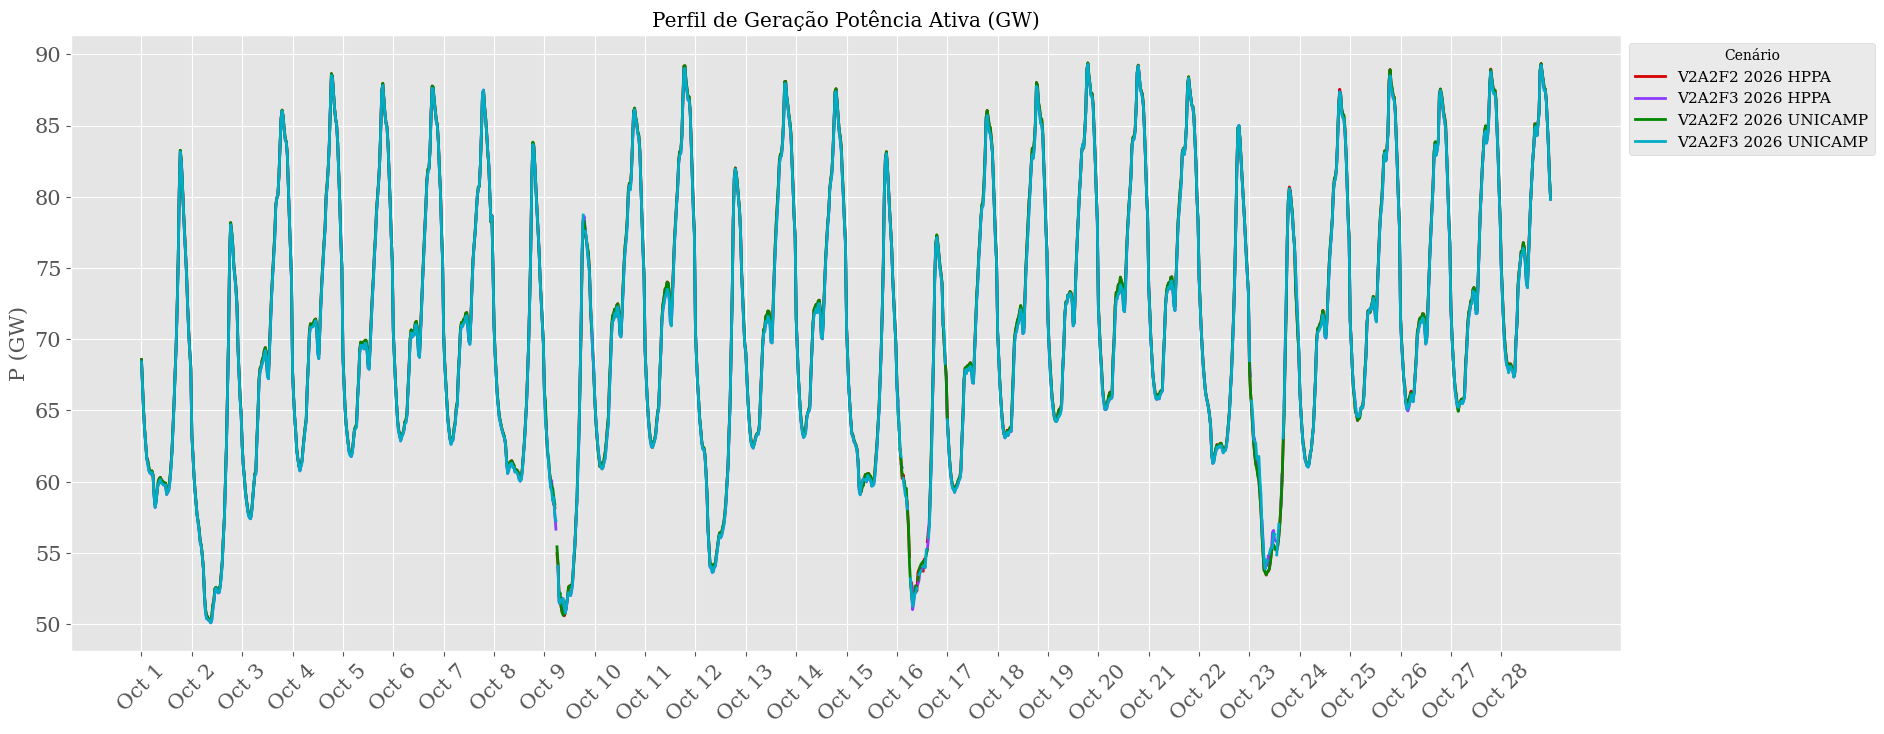

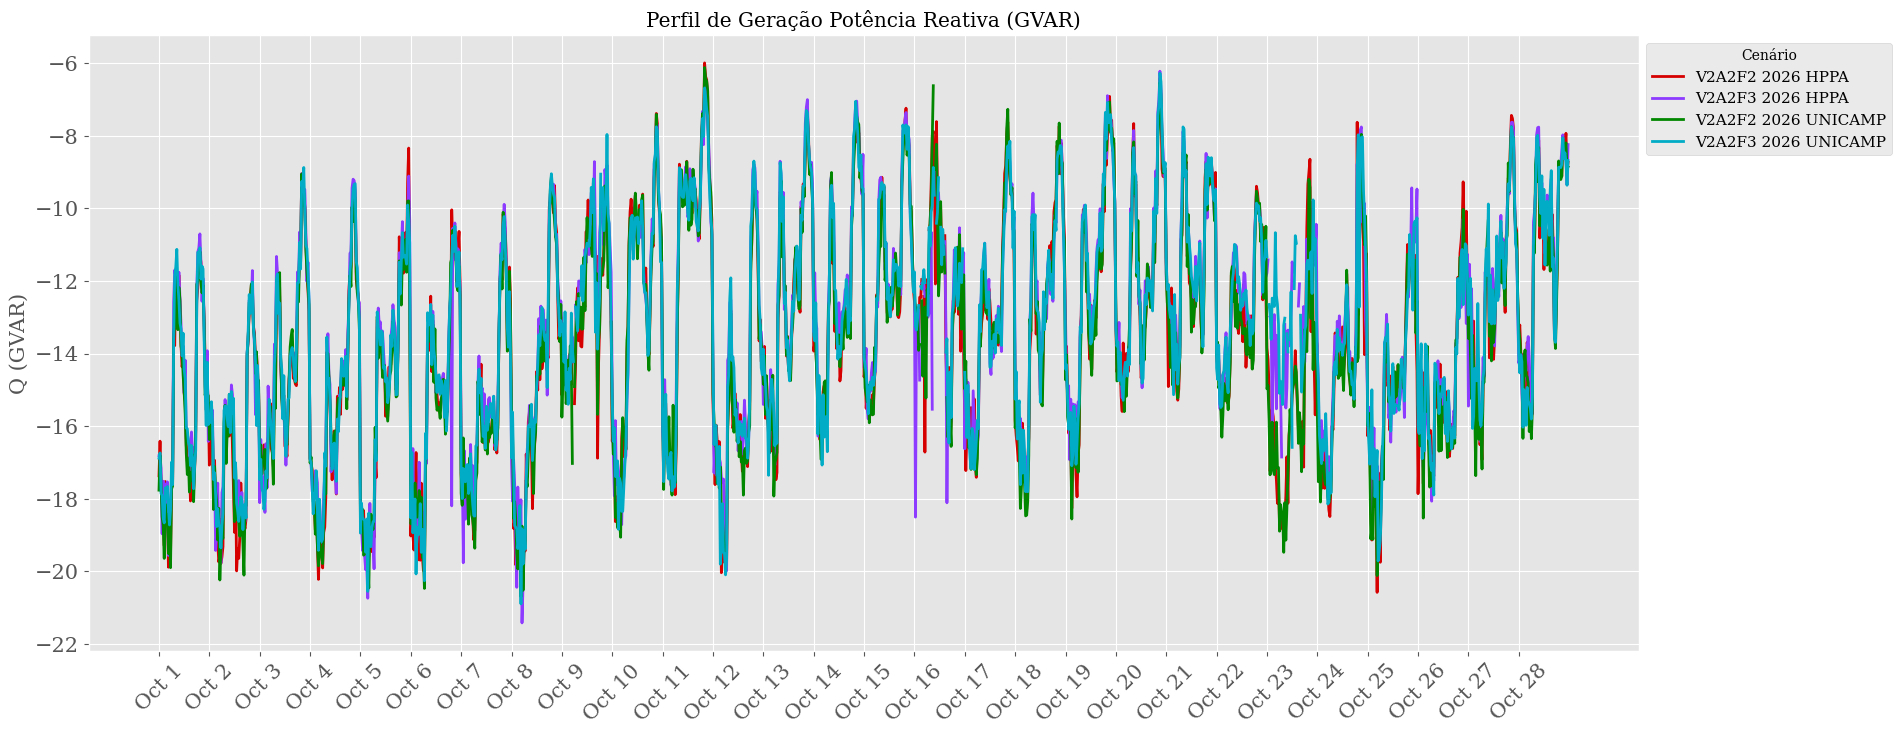

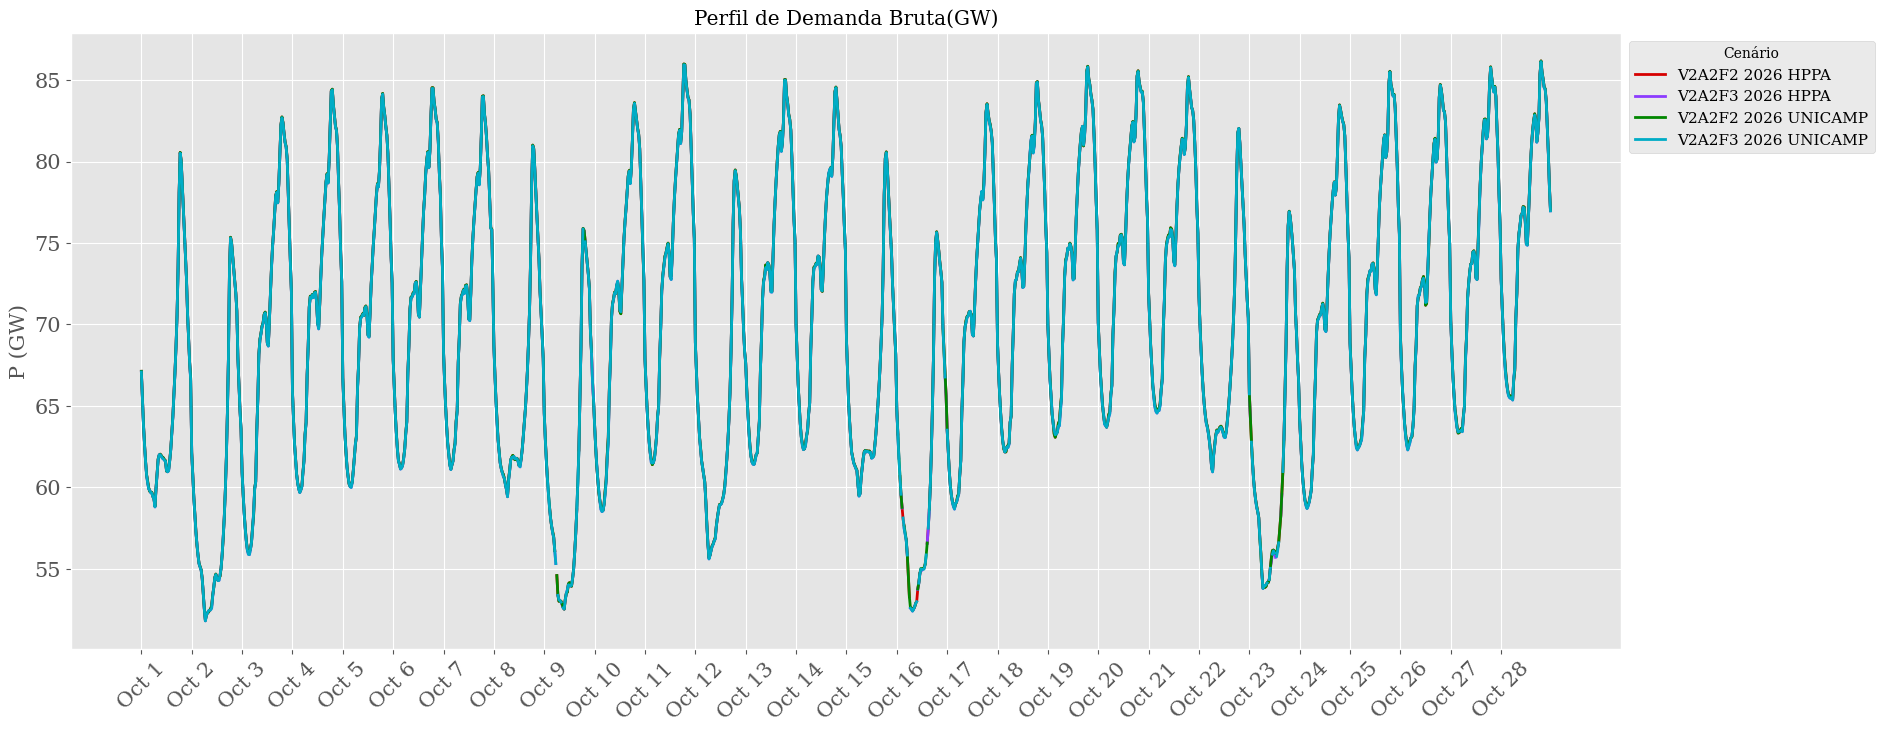

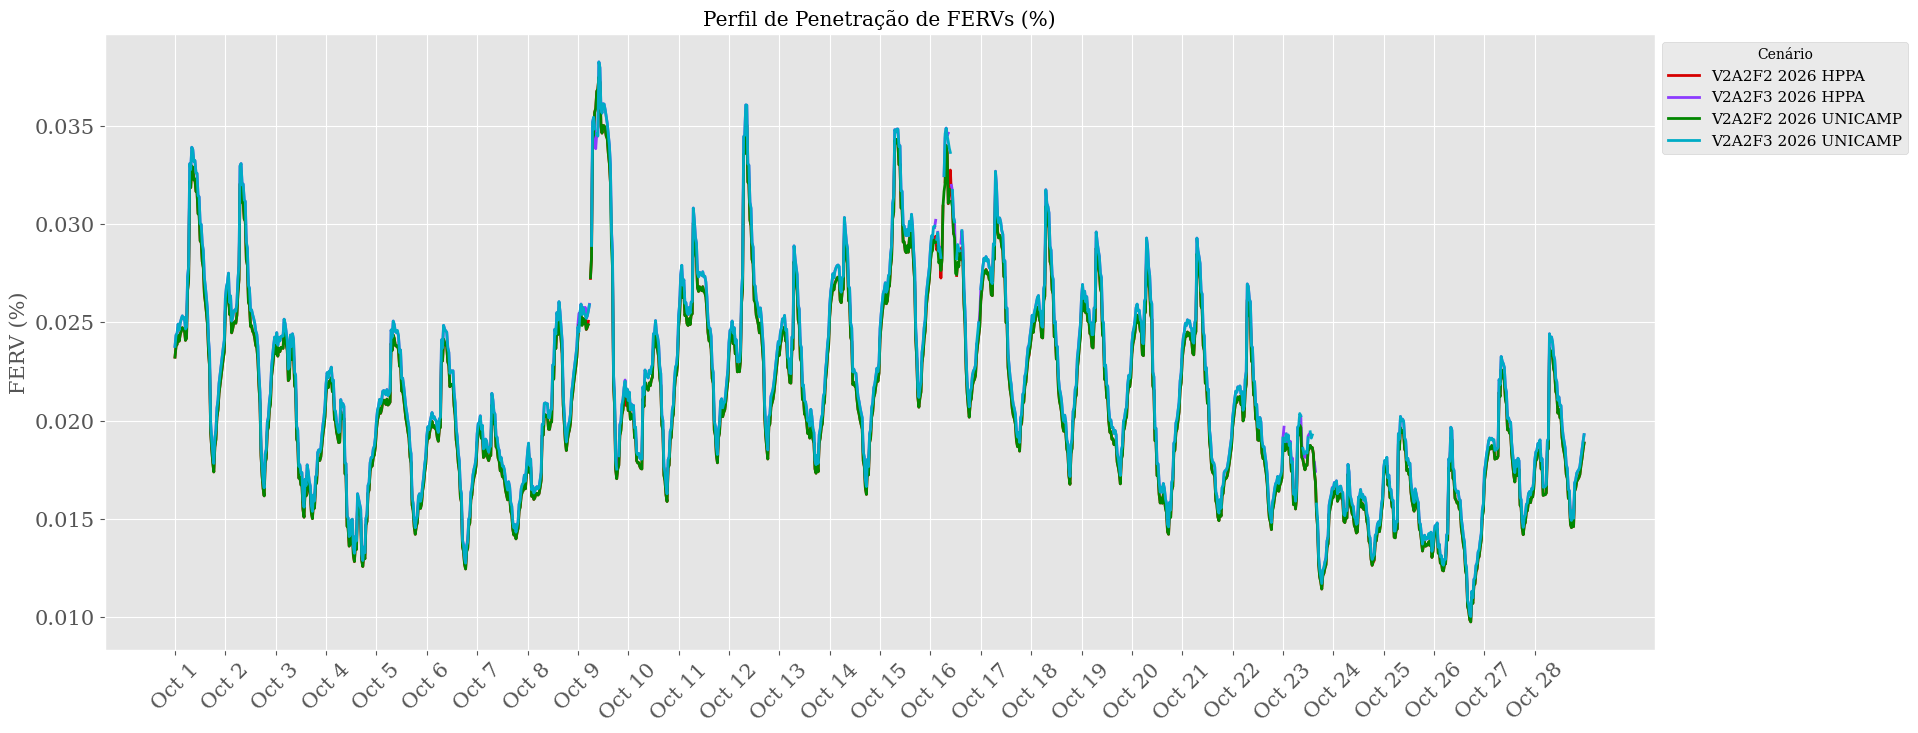

71.05838821498128
71.01660352528302
71.00898662808066
70.96923419051205


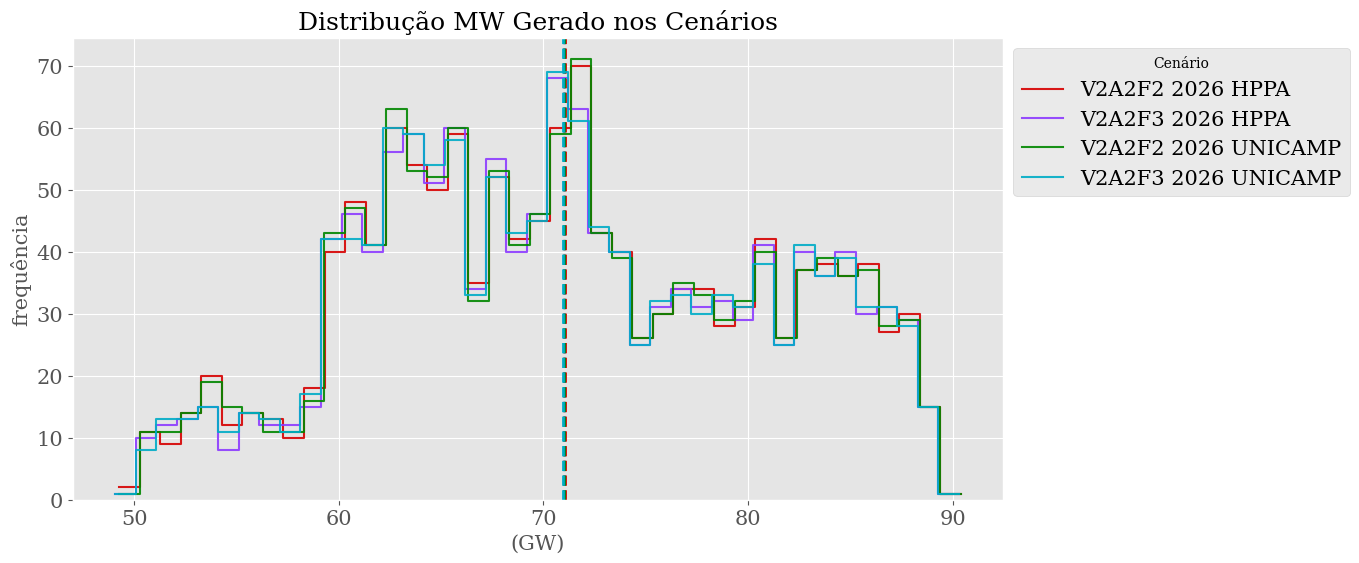

-13.662012250187269
-13.349491951698113
-13.725038702763253
-13.391507486445784


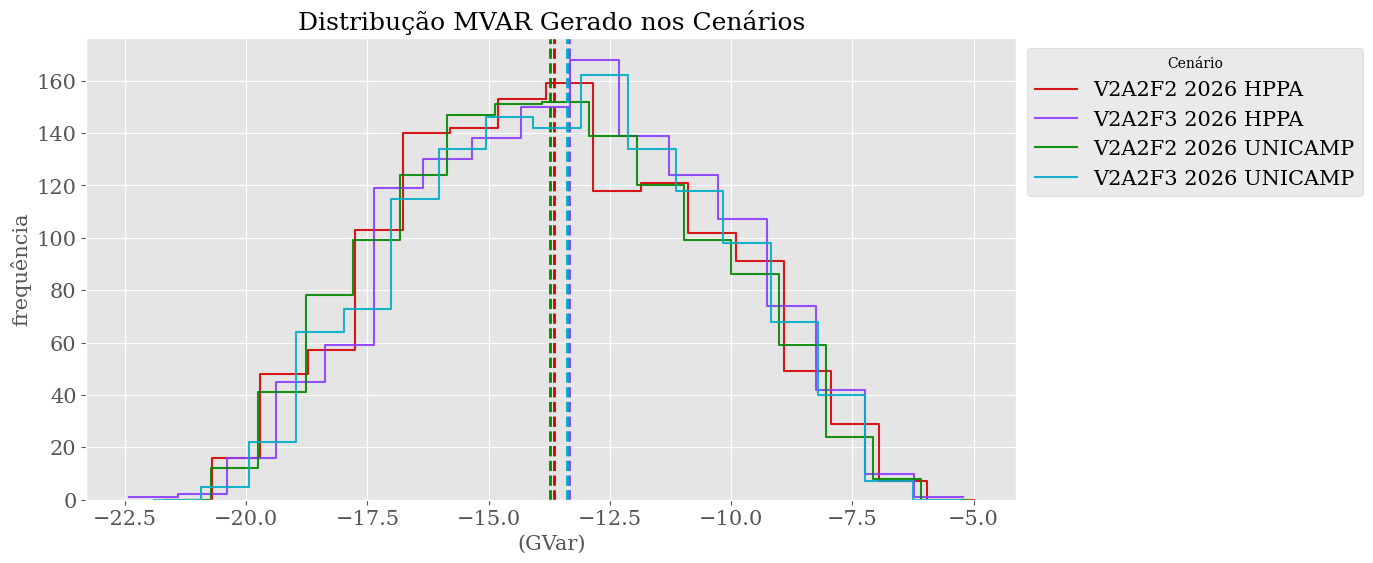

9.330137026217228
9.2672268
9.30966292008962
9.269259299698795


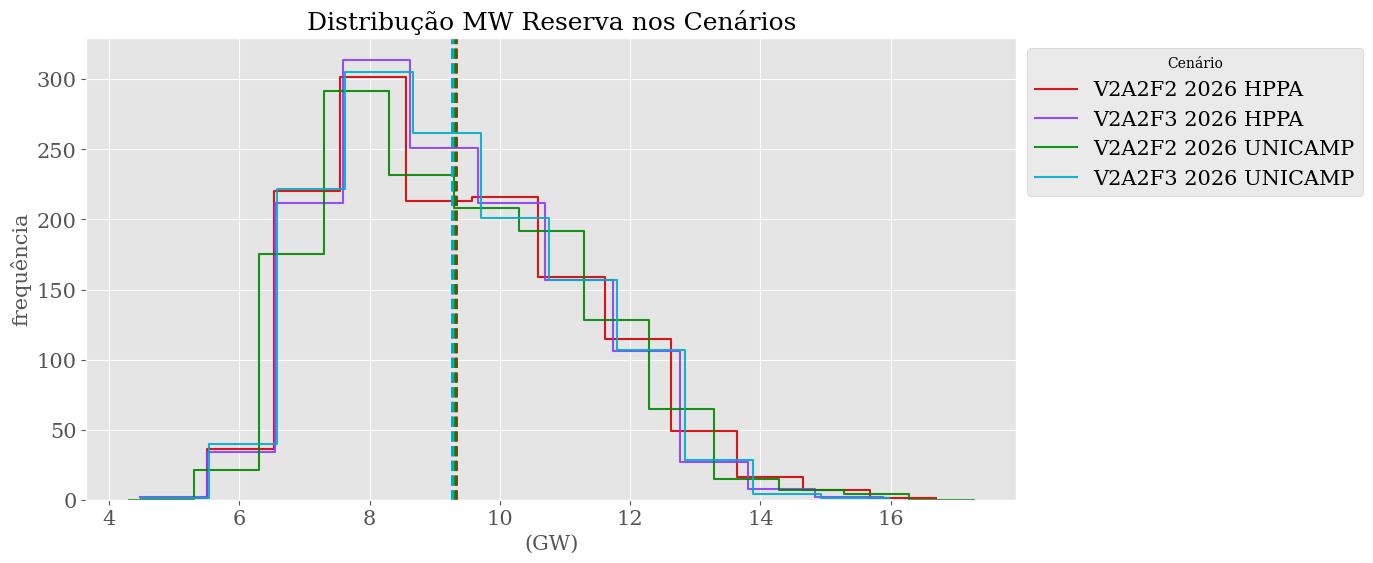

In [10]:
def plot_perfil_pot(df, columna, ylbl, titulo, ylim = None, day = False, variavel = None, otherplot = False):

    fig, ax = plt.subplots(figsize=(20, 8))
    for cenario in df['Cenario'].unique():
        dff = df[df['Cenario'] == cenario]
        dff_ = df_mask.merge(dff, on=['Dia','Hora', 'Cenario'], how='left')
        # plt.plot(dff_['Dia_Hora'], dff_[columna]/1000, label=namescenarios[cenario][0], color=namescenarios[cenario][1], )
        # plt.plot(dff_['Dia_Hora'], dff_[columna], label=namescenarios[cenario][0], color=namescenarios[cenario][1], )
        if 'V3A3' in cenario:
            plt.plot(dff_['Dia_Hora'], dff_[columna]/1000, label=namescenarios[cenario][0], color=namescenarios[cenario][1], linewidth=2.5, alpha=1)
        else:
            plt.plot(dff_['Dia_Hora'], dff_[columna]/1000, label=namescenarios[cenario][0], color=namescenarios[cenario][1], linewidth=2, alpha=1)

        
    # plt.legend(title='Cenário', fontsize=18)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Cenário', fontsize=11)
    plt.title(titulo)
    plt.xlabel('Operation Point',fontsize=15)
    plt.ylabel(ylbl, fontsize=15)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(28))
    if day:
        days = ['Oct {}'.format(i+1) for i in range(28)]
        plt.xticks(ticks=[i*48 for i in range(28)], labels=days, rotation=45)
        plt.xlabel('',fontsize=10)
    # plt.grid('-',lw = 0.4, alpha=0.50)
    if ylim != None:
        plt.ylim(ylim)
    if otherplot == False:
        plt.show()

def distribution_plot(df, columna, xlbl, titulo, variavel = None):

    plt.figure(figsize=(12, 6))
    for dff in df:
        if variavel == None:
            cenario = dff['Cenario'].iloc[0]
        else:
            cenario = dff[variavel].iloc[0]

        valuegw = dff[columna]/1000
        max= dff[columna].max()/1000
        min= dff[columna].min()/1000
        sns.histplot(valuegw, kde=False, label=namescenarios[cenario][0], color=namescenarios[cenario][1], bins=50, binwidth = 1, binrange =[min-1, max+1]  ,multiple="stack",alpha=0.90, element='step',fill=False, line_kws = {
        "linewidth": 2,  # Example: Make the line thicker
        "linestyle": "--" # Example: Use a dashed line
        })
        plt.axvline(valuegw.mean(), color=namescenarios[cenario][1], linestyle='dashed', linewidth=2)
        print(valuegw.mean())

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('frequência', fontsize=15)
    plt.tick_params(axis='both', labelsize=15)
    # plt.legend(loc='best', fontsize = 15)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Cenário', fontsize=15)
    # plt.grid()
    plt.show()


if Analise_Potencia:
    df_pot_mw_mvar_filt = pd.concat(filtarNC(dfs['pot_mw_mvar']), axis=0)
    df_pot_mw_mvar_filt['PG_FERV'] = (df_pot_mw_mvar_filt['PG_EOL'] + df_pot_mw_mvar_filt['PG_SOL'])/df_pot_mw_mvar_filt['PL_MW']*100
    plot_perfil_pot(df_pot_mw_mvar_filt, columna='PG_MW', ylbl='P (GW)', titulo='Perfil de Geração Potência Ativa (GW)', day=True)
    plot_perfil_pot(df_pot_mw_mvar_filt, columna='QG_MVAR', ylbl='Q (GVAR)', titulo='Perfil de Geração Potência Reativa (GVAR)', day=True)
    plot_perfil_pot(df_pot_mw_mvar_filt, columna='PL_MW', ylbl='P (GW)', titulo='Perfil de Demanda Bruta(GW)', day=True)
    
    plot_perfil_pot(df_pot_mw_mvar_filt, columna='PG_FERV', ylbl='FERV (%)', titulo='Perfil de Penetração de FERVs (%)', day=True)
    
    df_pot_mw_mvar_filt = filtarNC(dfs['pot_mw_mvar'])
    distribution_plot(df_pot_mw_mvar_filt,'PG_MW', '(GW)', 'Distribução MW Gerado nos Cenários')
    distribution_plot(df_pot_mw_mvar_filt,'QG_MVAR', '(GVar)', 'Distribução MVAR Gerado nos Cenários')
    
    if Analise_Reserva:
        df_mw_reserv = filtarNC(dfs['pot_mw_reserv'])
        distribution_plot(df_mw_reserv,' Reserve', '(GW)', 'Distribução MW Reserva nos Cenários')
        # df_pot_mvar_reserv = filtarNC(dfs['pot_mvar_reserv'])
        # distribution_plot(df_pot_mvar_reserv,'ReservaIND', '(GVAR)', 'Distribução MVAR Reserva Indutiva nos Cenários')
        # distribution_plot(df_pot_mvar_reserv,'ReservaCAP', '(GVAR)', 'Distribução MVAR Reserva Capacitiva nos Cenários')

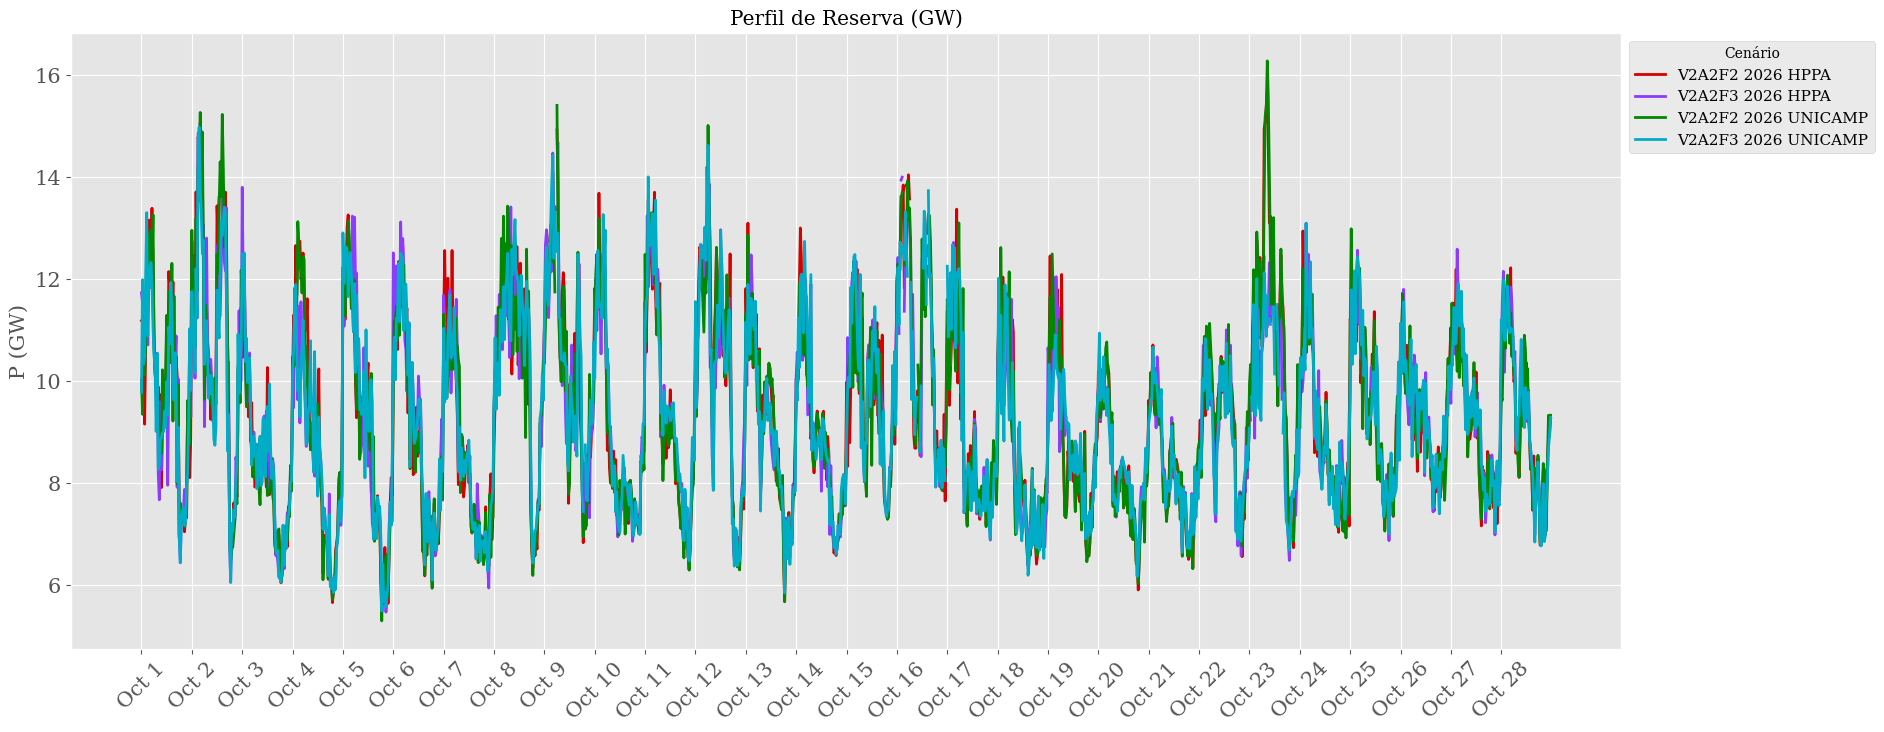

In [11]:
plot_perfil_pot(pd.concat(filtarNC(dfs['pot_mw_reserv']), axis=0), columna=' Reserve', ylbl='P (GW)', titulo='Perfil de Reserva (GW)', day=True)

In [12]:
df_pot_mw_mvar_filt = pd.concat(filtarNC(dfs['pot_mw_mvar']), axis=0)

In [13]:
df_pot_mw_mvar_filt

Unnamed: 0  Dia   Hora      PG_MW      PL_MW     PG_EOL  PG_SOL  \
0              0    1  00-00  68559.278  67120.112  15562.200  34.000   
1              1    1  00-30  66785.016  65529.246  15560.140  34.000   
2              2    1  01-00  65003.227  63883.936  15225.310  31.680   
3              3    1  01-30  63715.270  62665.986  15224.470  31.680   
4              4    1  02-00  62708.566  61619.485  14788.780  29.540   
...          ...  ...    ...        ...        ...        ...     ...   
1339        1339   28  21-30  86616.280  83666.593  14758.891  23.971   
1340        1340   28  22-00  85062.997  82097.612  14855.121  21.964   
1341        1341   28  22-30  83278.418  80471.387  14853.526  21.849   
1342        1342   28  23-00  81162.671  78452.033  14833.756  20.399   
1343        1343   28  23-30  79808.501  76973.619  14829.178  20.246   

        QG_MVAR   PG_FERV           key              Cenario  
0    -17370.461  1.279693   D_1_H_00-00     V2A2F2 2026 HPPA  
1    -16415.199  1.292689   D_1_H_00-30     V2A2F2 2026 HPPA  
2    -17668.453  1.282785   D_1_H_01-00     V2A2F2 2026 HPPA  
3    -17615.818  1.299594   D_1_H_01-30     V2A2F2 2026 HPPA  
4    -18114.690  1.274546   D_1_H_02-00     V2A2F2 2026 HPPA  
...         ...       ...           ...                  ...  
1339  -8620.860  1.137556  D_28_H_21-30  V2A2F3 2026 UNICAMP  
1340  -8464.769  1.165529  D_28_H_22-00  V2A2F3 2026 UNICAMP  
1341  -8723.672  1.175374  D_28_H_22-30  V2A2F3 2026 UNICAMP  
1342  -9359.024  1.184752  D_28_H_23-00  V2A2F3 2026 UNICAMP  
1343  -8680.607  1.197395  D_28_H_23-30  V2A2F3 2026 UNICAMP  

[5327 rows x 11 columns]

In [14]:
a = df_pot_mw_mvar_filt[df_pot_mw_mvar_filt['Cenario']=='V2A2F2 2026 HPPA'][['key','QG_MVAR']]
b = df_pot_mw_mvar_filt[df_pot_mw_mvar_filt['Cenario']=='V2A2F2 2026 UNICAMP'][['key','QG_MVAR']]
c = a.merge(b, on='key', how='inner')
c['delta'] = c['QG_MVAR_x']-c['QG_MVAR_y']

In [15]:
c.sort_values('delta').head(15)

key  QG_MVAR_x  QG_MVAR_y     delta
723   D_16_H_05-00 -16716.590 -12718.220 -3998.370
731   D_16_H_10-00 -12081.924  -8926.001 -3155.923
1136  D_24_H_22-30 -14031.303 -11008.481 -3022.822
756   D_17_H_00-30 -17225.437 -14208.619 -3016.818
754   D_16_H_23-30 -14214.110 -11827.280 -2386.830
1187  D_26_H_00-00 -17862.966 -15515.538 -2347.428
862   D_19_H_05-30 -17949.465 -15799.089 -2150.376
949   D_21_H_01-00 -14910.807 -12847.085 -2063.722
1089  D_23_H_23-00 -15690.164 -13705.415 -1984.749
1186  D_25_H_23-30 -14481.154 -12542.738 -1938.416
346    D_8_H_05-00 -20679.879 -18756.398 -1923.481
1042  D_22_H_23-30 -12399.955 -10490.692 -1909.263
278    D_6_H_19-00 -13350.871 -11494.455 -1856.416
1039  D_22_H_22-00 -12518.484 -10788.511 -1729.973
532   D_12_H_04-00 -20041.454 -18403.409 -1638.045

In [16]:
pd.concat(filtarNC(dfs['pot_mw_reserv']), axis=0)[' Reserve'].mean()

9294.166217383143

55.652280337827726
55.32207315698113
55.603483831964155
55.28226238930723


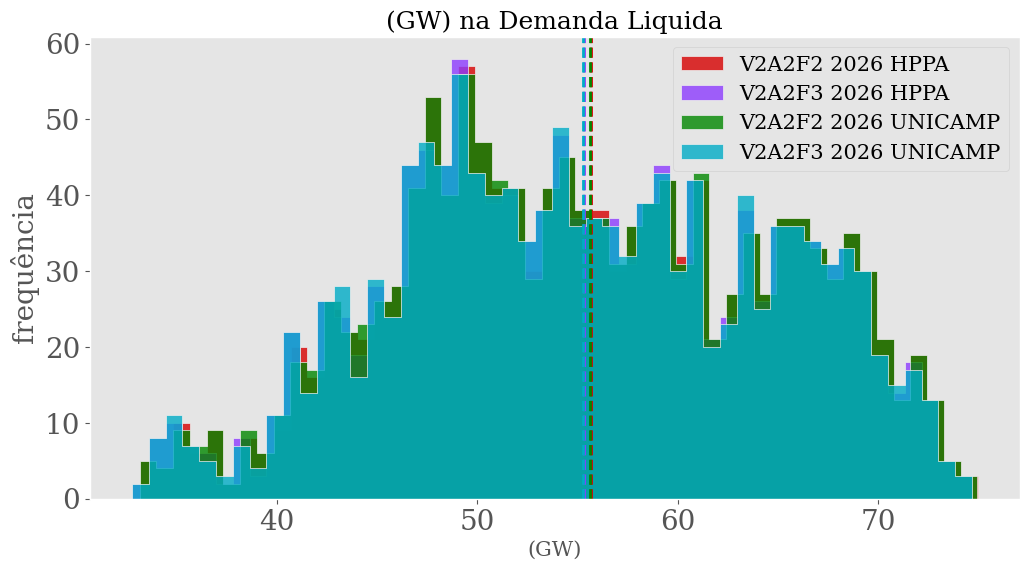

-13.662012250187265
-13.349491951698113
-13.725038702763255
-13.391507486445784


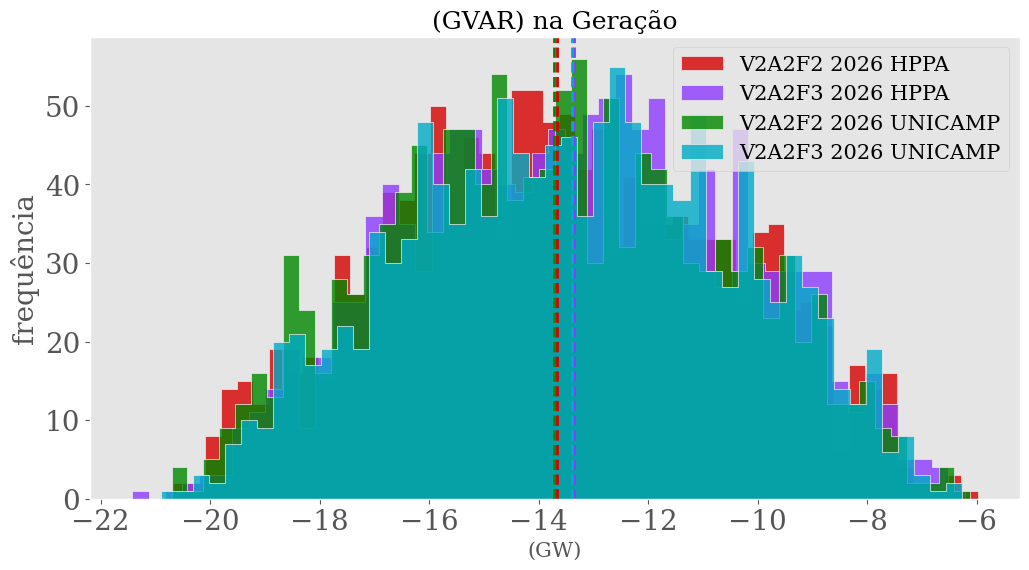

In [17]:
def distribution_plot(df, columna, xlbl, titulo, variavel = None):

    plt.figure(figsize=(12, 6))
    for cen in df['Cenario'].unique():
        dff = df[df['Cenario'] == cen]
        valuegw = dff[columna]/1000
        sns.histplot(valuegw, kde=False, label=namescenarios[cen][0], color=namescenarios[cen][1], bins=50, multiple="stack",alpha=0.80, element='step',fill=True, line_kws = {
        "linewidth": 2,  # Example: Make the line thicker
        "linestyle": "--" # Example: Use a dashed line
        })
        plt.axvline(valuegw.mean(), color=namescenarios[cen][1], linestyle='dashed', linewidth=2)
        print(valuegw.mean())

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('frequência', fontsize=20)
    plt.tick_params(axis='both', labelsize=20)
    plt.legend(loc='best', fontsize = 15)
    plt.grid()
    plt.show()

distribution_plot(DF_complete_PO.reset_index(), 'DL_MW', '(GW)', '(GW) na Demanda Liquida')
distribution_plot(DF_complete_PO.reset_index(), 'QG_MVAR', '(GW)', '(GVAR) na Geração')

7.0094903213483155
7.0139956784905655
7.007771761762509
7.012765722891567


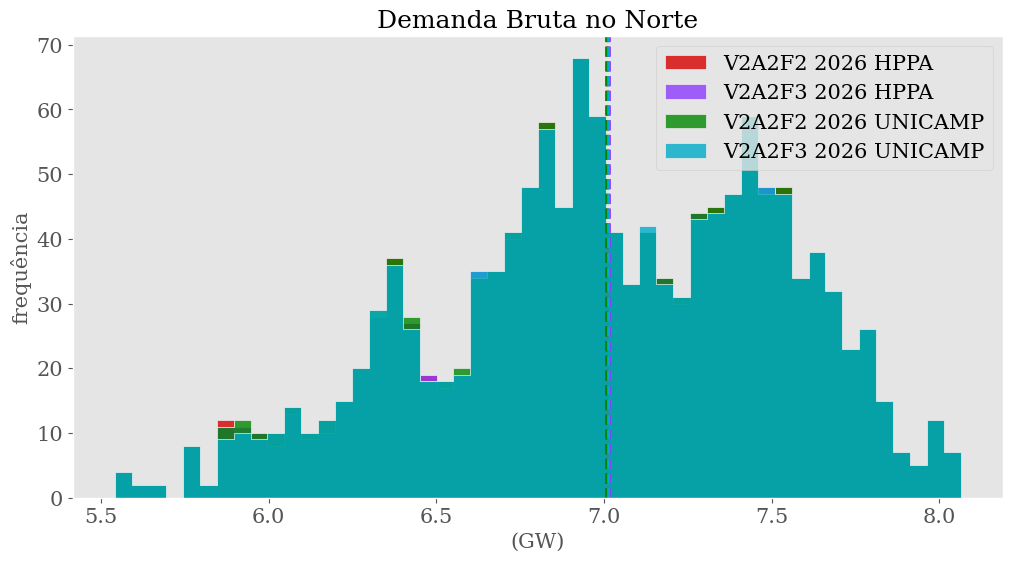

11.899193044194757
11.913947640754717
11.893102708737866
11.908277551957832


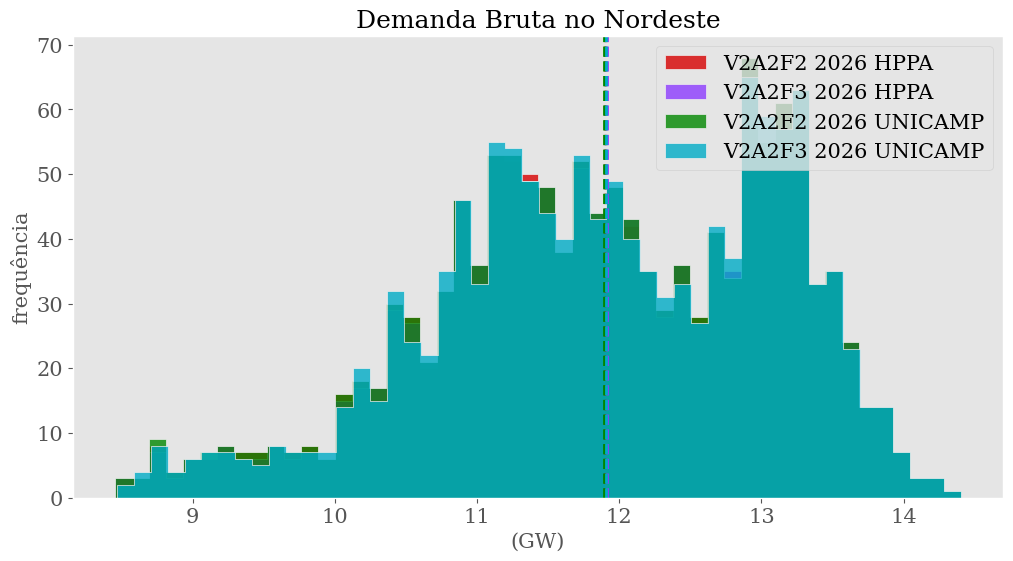

37.84740559925093
37.90206553660377
37.824081769230766
37.8768355248494


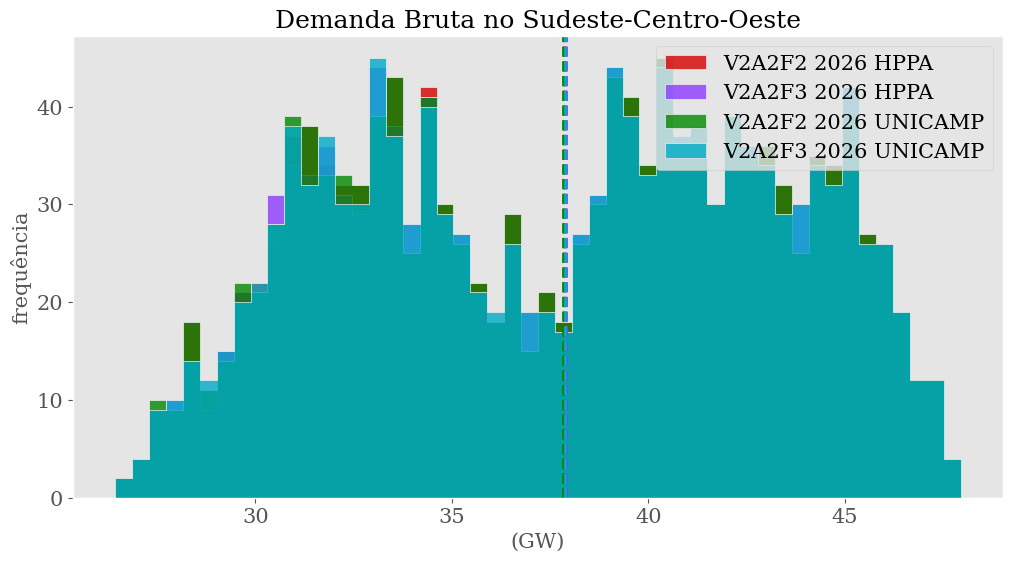

12.956893315355805
12.945593833962267
12.944912263629575
12.933393226656625


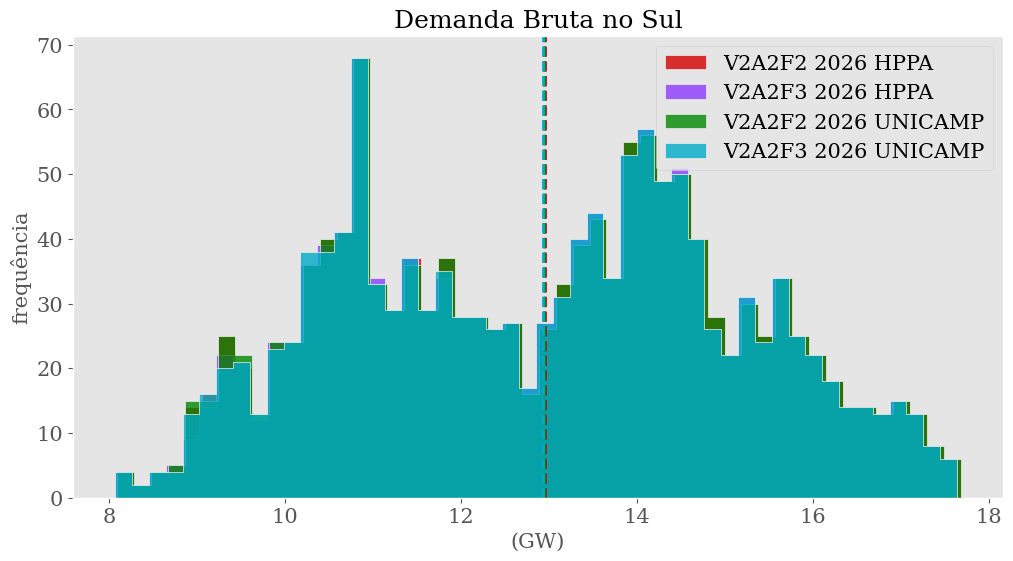

0.40365577677902625
0.4042726150943396
0.40334491560866326
0.4040351197289157


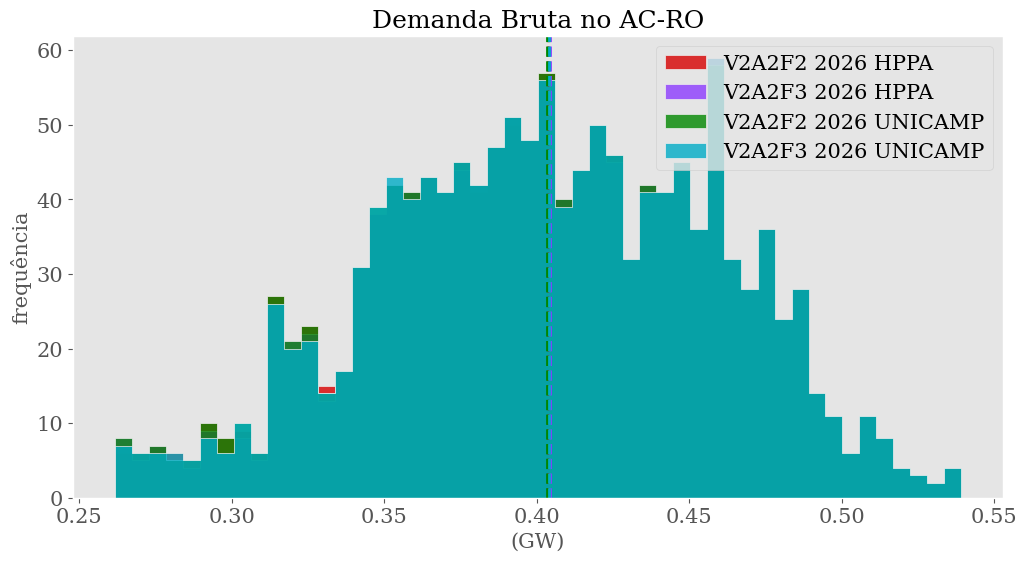

In [18]:
def distribution_plot_reg(df, columna, reg, xlbl, titulo):
    
    plt.figure(figsize=(12, 6))
    for df_ in df:
        dff = df_[df_['REG'] == reg]
        cenario = dff['Cenario'].iloc[0]
        valuegw = dff[columna]/1000
        sns.histplot(valuegw, kde=False, label=namescenarios[cenario][0], color=namescenarios[cenario][1], bins=50, multiple="stack",alpha=0.80, element='step',fill=True, line_kws = {
        "linewidth": 2,  # Example: Make the line thicker
        "linestyle": "--" # Example: Use a dashed line
        })
        plt.axvline(valuegw.mean(), color=namescenarios[cenario][1], linestyle='dashed', linewidth=2)
        print(valuegw.mean())

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('frequência', fontsize=15)
    plt.tick_params(axis='both', labelsize=15)
    plt.legend(loc='best', fontsize = 15)
    plt.grid()
    plt.show()

regiones = ['Norte', 'Nordeste', 'Sudeste-Centro-Oeste', 'Sul', 'AC-RO']
if Analise_Potencia:
    for reg in regiones:
        df_pot_mw_mvar_reg = filtarNC(dfs['ger_reg'])
        distribution_plot_reg(df_pot_mw_mvar_reg, 'PL_MW', reg, '(GW)', f'Demanda Bruta no {reg}')


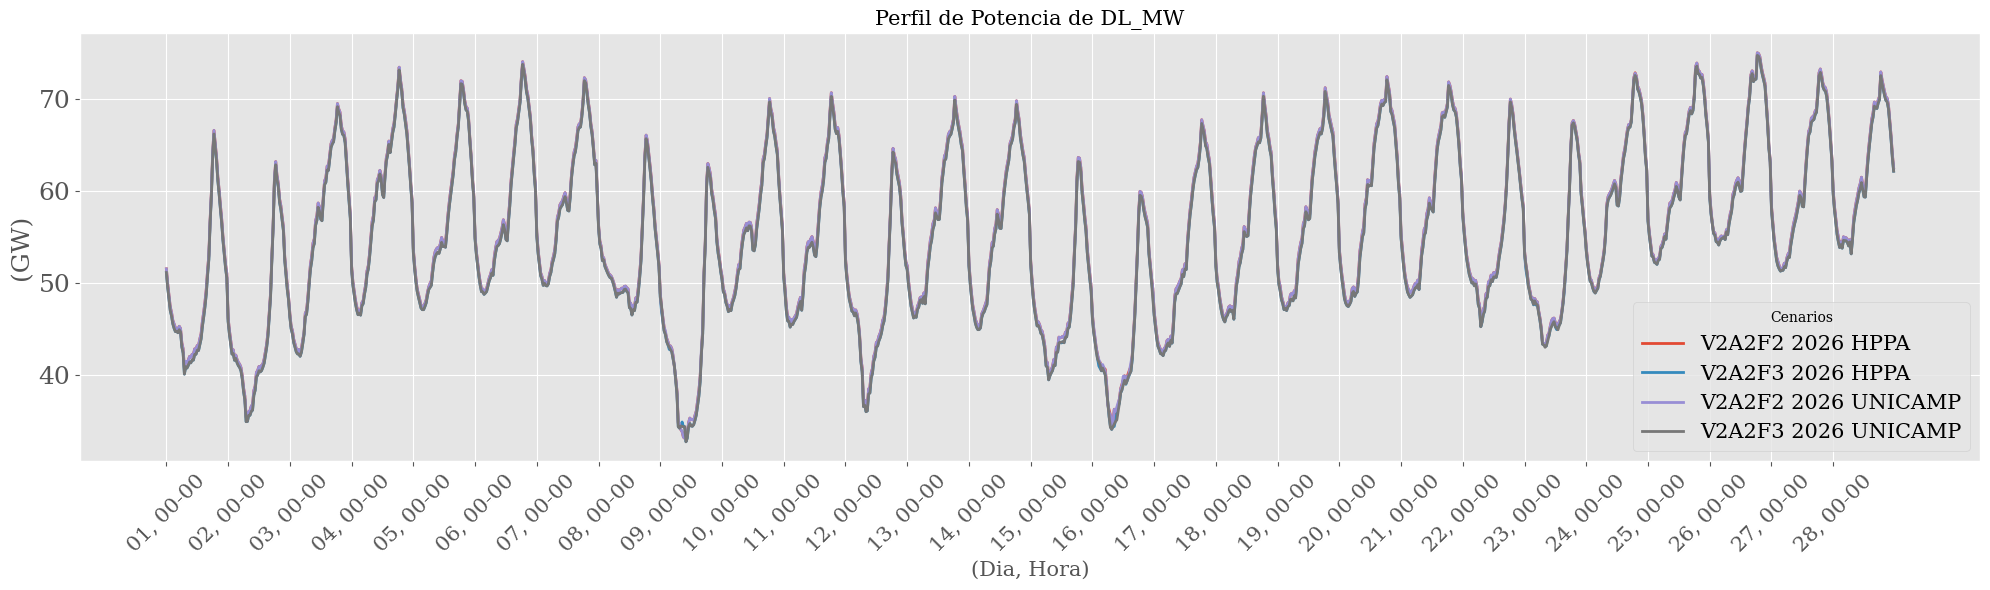

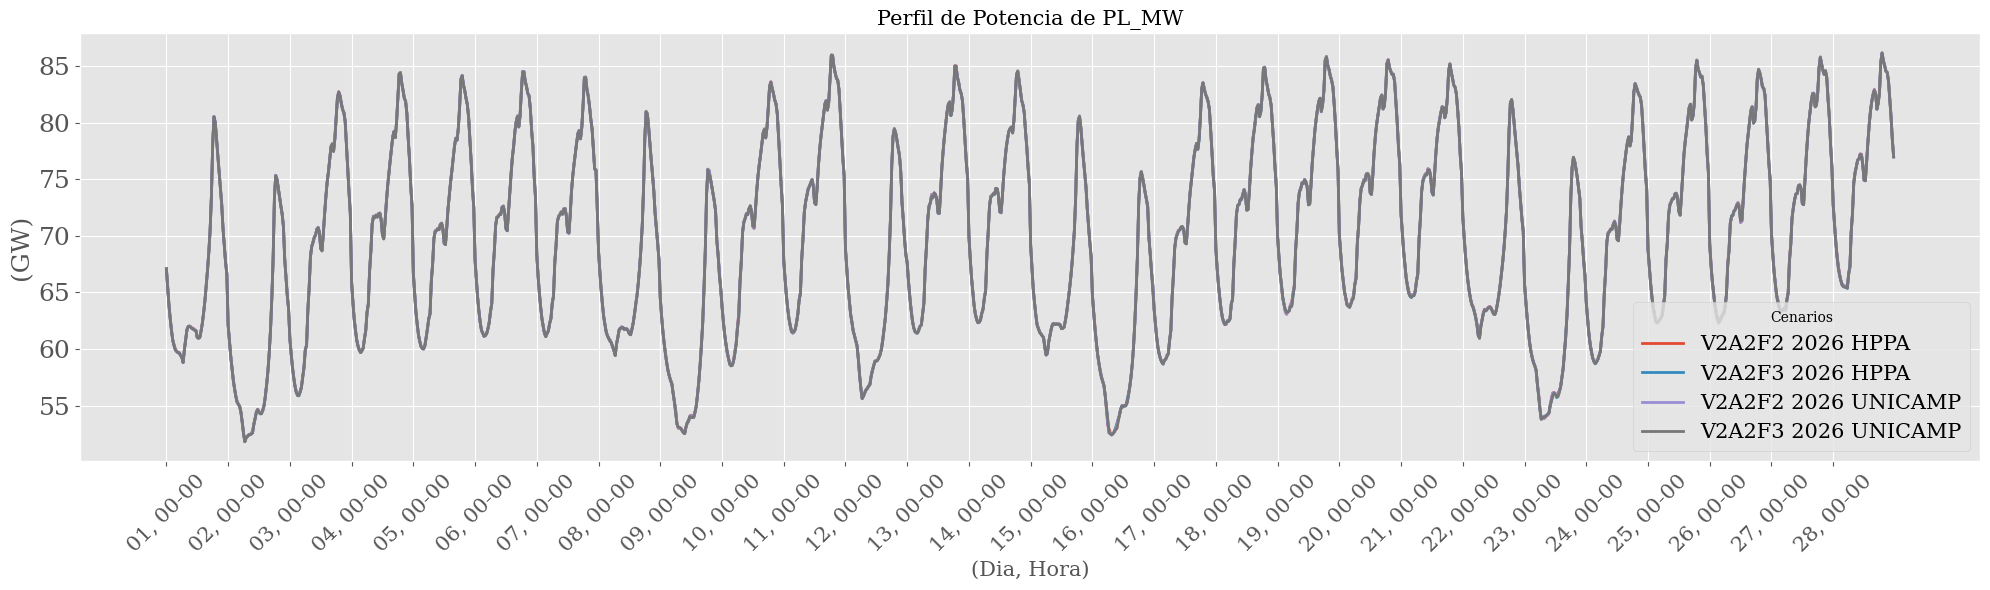

In [19]:
def plot_potencia_perfil(df_resultado, df_data, column, ylim = None, markers=True,):

    df = df_resultado.merge(df_data,on=['Dia','Hora', 'Cenario'], how='left')
    df[column] = df[column]/1000
    plt.figure(figsize=(20, 6))
    sns.lineplot(data=df, x='Dia_Hora', y=column, hue='Cenario', markers=markers, lw = 2)
    plt.xlabel('(Dia, Hora)', fontsize = 15)
    plt.ylabel('(GW)', fontsize = 18)
    plt.title(f'Perfil de Potencia de {column}', fontsize = 15)

    value = int(df['Dia_Hora'].unique().shape[0] / 28)
    selected_ticks = df[df['Cenario'] == df['Cenario'].unique()[0]].iloc[::value]['Dia_Hora']
    plt.xticks(selected_ticks, rotation=45, fontsize=15)
    plt.tick_params(axis='y', labelsize=18)
    plt.legend(title='Cenarios', fontsize = 15)
    if ylim != None:
        plt.ylim(ylim)
    plt.tight_layout()
    plt.show()

plot_potencia_perfil(df_mask, DF_complete_PO, 'DL_MW', markers=False)
plot_potencia_perfil(df_mask, DF_complete_PO, 'PL_MW', markers=False)

In [20]:
DF_complete_PO['DL_MW'].max()

74969.042

# Analise de Tensão 1

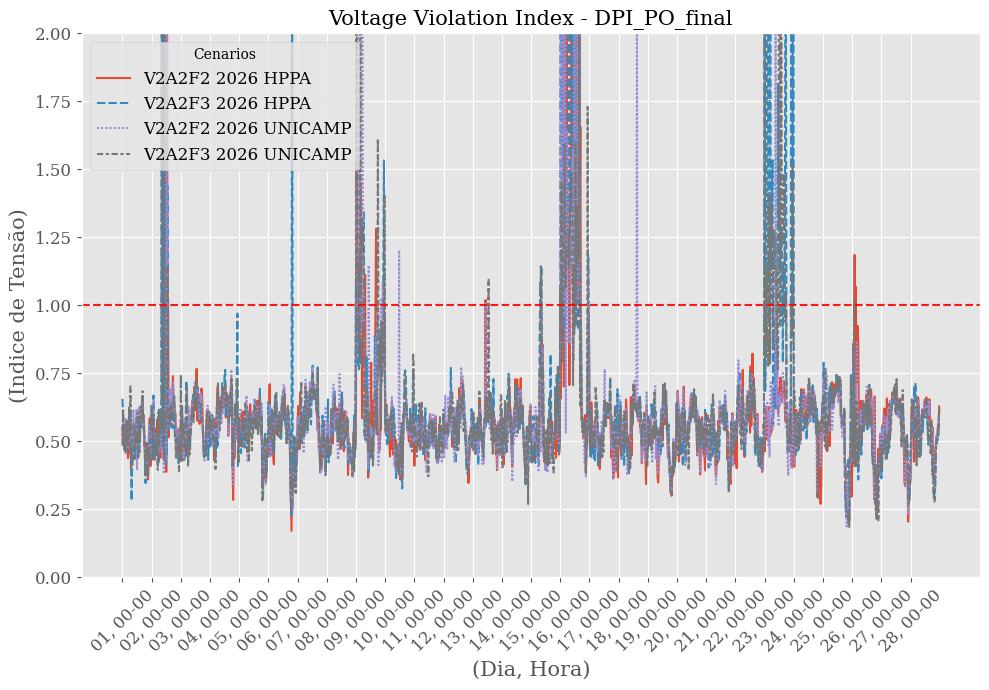

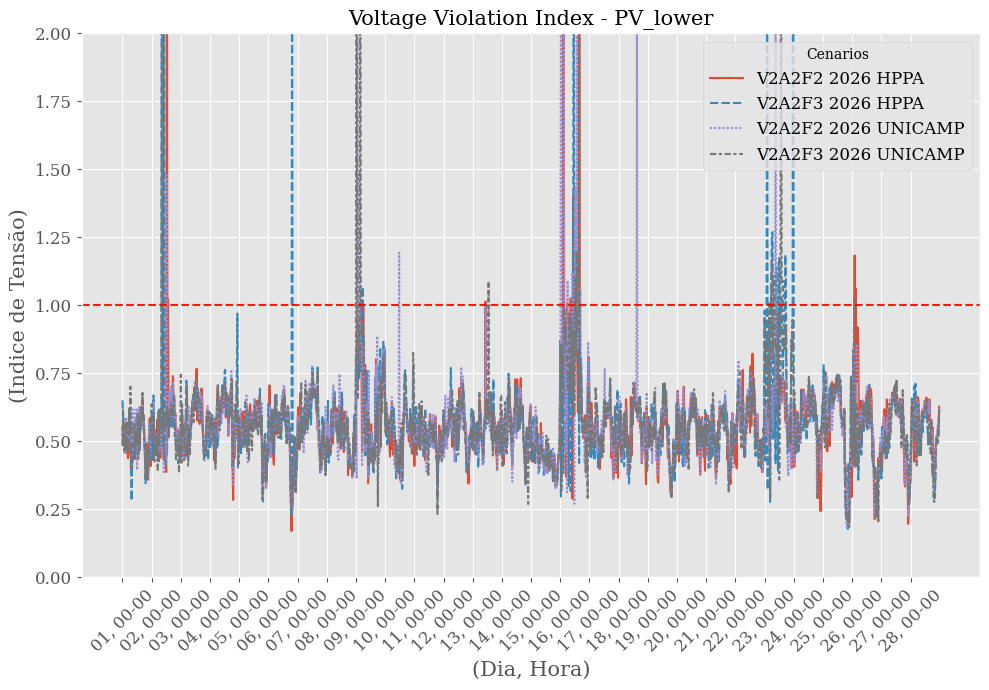

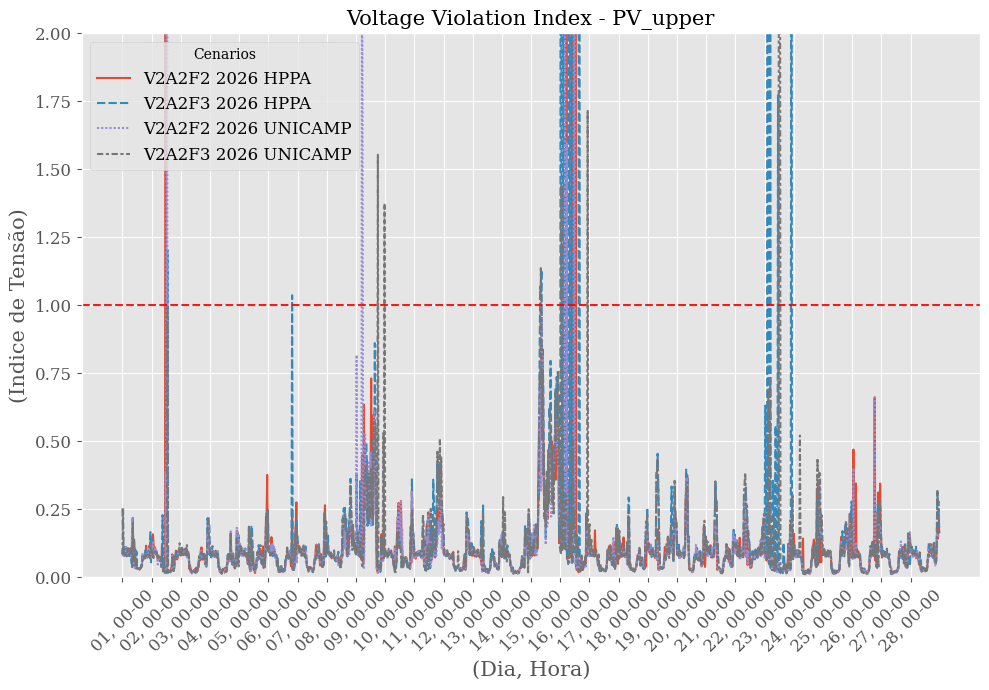

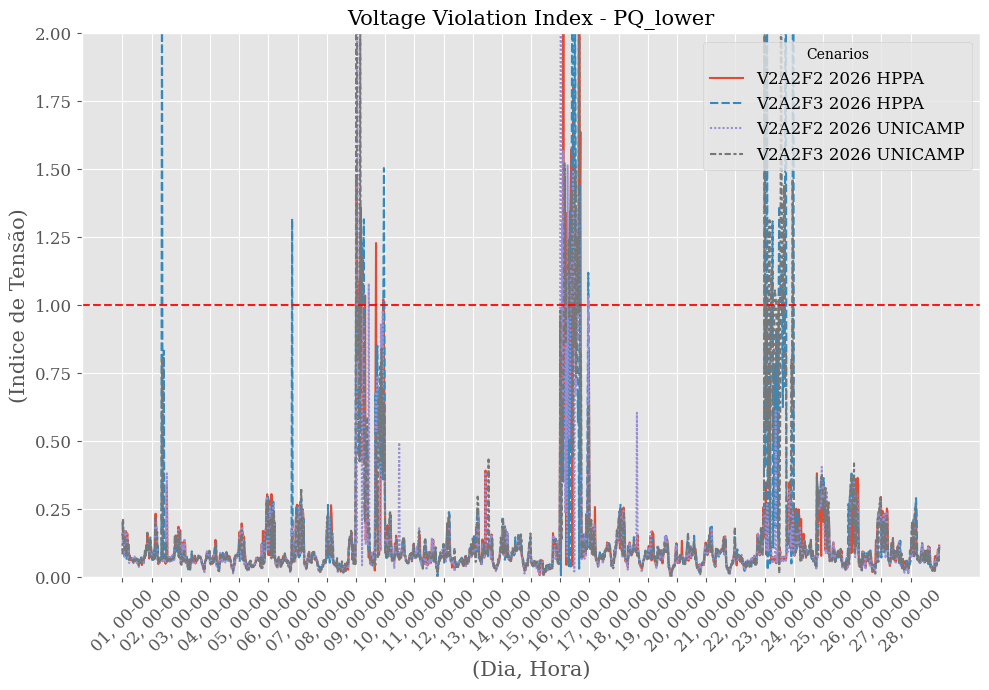

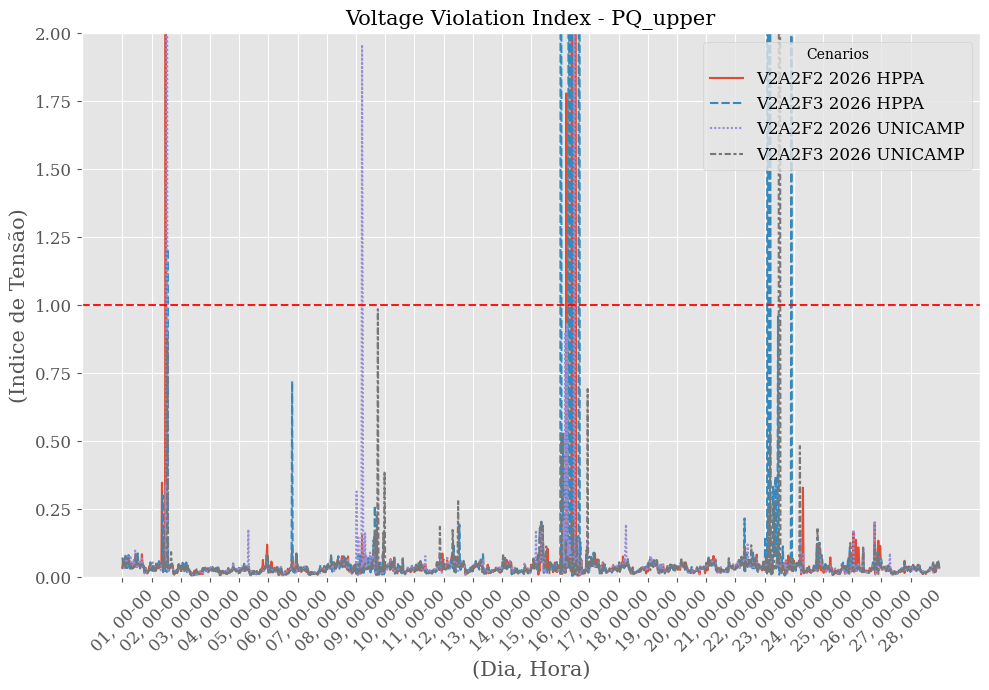

In [21]:
def plot_indice_perfil(df_resultado, df_data, column, ylim = None, markers=True,):

    df = df_resultado.merge(df_data,on=['Dia','Hora', 'Cenario'], how='left')
    df = df[['Dia_Hora','Cenario' ,  column]]

    # Plotting
    plt.figure(figsize=(10, 7))
    # sns.lineplot(data=F_ONS_melted, x='Dia_Hora', y='value', hue='Fluxos', style='Fluxos', markers=True)
    sns.lineplot(data=df, x='Dia_Hora', y=column, hue='Cenario', style='Cenario', markers=markers)
    plt.xlabel('(Dia, Hora)', fontsize = 15)
    plt.ylabel('(Indice de Tensão)', fontsize = 15)
    plt.title(f'Voltage Violation Index - {column}', fontsize = 15)

    value = int(df['Dia_Hora'].unique().shape[0] / 28)
    selected_ticks = df[df['Cenario'] == df['Cenario'].unique()[0]].iloc[::value]['Dia_Hora']
    plt.xticks(selected_ticks, rotation=45, fontsize=12)
    plt.tick_params(axis='y', labelsize=12)

    # plt.xlim(selected_ticks.iloc[0], selected_ticks.iloc[-1])
    plt.legend(title='Cenarios', fontsize = 12)
    # Agregar la línea horizontal en el valor cero del eje y
    plt.axhline(1, color='red', linestyle='--' ,  alpha=0.9)
    if ylim != None:
        plt.ylim(ylim)
    plt.tight_layout()
    # plt.grid()
    plt.show()

if Analise_Tensão:
    # plt.figure(figsize=(20, 7))
    # plot_perfil_pot(dfs['Index_PO'], columna='DPI_PO_final', ylbl='Indice (pu)', titulo='Indice de Violação de Tensão do Ponto de Operação', day=True, otherplot=True)
    # plt.axhline(1, color='red', linestyle='--' ,  alpha=0.9)
    # plt.show()
    plot_indice_perfil(df_mask, pd.concat(dfs['Index_PO'], axis=0), 'DPI_PO_final',markers=False, ylim=[0,2])
    for column in DATA['df_indice_group'].columns:
        plot_indice_perfil(df_mask, DATA['df_indice_group'], column, markers=False, ylim=[0,2])

In [22]:
def boxplot_voltage(df, clase, titulo, xlbl, ylim=None):
    # Apply matplotlib styles
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    plt.style.use("ggplot")

    # Create seaborn boxplot with customizations
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(data=df, x=clase, y="MODV_PU", hue="Cenario", width=0.8, linewidth=1.5, palette="mako",flierprops={'markerfacecolor': 'gray', 'marker': 'o'},legend=True, showfliers = True)

    # Customize axes spines
    border_color = 'black'
    linewidth = 1.2
    ax.spines['top'].set_color(border_color)
    ax.spines['bottom'].set_color(border_color)
    ax.spines['left'].set_color(border_color)
    ax.spines['right'].set_color(border_color)
    ax.spines['top'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['right'].set_linewidth(linewidth)

    # Customize the boxplot elements
    for cap in ax.artists:
        cap.set_edgecolor(border_color)
        cap.set_facecolor('white')

    for median in ax.lines:
        median.set_color('darkblue')
        median.set_linewidth(1.5)
    
    plt.ylabel('Tensão (p.u)', fontsize=16, color ='black')
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=12, color ='black')
    plt.legend(fontsize = 15, loc='upper left')
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')
    # plt.legend(title='Cenário', loc='best', fontsize=15)
    plt.tick_params(axis='x', colors='black',labelsize=15, rotation = 0)  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    # Add horizontal lines
    plt.axhline(1.10, color='red', linestyle='--', alpha=0.9)
    plt.axhline(0.90, color='red', linestyle='--', alpha=0.9)
    # Set y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)
    # Display plot
    plt.show()

def boxplot_(df,Variable, clase, titulo, xlbl, ylbl, ylim = None, hue="Cenario"):

    # Apply matplotlib styles
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    plt.style.use("ggplot")

    # Create seaborn boxplot with customizations
    plt.figure(figsize=(15, 8))
    ax = sns.boxplot(data=df, x=clase, y=Variable, hue=hue, width=0.8, linewidth=1.5, palette="mako",flierprops={'markerfacecolor': 'gray', 'marker': 'o'})

    # Customize axes spines
    border_color = 'black'
    linewidth = 1.2
    ax.spines['top'].set_color(border_color)
    ax.spines['bottom'].set_color(border_color)
    ax.spines['left'].set_color(border_color)
    ax.spines['right'].set_color(border_color)
    ax.spines['top'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['right'].set_linewidth(linewidth)

    # Customize the boxplot elements
    for cap in ax.artists:
        cap.set_edgecolor(border_color)
        cap.set_facecolor('white')

    for median in ax.lines:
        median.set_color('darkblue')
        median.set_linewidth(1.5)
    
    # Add titles and labels
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15, color ='black')
    plt.ylabel(ylbl, fontsize=15, color ='black')
    plt.tick_params(axis='both', labelsize=15)
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')
    # plt.legend(title='Scenarios', loc='best', fontsize=13)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Cenário', fontsize=13)
    plt.tick_params(axis='x', colors='black',labelsize=12, rotation = 30)  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    
    plt.yticks(range(-5000, 20000, 2500))


    # Set y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Display plot
    plt.show()

In [23]:
mask_inseguros = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] >= 0).any(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

# mask_inseguros = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] <= 0.2).all(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

# mask_inseguros = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] > 0.2).any(axis=1)]
# mask_inseguros = mask_inseguros.loc[(mask_inseguros[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] <= 1).all(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

df_ger = pd.concat(dfs['ger'], axis=0)
df_ger = df_ger.set_index('REG').rename(index=regionmap, level='REG').reset_index()
df_nt = pd.concat(dfs['nt'], axis=0)
df_nt = df_nt.set_index('REG').rename(index=regionmap, level='REG').reset_index()

filtro1 = (df_ger[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(mask_inseguros))
df_filt_ger = df_ger[filtro1]
filtro2 = (df_nt[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(mask_inseguros))
df_filt_nt = df_nt[filtro2]

# mask_inseguros = pd.read_csv('C:/Users/david/OneDrive/Documents/FERV_documentos/critical_code4_10.csv').rename(columns={'OP':'key'})
# df_filt_ger = mask_inseguros.merge(df_ger[df_ger['Cenario'] == 'V2A2F2 2026'], on='key', how='left')
# df_filt_nt = mask_inseguros.merge(df_nt[df_nt['Cenario'] == 'V2A2F2 2026'], on='key', how='left')

df_complete = pd.concat([df_filt_nt, df_filt_ger], axis=0)

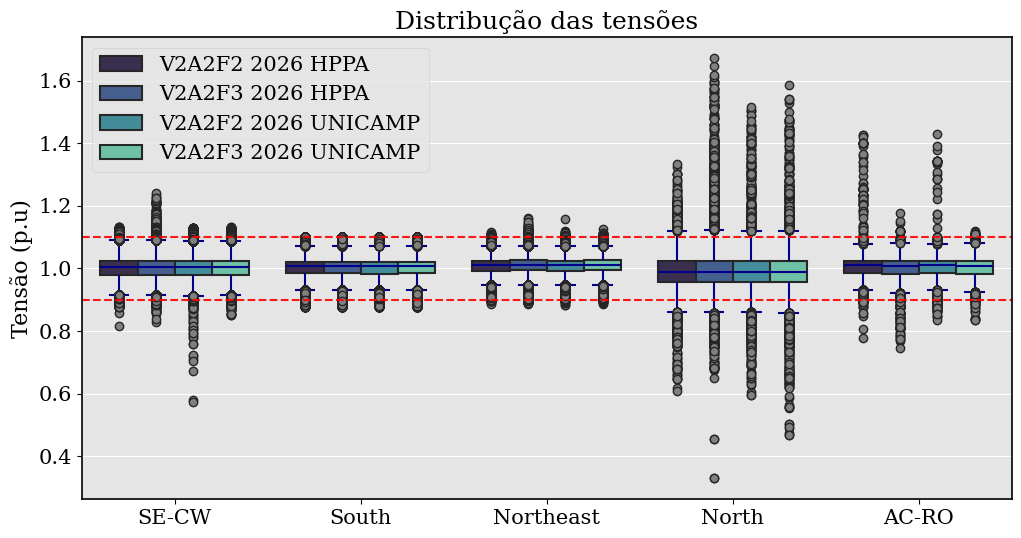

In [24]:
# boxplot_voltage(df_complete[df_complete['Cenario'].isin(['V2A2F5 2026 HPPA','V2A2F5 2026 UNICAMP'])], clase = "REG", titulo = 'Distribução das tensões', xlbl = '')
# boxplot_voltage(df_filt_nt[df_filt_nt['Cenario'].isin(['V2A2F2 2026','V2A2F5 2026'])], clase = "VBASEKV", titulo = 'Distribução das tensões - P.O. Inseguro', xlbl = 'kV')

boxplot_voltage(df_complete, clase = "REG", titulo = 'Distribução das tensões', xlbl = '')
# boxplot_voltage(df_filt_nt, clase = "VBASEKV", titulo = 'Distribução das tensões', xlbl = 'kV')
# boxplot_voltage(df_filt_ger, clase = "Gen_Type", titulo = 'Distribução das tensões', xlbl = 'kV')

In [25]:
print('O numero de pontos Inseguros com Violação de tensão são: ', mask_inseguros.shape[0])

O numero de pontos Inseguros com Violação de tensão são:  5327


In [26]:
df_ger[(df_ger['MODV_PU']<0.8) & (df_ger['Gen_Type']=='UHE')]['key'].unique()

array(['D_2_H_12-30', 'D_16_H_00-30', 'D_16_H_15-00', 'D_16_H_15-30',
       'D_23_H_06-30', 'D_2_H_08-30', 'D_2_H_10-00', 'D_16_H_01-00',
       'D_23_H_06-00', 'D_23_H_22-00', 'D_23_H_11-30', 'D_16_H_14-30',
       'D_16_H_02-30', 'D_23_H_15-00', 'D_16_H_09-30', 'D_16_H_13-30',
       'D_16_H_12-30', 'D_9_H_00-30', 'D_9_H_03-30', 'D_23_H_13-30'],
      dtype=object)

In [27]:
df_nt[(df_nt['MODV_PU']<0.8) & (df_nt['VBASEKV']==500)]['key'].unique()

array(['D_9_H_02-30', 'D_9_H_03-30', 'D_9_H_04-30', 'D_9_H_16-30',
       'D_9_H_22-30', 'D_16_H_03-30', 'D_16_H_09-00', 'D_16_H_11-00',
       'D_16_H_12-30', 'D_16_H_16-00', 'D_16_H_16-30', 'D_16_H_15-30',
       'D_16_H_02-30', 'D_23_H_23-30', 'D_9_H_01-00', 'D_9_H_23-00',
       'D_16_H_08-00', 'D_16_H_10-00', 'D_16_H_12-00', 'D_16_H_23-00',
       'D_23_H_00-00', 'D_23_H_17-00', 'D_23_H_17-30', 'D_23_H_02-00',
       'D_2_H_12-30', 'D_16_H_00-00', 'D_16_H_01-30', 'D_16_H_06-00',
       'D_9_H_02-00', 'D_16_H_00-30', 'D_9_H_00-00', 'D_9_H_00-30',
       'D_9_H_01-30', 'D_9_H_05-00', 'D_9_H_05-30', 'D_16_H_06-30',
       'D_16_H_09-30', 'D_23_H_08-30', 'D_23_H_14-00', 'D_23_H_16-00',
       'D_23_H_23-00', 'D_23_H_13-30', 'D_16_H_04-30'], dtype=object)

In [28]:
# reg = 'SE-CW'
# tg = 500
# voltage_lev = df_nt[(df_nt['REG']==reg)]['VBASEKV'].unique()
# print(voltage_lev)
# total = df_nt[(df_nt['REG']==reg)].groupby(by=['VBASEKV','BUS_ID']).count().loc[tg].shape[0]
# # vvbuses = df_filt_nt[(df_filt_nt['MODV_PU']>1.10) & (df_filt_nt['REG']==reg) & (df_filt_nt['Cenario'] == 'V2A2F5 2026')].groupby(by=['VBASEKV','BUS_ID']).count().loc[tg].shape[0]
# vvbuses = df_filt_nt[(df_filt_nt['MODV_PU']<0.9) & (df_filt_nt['REG']==reg)].groupby(by=['VBASEKV','BUS_ID']).count().loc[tg].shape[0]
# print(total)
# print(vvbuses)
# print(vvbuses/total*100)
# # # ===============================================================================================
# tg = 'UHE'
# voltage_lev = df_ger[(df_ger['REG']==reg)]['Gen_Type'].unique()
# print(voltage_lev)
# total = df_ger[(df_ger['REG']==reg)].groupby(by=['Gen_Type','BUS_ID']).count().loc[tg].shape[0]
# vvbuses = df_filt_ger[(df_filt_ger['MODV_PU']<0.9) & (df_filt_ger['REG']==reg)].groupby(by=['Gen_Type','BUS_ID']).count().loc[tg].shape[0]

# print(total)
# print(vvbuses)
# print(vvbuses/total*100)

## Read Voltage Stability Data and see the electrical features

In [29]:
# CDVInst = ['D_11_H_02-00',
#             'D_12_H_11-00',
#             'D_12_H_16-30',
#             'D_15_H_09-30',
#             'D_21_H_00-30',
#             'D_5_H_11-00',
#             'D_9_H_15-30'
#             ]

CDVInst = pd.read_csv('C:/Users/david/OneDrive/Documents/FERV_documentos/critical_code4_10.csv')['OP'].values
# filtro = dfs['Index_PO'][0][['Dia','Hora']].apply(tuple, axis=1).isin(CDVInst)

filtro1 = (df_ger['key'].isin(CDVInst))
df_ger.loc[filtro1,'Estb. Angular'] = 'Criticos'
df_ger.loc[~filtro1,'Estb. Angular'] = 'Normais'
df_filt_ger_inst = df_ger[filtro1]
filtro2 = (df_nt['key'].isin(CDVInst))
df_nt.loc[filtro2,'Estb. Angular'] = 'Criticos'
df_nt.loc[~filtro2,'Estb. Angular'] = 'Normais'
df_filt_nt_inst = df_nt[filtro2]

# df_complete_inst = pd.concat([df_filt_ger_inst, df_filt_nt_inst], axis=0)
# boxplot_voltage(df_complete_inst[df_complete_inst['Cenario']=='V2A2F2 Scenario 2026'], clase = "REG", titulo = 'Distribução das tensões', xlbl = 'Region')

In [30]:
# boxplot_(df_ger[df_ger['Cenario']=='V2A2F2 Scenario 2026'],'MODV_PU', clase = "Gen_Type", hue='Estb. Angular', titulo = 'Barras Geração SIN', xlbl = 'Type of Generation',ylbl ='p.u')
# boxplot_(df_ger[df_ger['Cenario']=='V2A2F2 Scenario 2026'],'MODV_PU', clase = "REG", hue='Estb. Angular', titulo = 'Barras Geração SIN', xlbl = 'Região',ylbl ='p.u')

# boxplot_(df_ger[df_ger['Cenario']=='V2A2F2 Scenario 2026'],'PG_MW', clase = "Gen_Type", hue='Estb. Angular', titulo = 'Barras Geração SIN', xlbl = 'Type of Generation',ylbl ='(MW)',ylim=[-10,500])
# boxplot_(df_ger[df_ger['Cenario']=='V2A2F2 Scenario 2026'],'PG_MW', clase = "REG", hue='Estb. Angular', titulo = 'Barras Geração SIN', xlbl = 'Região',ylbl ='(MW)',ylim=[-10,300])

# boxplot_(df_ger[df_ger['Cenario']=='V2A2F2 Scenario 2026'],'QG_MVAR', clase = "Gen_Type", hue='Estb. Angular', titulo = 'Barras Geração SIN', xlbl = 'Type of Generation',ylbl ='(MVAR)',ylim=[-100,100])
# boxplot_(df_ger[df_ger['Cenario']=='V2A2F2 Scenario 2026'],'QG_MVAR', clase = "REG", hue='Estb. Angular', titulo = 'Barras Geração SIN', xlbl = 'Região',ylbl ='(MVAR)',ylim=[-100,100])

In [31]:
# boxplot_voltage(df_filt_ger_inst[df_filt_ger_inst['Cenario']=='V2A2F2 Scenario 2026'], clase = "Gen_Type", titulo = 'Distribução das tensões Barras Geração SIN', xlbl = 'Type of Generation')
# boxplot_voltage(df_filt_ger_inst[df_filt_ger_inst['Cenario']=='V2A2F2 Scenario 2026'], clase = "REG", titulo = 'Distribução das tensões Barras Geração SIN', xlbl = 'Região')

# boxplot_(df_filt_ger_inst[df_filt_ger_inst['Cenario']=='V2A2F2 Scenario 2026'],'PG_MW', clase = "Gen_Type", titulo = 'Barras Geração SIN', xlbl = 'Type of Generation',ylbl ='(MVW)',ylim=[-10,600])
# boxplot_(df_filt_ger_inst[df_filt_ger_inst['Cenario']=='V2A2F2 Scenario 2026'],'PG_MW' ,clase = "REG", titulo = 'Barras Geração SIN', xlbl = 'Região',ylbl ='(MVW)',ylim=[-10,600])

# boxplot_(df_filt_ger_inst[df_filt_ger_inst['Cenario']=='V2A2F2 Scenario 2026'],'QG_MVAR', clase = "Gen_Type", titulo = 'Barras Geração SIN', xlbl = 'Type of Generation',ylbl ='(MVAR)',ylim=[-200,200])
# boxplot_(df_filt_ger_inst[df_filt_ger_inst['Cenario']=='V2A2F2 Scenario 2026'],'QG_MVAR' ,clase = "REG", titulo = 'Barras Geração SIN', xlbl = 'Região',ylbl ='(MVAR)',ylim=[-200,200])

# boxplot_(df_filt_ger_inst[df_filt_ger_inst['Cenario']=='V2A2F2 Scenario 2026'],'ANGV_DEG', clase = "Gen_Type", titulo = 'Barras Geração SIN', xlbl = 'Type of Generation',ylbl ='Desvio Ang º',ylim=[-200,200])
# boxplot_(df_filt_ger_inst[df_filt_ger_inst['Cenario']=='V2A2F2 Scenario 2026'],'ANGV_DEG' ,clase = "REG", titulo = 'Barras Geração SIN', xlbl = 'Região',ylbl ='Desvio Ang º',ylim=[-200,200])


In [32]:
# dicusinas = {
#     'Jirau': [7051, 7061],
#     'S_Antonio': [7050, 7062, 7064],
#     'UHE_ACRO_230': [6888, 6892, 6891],
#     'Tucurui': [6419, 6420, 6422, 6424, 6425],
#     'B_Monte': [6729],
#     'Itaipu_50': [1100],
#     'Itaipu_60': [1107],
#     'I_Solt': [501],
#     'Angra I': [10],
#     'Angra II': [11],
#     'TPires': [4492],
#     'S_Mesa': [36],
#     'XINGO':[5061],
#     'Furnas' : [16]
# }

# variable = [('MODV_PU','Tensão (p.u)',0.90,1.10), ('PG_MW','(MW)',0, 0), ('QG_MVAR', 'MVAR',0, 0), (' Reserve','MW',0,0)]
# # Assuming 'dicusinas' and 'variable' are defined somewhere in your code
# for us, buses in dicusinas.items():
#     fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
#     for idx, (var, ylbl, lim1, lim2) in enumerate(variable):
#         ax = axes[idx]  # Get the current subplot
#         sns.boxplot(
#             data=df_ger[(df_ger['Cenario'] == 'V2A2F2 Scenario 2026') & (df_ger['BUS_ID'].isin(buses))],
#             x='Estb. Angular', y=var, hue='Estb. Angular', width=.9, linewidth=1, gap=.1, fill=False, ax=ax
#         )
#         ax.set_xlabel(us, fontsize=10)
#         ax.set_ylabel(ylbl, fontsize=10)
#         ax.tick_params(axis='both', labelsize=8)
#         ax.axhline(lim2, color='red', linestyle='--', alpha=0.9)
#         ax.axhline(lim1, color='red', linestyle='--', alpha=0.9)

#     plt.savefig(f'Analises Pontos Inestaveis/{us}_combined_plot.jpg')  # Save the combined plot
#     plt.show()  # Show the plot

### Index Correlation with Voltage Instability box plot

In [33]:
# filtro1 = DATA['df_DPI'].index.get_level_values('key').isin(CDVInst)
# DATA['df_DPI'].loc[filtro1,'Estb. Angular'] = 'Criticos'
# DATA['df_DPI'].loc[~filtro1,'Estb. Angular'] = 'Normais'

# dataindexS1 = pd.melt(DATA['df_DPI'].loc[:,:,:,'V2A2F2 Scenario 2026'], id_vars=['Estb. Angular'], value_vars=DATA['df_DPI'].columns[30:])

# columns = ['DPI_inf_AC-RO_PCH', 'DPI_sup_AC-RO_PCH', 'DPI_inf_AC-RO_SIN',
#        'DPI_sup_AC-RO_SIN', 'DPI_inf_AC-RO_UHE', 'DPI_sup_AC-RO_UHE',
#        'DPI_inf_AC-RO_UTE', 'DPI_sup_AC-RO_UTE']

# boxplot_(dataindexS1[dataindexS1['variable'].isin(columns)],'value', clase = "variable", hue='Estb. Angular', titulo = 'Indice de Violação de tensão', xlbl = 'Indice',ylbl ='p.u')
# columns = ['DPI_inf_North_EOL',
#        'DPI_sup_North_EOL', 'DPI_inf_North_SIN', 'DPI_sup_North_SIN',
#        'DPI_inf_North_UFV', 'DPI_sup_North_UFV', 'DPI_inf_North_UHE',
#        'DPI_sup_North_UHE', 'DPI_inf_North_UTE', 'DPI_sup_North_UTE',]

# boxplot_(dataindexS1[dataindexS1['variable'].isin(columns)],'value', clase = "variable", hue='Estb. Angular', titulo = 'Indice de Violação de tensão', xlbl = 'Indice',ylbl ='p.u')
# columns = ['DPI_inf_Northeast_EOL', 'DPI_sup_Northeast_EOL',
#        'DPI_inf_Northeast_SIN', 'DPI_sup_Northeast_SIN',
#        'DPI_inf_Northeast_UFV', 'DPI_sup_Northeast_UFV',
#        'DPI_inf_Northeast_UHE', 'DPI_sup_Northeast_UHE',
#        'DPI_inf_Northeast_UTE', 'DPI_sup_Northeast_UTE']

# boxplot_(dataindexS1[dataindexS1['variable'].isin(columns)],'value', clase = "variable", hue='Estb. Angular', titulo = 'Indice de Violação de tensão', xlbl = 'Indice',ylbl ='p.u')
# columns = ['DPI_inf_SE-CW_BIO',
#        'DPI_sup_SE-CW_BIO', 'DPI_inf_SE-CW_EOL', 'DPI_sup_SE-CW_EOL',
#        'DPI_inf_SE-CW_PCH', 'DPI_sup_SE-CW_PCH', 'DPI_inf_SE-CW_SIN',
#        'DPI_sup_SE-CW_SIN', 'DPI_inf_SE-CW_UFV', 'DPI_sup_SE-CW_UFV',
#        'DPI_inf_SE-CW_UHE', 'DPI_sup_SE-CW_UHE', 'DPI_inf_SE-CW_UTE',
#        'DPI_sup_SE-CW_UTE']

# boxplot_(dataindexS1[dataindexS1['variable'].isin(columns)],'value', clase = "variable", hue='Estb. Angular', titulo = 'Indice de Violação de tensão', xlbl = 'Indice',ylbl ='p.u')
# columns = ['DPI_inf_South_BIO', 'DPI_sup_South_BIO',
#        'DPI_inf_South_EOL', 'DPI_sup_South_EOL', 'DPI_inf_South_PCH',
#        'DPI_sup_South_PCH', 'DPI_inf_South_SIN', 'DPI_sup_South_SIN',
#        'DPI_inf_South_UHE', 'DPI_sup_South_UHE', 'DPI_inf_South_UTE',
#        'DPI_sup_South_UTE']

# boxplot_(dataindexS1[dataindexS1['variable'].isin(columns)],'value', clase = "variable", hue='Estb. Angular', titulo = 'Indice de Violação de tensão', xlbl = 'Indice',ylbl ='p.u')

# Analise Indice 2

In [34]:
def indice_reativo (df, tg, pinf: bool):
    df = df.copy()
    if pinf:
        pass
    else:
        n=2
        if tg == 'Gen_Type':
            df['Ind_Qmin'] = df['ReservaIND'] ** (2 * n)
            df['Ind_Qmax'] = df['ReservaCAP'] ** (2 * n)
            df1 = df.groupby(['key','Dia', 'Hora', 'Cenario', 'REG', tg]).agg({'Ind_Qmin': 'sum', 'Ind_Qmax': 'sum'})
            df1['Qmin_norm'] = df1['Ind_Qmin']**(1 / (2 * n))
            df1['Qmax_norm'] = df1['Ind_Qmax']**(1 / (2 * n))
        else:
            df['Ind_Qmin'] = df['ReservaINDshunt'] ** (2 * n)
            df['Ind_Qmax'] = df['ReservaCAPshunt'] ** (2 * n)
            df1 = df.groupby(['key','Dia', 'Hora', 'Cenario', 'REG', tg]).agg({'Ind_Qmin': 'sum', 'Ind_Qmax': 'sum'})
            df1['Qmin_norm'] = df1['Ind_Qmin']**(1 / (2 * n))
            df1['Qmax_norm'] = df1['Ind_Qmax']**(1 / (2 * n))  
        
    return df1[['Qmin_norm', 'Qmax_norm']]

dfqind1 = indice_reativo(df_filt_ger,'Gen_Type',False)
dfqind2 = indice_reativo(df_filt_nt,'VBASEKV',False)
DATA['df_Qind'] = pd.concat([flatdf(dfqind2, 'VBASEKV'), flatdf(dfqind1, 'Gen_Type')], axis=1)

In [35]:
def separaFERV_Load(df, condition, Load = False ):
    if Load == False:
        dff = df.reset_index().merge(DF_complete_PO[['PG_FERV']], on=['Dia', 'Hora', 'Cenario'], how='left')
        dff = dff[(dff['PG_FERV'] > condition[0]) & (dff['PG_FERV'] <= condition[1])].set_index(['Dia', 'Hora', 'Cenario','REG'])
    else:
        dff = df.reset_index().merge(DF_complete_PO[['PL_MW']], on=['Dia', 'Hora', 'Cenario'], how='left')
        dff = dff[(dff['PL_MW_y'] > condition[0]) & (dff['PL_MW_y'] <= condition[1])].set_index(['Dia', 'Hora', 'Cenario','REG'])   
        dff = dff.drop(columns='PL_MW_y').rename(columns={'PL_MW_x':'PL_MW'})  
    return dff

def reorder_and_filter(df, cenario, region, columns):
    df = df.reorder_levels(['Dia', 'Hora', 'Cenario', 'REG'])[columns]
    if cenario == 'all':
        if region == 'all':
            df_reordered = df
        elif region == 'PO':
            df_reordered = df
        else:
            df_reordered = df.loc[:, :, :, region]
    else:
        if region == 'all':
            df_reordered = df.loc[:, :, cenario, :]
        elif region == 'PO':
            df_reordered = df.loc[:, :, cenario]
        else:
            df_reordered = df.loc[:, :, cenario, region]
    return df_reordered

def set_column_names(datapd, df_reordered_sorted, region):
    if region == 'all':
        columns = []
        for reg in df_reordered_sorted.reset_index('REG')['REG'].unique():
            for column in df_reordered_sorted.columns:
                name = column + '_' + reg
                columns.append(str(name))
        datapd.columns = columns
    return datapd

def merge_data(datapd, df, cenario, key):
    if cenario == 'all':
        return datapd.merge(df, on=['Dia', 'Hora', 'Cenario'], how='left')
    if isinstance(cenario, list):
        return datapd.merge(df.loc[:, :, cenario], on=['Dia', 'Hora', 'Cenario'], how='left')
    return datapd.merge(df.loc[:, :, cenario], on=['Dia', 'Hora'], how='left')

def flatdataframe(df_data_completo, cenario, region, columns, ACDCflux=True, Reserva=False, IndiceGroup=False, DPI=False, InfoPO=False, PImva_reg_nt=False, PImva=False, Busfeatures = False, Vanalysis = None,Linefeatures = False, Q_indice = False):
    """
    Flattens the provided dataframe based on the specified filters and parameters.

    Parameters:
    df_data_completo (pd.DataFrame): The complete dataframe to be flattened.
    cenario (str or list): The scenario to filter by.
    region (str): The region to filter by.
    columns (list): The columns to include in the flattened dataframe.
    ACDCflux (bool): Include AC/DC flux data.
    Reserva (bool): Include reserve data.
    IndiceGroup (bool): Include index group data.
    DPI (bool): Include DPI data.
    InfoPO (bool): Include PO info.
    PImva_reg_nt (bool): Include PImva region NT data.
    PImva (bool): Include PImva data.

    Returns:
    pd.DataFrame: The flattened dataframe.
    """
    df_reordered_sorted = reorder_and_filter(df_data_completo, cenario, region, columns)

    if region == 'all' and cenario == 'all':
        lista = [[index[0], index[1], index[2]] for index in df_reordered_sorted.index]
        conjunto_filtros = set(map(tuple, lista))
        conjunto_filtros = tuple(sorted(conjunto_filtros))
        data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]
        datapd = pd.DataFrame(data, index=conjunto_filtros)
    else:
        datapd = df_reordered_sorted

    datapd = set_column_names(datapd, df_reordered_sorted, region)

    if cenario == 'all':
        datapd.index.set_names(['Dia', 'Hora', 'Cenario'], inplace=True)
    else:
        if isinstance(cenario, list):
            if region == 'all':
                datapd.index.set_names(['Dia', 'Hora', 'Cenario'], inplace=True)
            else:
                datapd.index.set_names(['Dia', 'Hora', 'Cenario', 'REG'], inplace=True)
        else:
            datapd.index.set_names(['Dia', 'Hora'], inplace=True)

    if ACDCflux:
        datapd = merge_data(datapd, DATA['df_Inter_AC_DC'], cenario, 'AC_DC')
    if Reserva:
        datapd = merge_data(datapd, DATA['df_reserva'][[' Reserve']], cenario, 'Reserva')
    if IndiceGroup:
        datapd = merge_data(datapd, DATA['df_indice_group'], cenario, 'IndiceGroup')
    if DPI:
        datapd = merge_data(datapd, DATA['df_DPI'], cenario, 'DPI')
    # if PImva:
    #     datapd = merge_data(datapd, dfl_po[['PI_mva', 'PFI']], cenario, 'PImva')
    # if PImva_reg_nt:
    #     dff = flatdf(dfl_r_nt[['PI_mva', 'PFI']], 'VBASEKV')
    #     datapd = merge_data(datapd, dff, cenario, 'PImva_reg_nt')
    if Q_indice:
        datapd = merge_data(datapd, DATA['df_Qind'], cenario, 'df_Qind')
    if InfoPO:
        column = ['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper', 'PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR', 'Shunt_Ind', 'Shunt_Cap', 'SHUNT_INST_IND',
                    'SHUNT_INST_CAP', 'ReservaIND', 'ReservaCAP', 'PG_BIO', 'PG_Dist', 'QG/QL', 'PG/PL', 'ReservaINDshunt', 'ReservaCAPshunt']
        dfPO = DF_complete_PO.drop(columns=column)
        datapd = merge_data(datapd, dfPO, cenario, 'InfoPO')
    if Busfeatures:
        if Vanalysis == 'OV':
            df_aux = DATA['features_sup_pv_df'].merge(DATA['features_sup_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
            datapd = merge_data(datapd, df_aux, cenario, 'features_sup')
            # datapd = merge_data(datapd, DATA['features_sup_pv_df'], cenario, 'features_sup').set_index(['Dia', 'Hora', 'Cenario'])
            # datapd = merge_data(datapd, DATA['features_sup_pq_df'], cenario, 'features_sup').set_index(['Dia', 'Hora', 'Cenario'])
        elif Vanalysis == 'UV':
            df_aux = DATA['features_inf_pv_df'].merge(DATA['features_inf_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
            datapd = merge_data(datapd, df_aux, cenario, 'features_inf')
            # datapd = merge_data(datapd, DATA['features_inf_pv_df'], cenario, 'features_inf').set_index(['Dia', 'Hora', 'Cenario'])
            # datapd = merge_data(datapd, DATA['features_inf_pq_df'], cenario, 'features_inf').set_index(['Dia', 'Hora', 'Cenario'])
    if Linefeatures:
        datapd = merge_data(datapd, DATA['features_lines'], cenario, 'features_lines').set_index(['Dia', 'Hora', 'Cenario'])

    datapd.columns = datapd.columns.astype(str)
    return datapd

In [36]:
'''
============ Geração RO ================
6822: (PBUEN2PCH138) SISTEMA 138KV
6831: (ROND2-UHE003) SISTEMA 138KV
6832: (ROND2-UTE000) SISTEMA 138KV (TERMICA SEM DADOS DE GERADOR)

6888 (SA-AD1UHE003) - SISTEMA 230KV
6892 (SA-AD2UHE003) - SISTEMA 230KV
6891 (SAMU1-UHE005) - SISTEMA 230KV

6911 (T.NOR1UTE000) - SISTEMA 230KV (TERMICA SEM DADOS DE GERADOR)
6912 (T.N2-GUTE000) - SISTEMA 230KV
6913 (T.N2-VUTE000) - SISTEMA 230KV
============ COMP. SYN ================
ARIQU-SIN001
JIPAR-SIN001
============= Mostra quantas barras Com Violação tem em cada Região ==========

# df_complete[df_complete['MODV_PU']>1.10].groupby(['REG'])['BUS_ID'].unique()
# df_complete[df_complete['MODV_PU']< 0.90].groupby(['REG'])['BUS_ID'].unique()['AC-RO'].shape

#EL FLUJO DE POTENCIA REACTIVA VA DE LA MAIOR TENSIOHN A ALA MENOR TENSION
#El flujo de potencia va de la barra con angulo mas adelantado a la barra con angulo mas atrado

'''

"\n============ Geração RO ================\n6822: (PBUEN2PCH138) SISTEMA 138KV\n6831: (ROND2-UHE003) SISTEMA 138KV\n6832: (ROND2-UTE000) SISTEMA 138KV (TERMICA SEM DADOS DE GERADOR)\n\n6888 (SA-AD1UHE003) - SISTEMA 230KV\n6892 (SA-AD2UHE003) - SISTEMA 230KV\n6891 (SAMU1-UHE005) - SISTEMA 230KV\n\n6911 (T.NOR1UTE000) - SISTEMA 230KV (TERMICA SEM DADOS DE GERADOR)\n6912 (T.N2-GUTE000) - SISTEMA 230KV\n6913 (T.N2-VUTE000) - SISTEMA 230KV\n============ COMP. SYN ================\nARIQU-SIN001\nJIPAR-SIN001\n============= Mostra quantas barras Com Violação tem em cada Região ==========\n\n# df_complete[df_complete['MODV_PU']>1.10].groupby(['REG'])['BUS_ID'].unique()\n# df_complete[df_complete['MODV_PU']< 0.90].groupby(['REG'])['BUS_ID'].unique()['AC-RO'].shape\n\n#EL FLUJO DE POTENCIA REACTIVA VA DE LA MAIOR TENSIOHN A ALA MENOR TENSION\n#El flujo de potencia va de la barra con angulo mas adelantado a la barra con angulo mas atrado\n\n"

In [37]:
def plot_potencia_perfil_2(df_resultado, df_data, column1, column2, ylabel = '(MW)', ylabelrigth = '(P.U)', ylim=None, ylim2=None, markers=True):

    df = df_resultado.merge(df_data, on=['Dia','Hora', 'Cenario'], how='left')
    plt.figure(figsize=(20, 5))
    ax1 = plt.gca()  # get current axes
    for col in column1:
        sns.lineplot(data=df, x='Dia_Hora', y=col, ax=ax1, color='blue', label = col)
        # sns.lineplot(data=df, x='Dia_Hora', y=column1, hue='Cenario', style='Cenario', markers=markers, label = column1)
        
    plt.ylabel(ylabelrigth, fontsize=15)
    value = int(df['Dia_Hora'].unique().shape[0] / 28)
    selected_ticks = df[df['Cenario'] == df['Cenario'].unique()[0]].iloc[::value]['Dia_Hora']
    plt.xlabel('(Dia, Hora)', fontsize=15)
    plt.xticks(selected_ticks, rotation=45, fontsize=12)
    plt.tick_params(axis='y', labelsize=12)
    plt.legend(loc='upper left', fontsize=12)
    # plt.grid(alpha = 1)
    if ylim is not None:
        plt.ylim(ylim)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    for col in column2:
        sns.lineplot(data=df, x='Dia_Hora', y=col, ax=ax2, label = col)  
        # sns.lineplot(data=df, x='Dia_Hora', y=col, ax=ax2, palette="hls", label = col)  
    # sns.lineplot(data=df, x='Dia_Hora', y=column2, hue='Cenario', style='Cenario', markers=markers, label = column2)
    ax2.set_ylabel(ylabel, fontsize=15)  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(visible=False)
    if ylim2 is not None:
        plt.ylim(ylim2)

    plt.tight_layout()
    plt.show()

In [38]:
# eloFozibiuna = [85, 86]
# eloPVelArarq = [7055, 7057]
# eloCPVbtbPvel = [7059, 7054]
# eloXinguTR = [8100, 9605]
# eloXinguESTR = [8100, 3010]
# Jirau = [7051, 7061]
# S_Antonio = [7050, 7062, 7064]
# S_Antontonio_ACRO = [6888, 6892, 6891]
# df_complete_t = pd.concat([df_nt, df_ger], axis=0)
# dic_cenarios.keys()

# # ====================================================================================
# # Analise Especifico por Região e grupo de barramentos, escolher o cenario de Analise a Região e as barras a analisar
# target_scenario = 'V1A1F3 Scenario 2026'
# region_ = 'AC-RO'
# buses = eloCPVbtbPvel 
# var = 'B0_MVAR'

# if buses != None:
#     dff_5 = df_complete_t[df_complete_t['BUS_ID'].isin(buses)].groupby(by=['Dia','Hora','Cenario'])[[var]].sum().merge(DATA['df_indice_group'], on=['Dia', 'Hora', 'Cenario'], how='left')
# elif buses == None:
#     dff_5 = df_complete_t.groupby(by=['Dia','Hora','Cenario'])[[var]].sum().merge(DATA['df_indice_group'], on=['Dia', 'Hora', 'Cenario'], how='left')

# DFF5 = dff_5.reset_index()

# plot_potencia_perfil_2(df_mask, DFF5[DFF5['Cenario']==target_scenario], ['PQ_upper'],[var],'(MVAR)', markers=False,)
# plot_potencia_perfil_2(df_mask, DFF5[DFF5['Cenario']==target_scenario], ['PV_upper'],[var],'(MVAR)', markers=False,)


In [39]:
cenario = 'all'
region = 'all'

columns2 = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV', 'PL_MW','PG_MW','QL_MVAR','QG_MVAR','PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL', 'Mvar:Losses_500down','Mvar:Losses_500up','% L1_500up','% L1_500down','Shunt_Ind', 'Shunt_Cap','key','ReservaIND', 'ReservaCAP']
# columns2 = ['key','PL_MW','PG_MW','QL_MVAR','QG_MVAR','PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL', 'Mvar:Losses_500down','Mvar:Losses_500up','% L1_500up','% L1_500down','Shunt_Ind', 'Shunt_Cap']

# insecure_indices = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] > 0).any(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

insecure_indices = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] > 0.2).any(axis=1)]
insecure_indices = insecure_indices.loc[(insecure_indices[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] <= 1).all(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

filtro = Df_data_completo_reg.index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(insecure_indices)
dfanalise = Df_data_completo_reg[filtro]
dfanalise = flatdataframe(dfanalise, cenario, region, columns2, ACDCflux=True, Reserva=True, DPI=True, IndiceGroup=False, InfoPO=True, PImva_reg_nt=False, PImva=False, Busfeatures=False,Vanalysis='OV', Linefeatures=False, Q_indice=True)
dfanalise.shape

C:\Users\David\AppData\Local\Temp\ipykernel_41356\843108369.py:72: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]


(5157, 330)

### Determinar porcetagem de pontos de operação em alarme em cada região.

In [40]:
dfanalise[dfanalise['OV DPI_PV_SE-CW']>0.2].shape[0]/insecure_indices.shape[0]*100

0.42660461508629044

## Analise Indice 2.1

In [41]:
def scatterplot_1(df, v1, v2, xlbl, ylbl, lbl_bar = None , v3 = None, xlimites = None, ylimites = None, title = None, vline = False, hline = False):

    cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
    plt.figure(figsize=(10, 6))
    if v3 == None:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, s=60, legend=None)
    else:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, palette=cmap, hue=v3, s=60, legend=None)
        norm = mcolors.Normalize(vmin=df[v3].min(), vmax=df[v3].max())
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=scatter, orientation='vertical', label= lbl_bar,)
        # Set color bar tick labels to black
        cbar.ax.yaxis.set_tick_params(color='black',labelsize=12)
        plt.setp(cbar.ax.get_yticklabels(), color='black')
        # Set the color and size of the color bar legend label
        cbar.set_label(lbl_bar, fontsize=15, color='black')

    # plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    nometitulo = title
    plt.title(nometitulo, fontsize = 15)
    plt.xlabel(xlbl, fontsize = 17, color ='black')
    plt.legend(fontsize = 15, loc='upper left')
    plt.ylabel(ylbl, fontsize = 17, color ='black')
    if hline:
        plt.axhline(1, color='red', linestyle='--', alpha=0.9)
    if vline:
        plt.axvline(1, color='red', linestyle='--', alpha=0.9)
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')
    plt.tick_params(axis='x', colors='black',labelsize=15, rotation = 0)  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    if xlimites != None:
        plt.xlim(xlimites)
    if ylimites != None:
        plt.ylim(ylimites)
    # if namedir != None:
        # nome = folderimg+'Correlações/' + namedir + nometitulo + '.svg'
        # # plt.savefig(nome)
        # nome = folderimg+'Correlações/' + namedir + nometitulo + '.png'
        # # plt.savefig(nome)
    plt.show()

    correlation = df[v1].corr(df[v2])
    print(f"Indice de Correlación: {correlation}")
    
# scatterplot(dfanalise, 'Mvar:Losses_500down_North', 'UV DPI_PV_North', 'B_Monte_MW')
# scatterplot(dfanalise, 'Elo_XINGU-SE', 'UV DPI_PV_North', 'Mvar:Losses_500down_North')
# scatterplot(dfanalise, 'Mvar:Losses_500up_South', 'UV DPI_PV_SE-CW', 'QL_MVAR_SE-CW')
# scatterplot(dfanalise, 'QL_MVAR_North', 'UV DPI_PV_SE-CW', 'PL_MW_SE-CW')

# scatterplot_1(dfanalise, 'Fluxo_NE-SE','OV DPI_PV_North',)
# scatterplot_1(dfanalise, '% L1_500down_Northeast','OV DPI_PV_Northeast', 'Mvar:Losses_500down_Northeast')

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


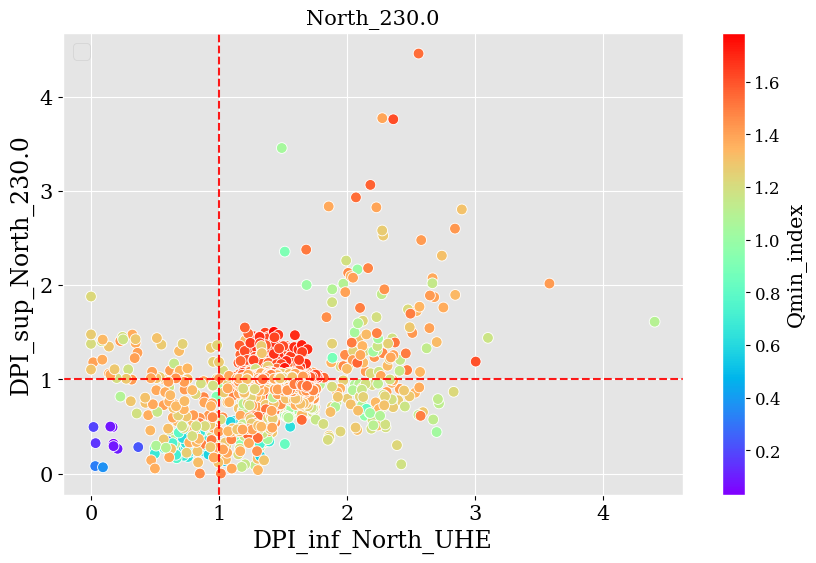

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.2372948610261615


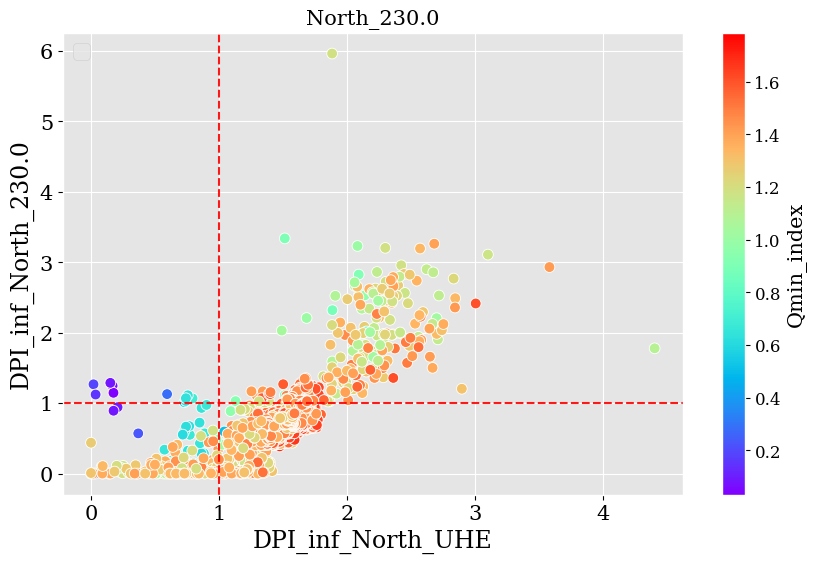

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.7656685829652755


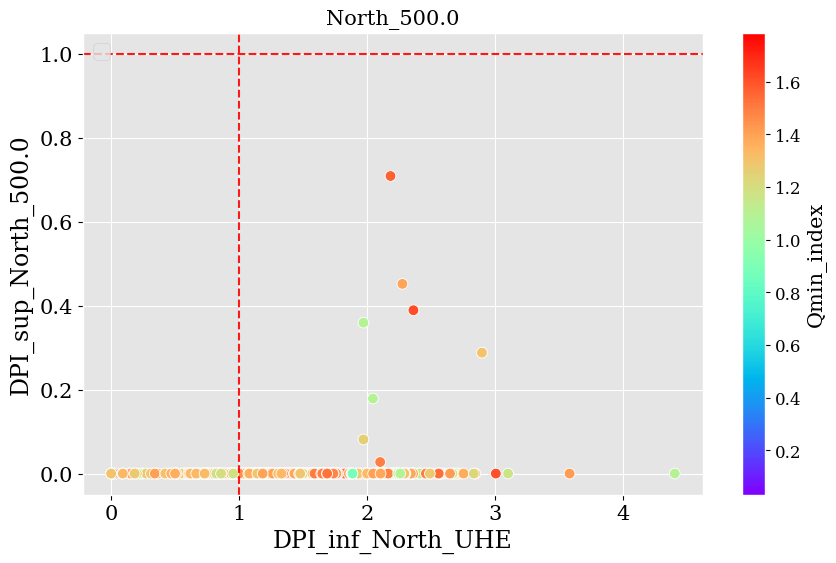

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.09581222338234946


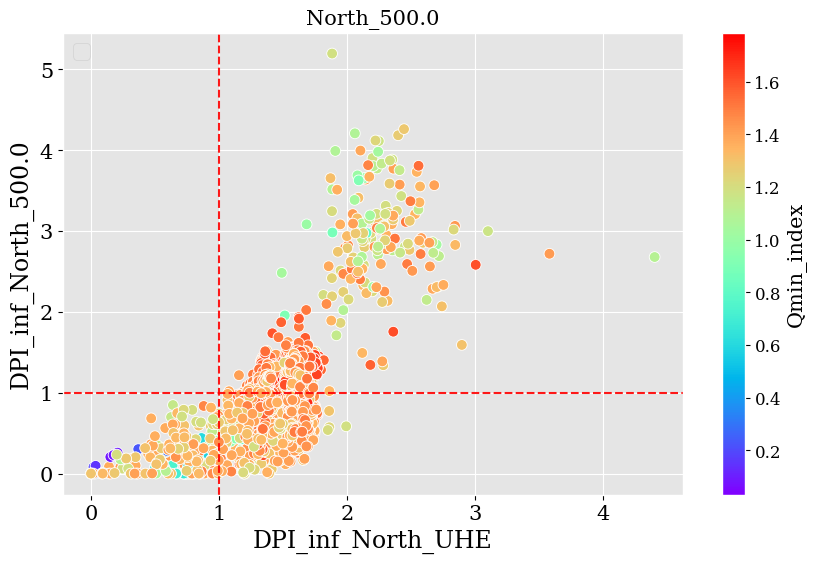

Indice de Correlación: 0.638112785564661


In [42]:
Region = 'North'
gengroups = ['UHE']
grupos = set([word.replace('Qmin_norm_', '').replace('Qmax_norm_', '') for word in DATA['df_Qind'].columns])
for j in gengroups:
    for i in grupos:
        textaux = Region + '_' + j
        if textaux in i:
            # scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_sup_{textaux}',xlbl='DPI_inf', ylbl = 'DPI_sup',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=textaux)
            # scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_sup_{textaux}',xlbl='DPI_inf', ylbl = 'DPI_sup',lbl_bar= 'Qmax_index', v3=f'Qmax_norm_{textaux}', vline=True, hline=True , title=textaux)

            scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_sup_{Region}_230.0',xlbl=f'DPI_inf_{textaux}', ylbl = f'DPI_sup_{Region}_230.0',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=f'{Region}_230.0')
            scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_inf_{Region}_230.0',xlbl=f'DPI_inf_{textaux}', ylbl = f'DPI_inf_{Region}_230.0',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=f'{Region}_230.0')

            scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_sup_{Region}_500.0',xlbl=f'DPI_inf_{textaux}', ylbl = f'DPI_sup_{Region}_500.0',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=f'{Region}_500.0')
            scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_inf_{Region}_500.0',xlbl=f'DPI_inf_{textaux}', ylbl = f'DPI_inf_{Region}_500.0',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=f'{Region}_500.0')

            # scatterplot_1(dfanalise, f'PL_MW_{Region}',f'DPI_sup_{textaux}',xlbl='MW Load', ylbl = 'DPI_sup',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', hline=True , title=textaux)
            # scatterplot_1(dfanalise, f'PL_MW_{Region}',f'DPI_inf_{textaux}',xlbl='MW Load', ylbl = 'DPI_inf',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', hline=True , title=textaux)
            # scatterplot_1(dfanalise, f'PL_MW_{Region}',f'DPI_sup_{textaux}',xlbl='MW Load', ylbl = 'DPI_sup',lbl_bar= 'Qmax_index', v3=f'Qmax_norm_{textaux}', hline=True , title=textaux)
            # scatterplot_1(dfanalise, f'PL_MW_{Region}',f'DPI_inf_{textaux}',xlbl='MW Load', ylbl = 'DPI_inf',lbl_bar= 'Qmax_index', v3=f'Qmax_norm_{textaux}', hline=True , title=textaux)

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


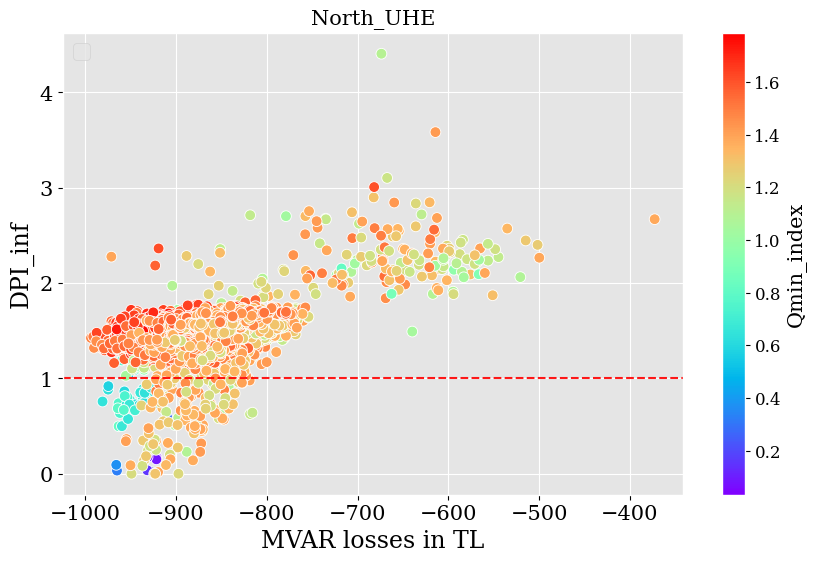

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.5465411042552496


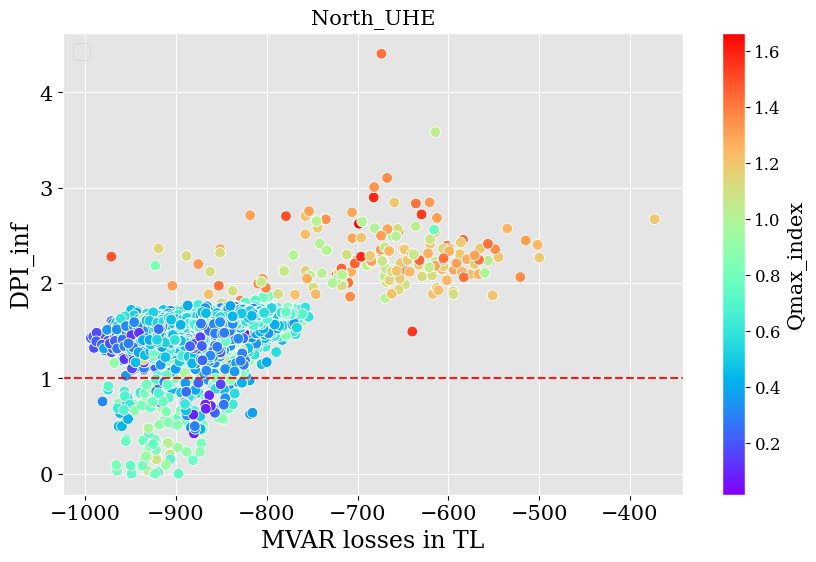

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.5465411042552496


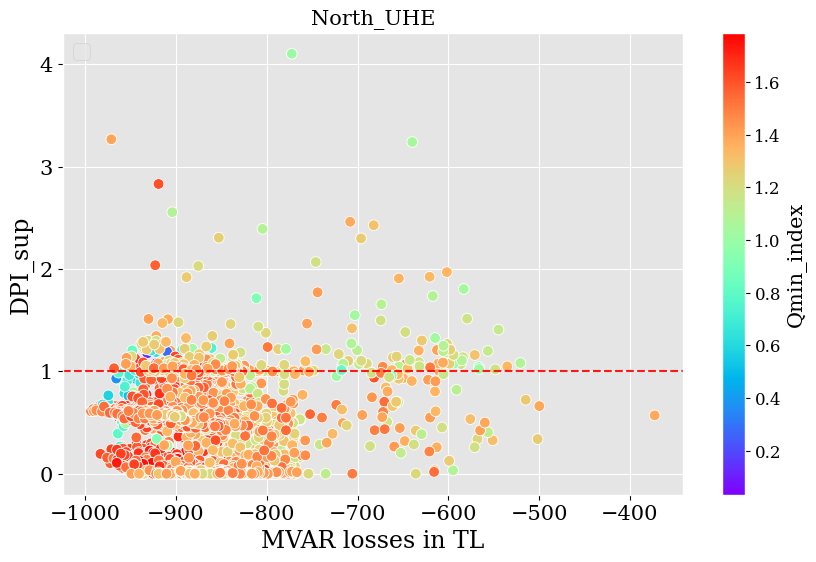

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.040717293094859074


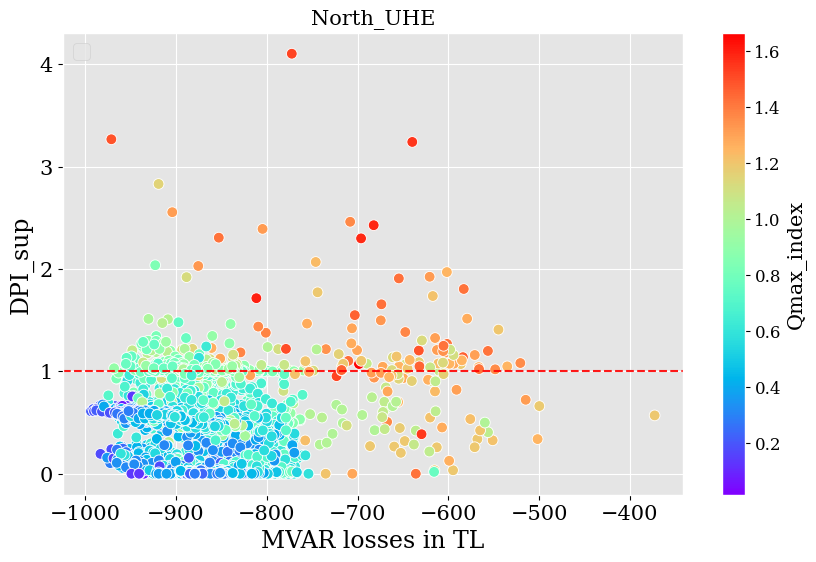

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.040717293094859074


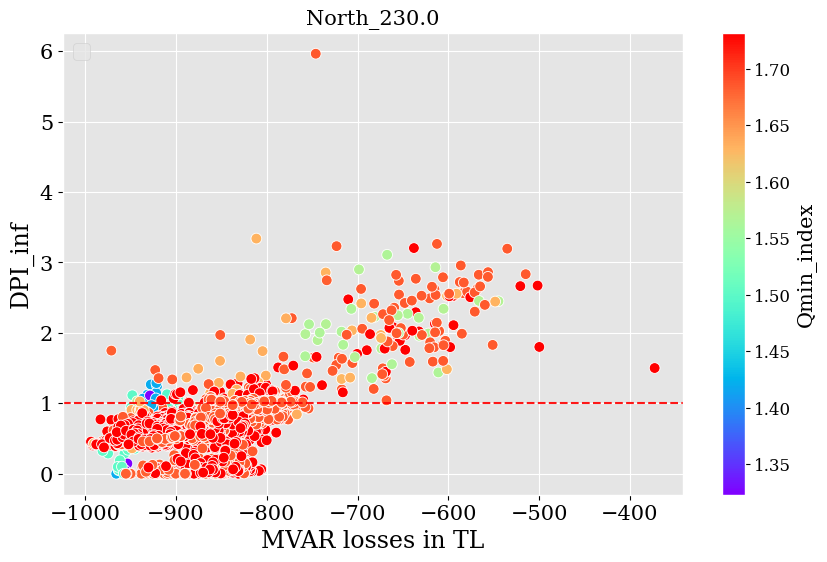

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.7002936698035253


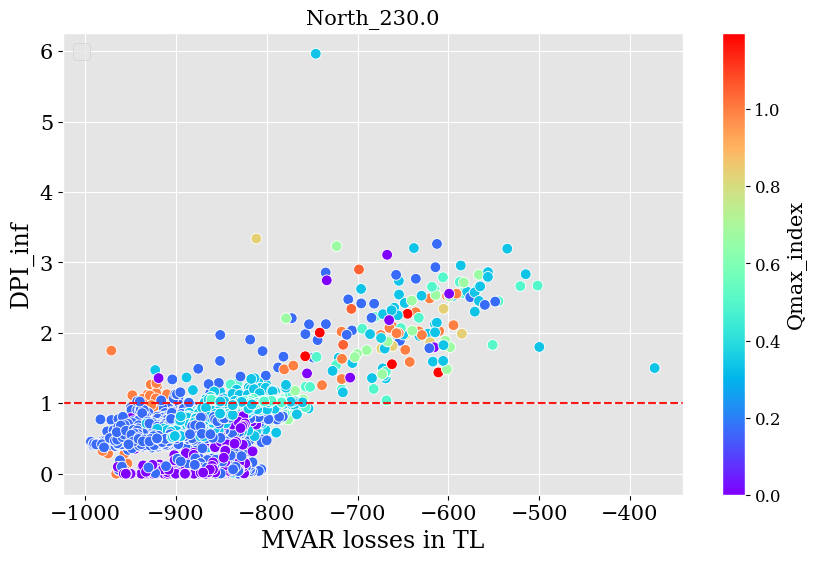

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.7002936698035253


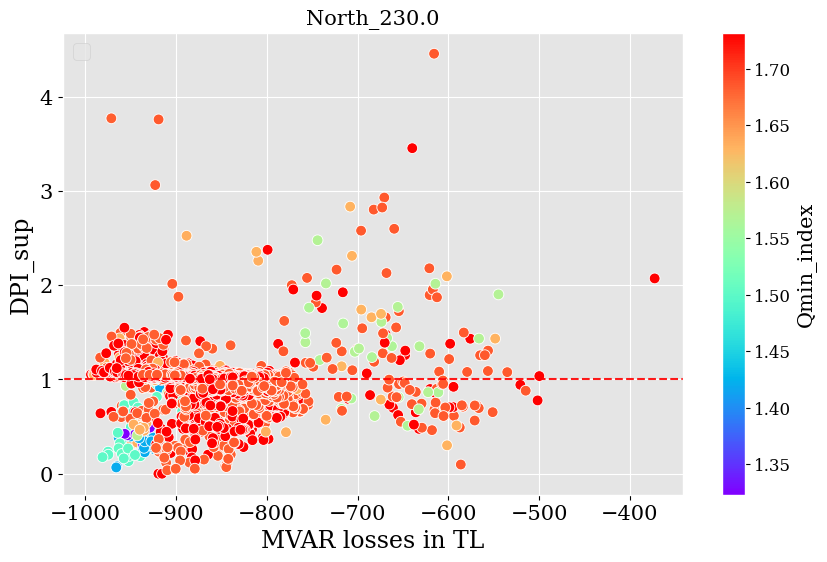

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.067552408957498


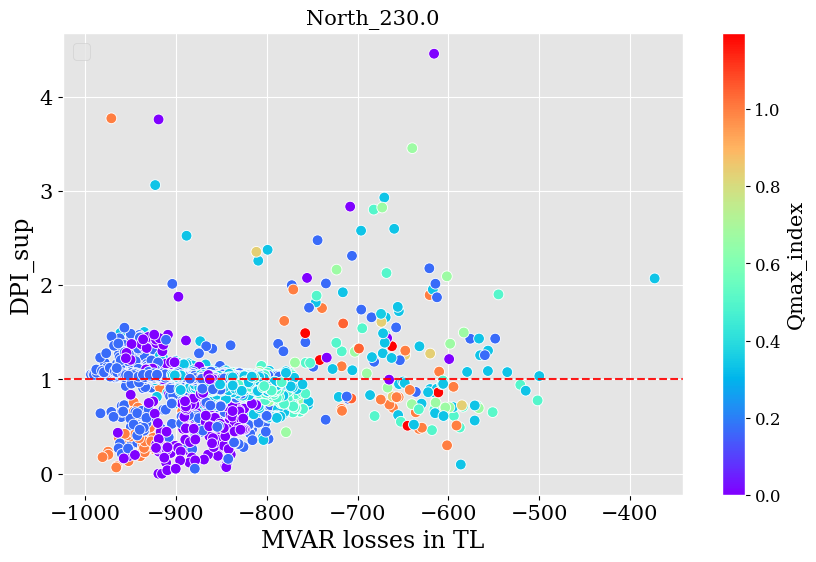

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.067552408957498


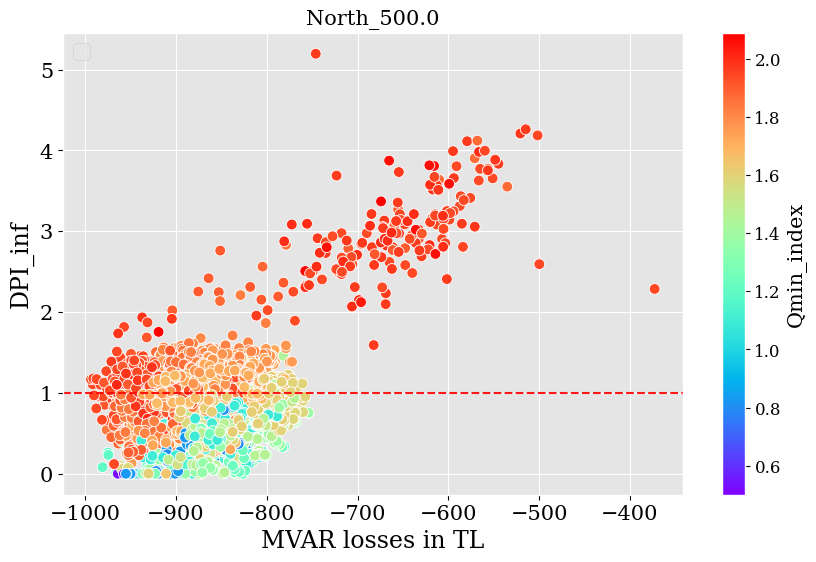

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.48790186008282266


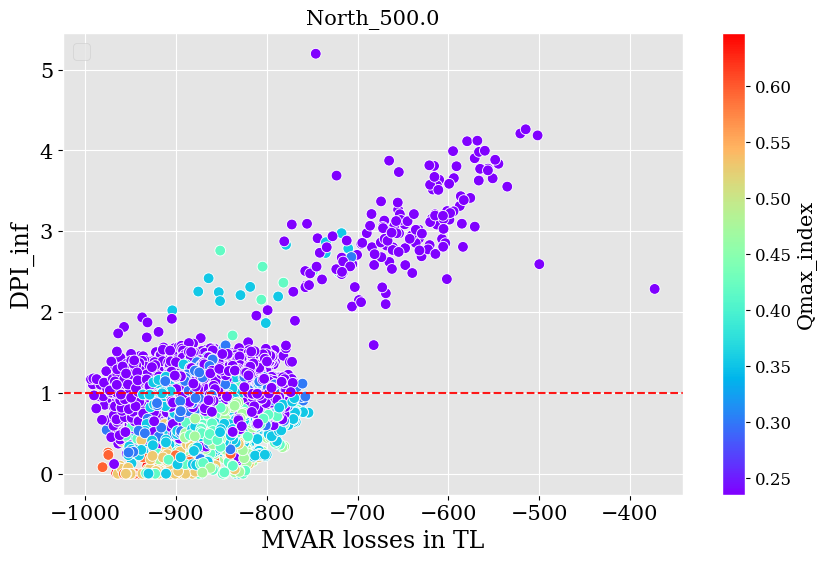

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.48790186008282266


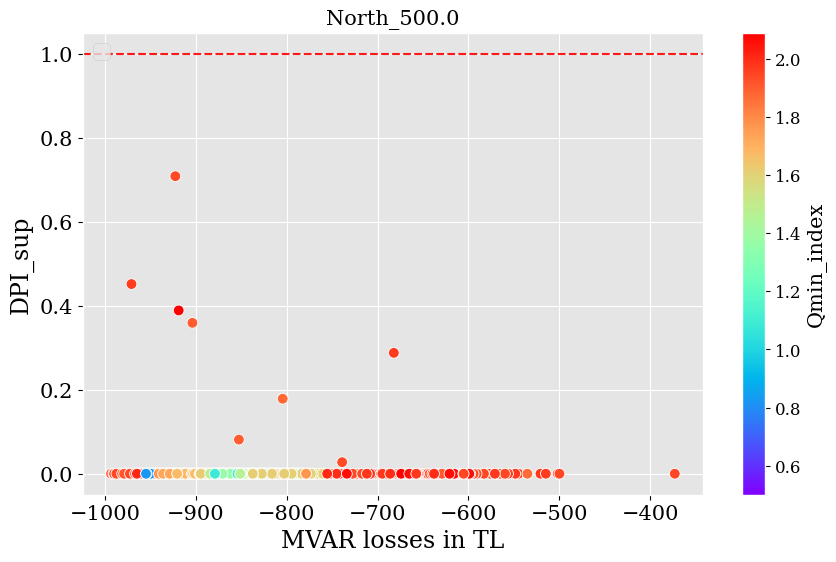

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.010306179479480463


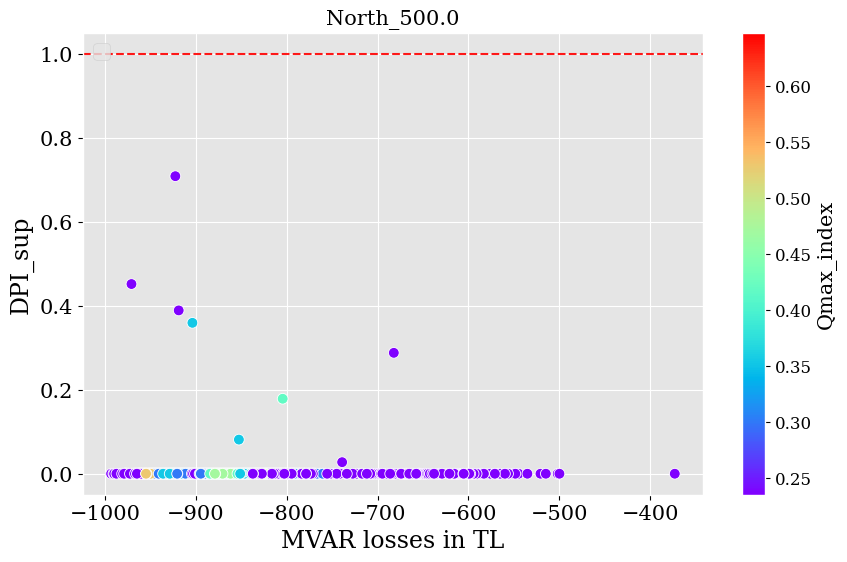

Indice de Correlación: -0.010306179479480463


In [43]:
Region = 'North'
gengroups = ['UHE','230.0','500.0']
grupos = set([word.replace('Qmin_norm_', '').replace('Qmax_norm_', '') for word in DATA['df_Qind'].columns])
for j in gengroups:
    for i in grupos:
        textaux = Region + '_' + j
        if textaux in i:
            scatterplot_1(dfanalise, f'Mvar:Losses_500down_{Region}',f'DPI_inf_{textaux}',xlbl='MVAR losses in TL', ylbl = 'DPI_inf',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', hline=True , title=textaux)
            scatterplot_1(dfanalise, f'Mvar:Losses_500down_{Region}',f'DPI_inf_{textaux}',xlbl='MVAR losses in TL', ylbl = 'DPI_inf',lbl_bar= 'Qmax_index', v3=f'Qmax_norm_{textaux}', hline=True , title=textaux)

            scatterplot_1(dfanalise, f'Mvar:Losses_500down_{Region}',f'DPI_sup_{textaux}',xlbl='MVAR losses in TL', ylbl = 'DPI_sup',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', hline=True , title=textaux)
            scatterplot_1(dfanalise, f'Mvar:Losses_500down_{Region}',f'DPI_sup_{textaux}',xlbl='MVAR losses in TL', ylbl = 'DPI_sup',lbl_bar= 'Qmax_index', v3=f'Qmax_norm_{textaux}', hline=True , title=textaux)

In [44]:
def scatterplot_2(df, v1, v2,v3 = None, xlimites = None, ylimites = None, namedir = None):

    cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
    plt.figure(figsize=(10, 6))
    if v3 == None:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, s=60, legend=None)
    else:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, palette=cmap, hue=v3, s=60, legend=None)
        norm = mcolors.Normalize(vmin=df[v3].min(), vmax=df[v3].max())
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=scatter, orientation='vertical', label='(MW)',)
        # Set color bar tick labels to black
        cbar.ax.yaxis.set_tick_params(color='black',labelsize=12)
        plt.setp(cbar.ax.get_yticklabels(), color='black')
        # Set the color and size of the color bar legend label
        cbar.set_label('(MVAR)', fontsize=15, color='black')

    nometitulo = ''
    plt.title(nometitulo, fontsize = 15)
    plt.xlabel('(MW)', fontsize = 17, color ='black')
    plt.legend(fontsize = 15, loc='upper left')
    plt.ylabel('DPI (pu)', fontsize = 17, color ='black')
    # plt.axhline(1, color='red', linestyle='--', alpha=0.9)
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')
    plt.tick_params(axis='x', colors='black',labelsize=15, rotation = 0)  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    if xlimites != None:
        plt.xlim(xlimites)
    if ylimites != None:
        plt.ylim(ylimites)
        
    plt.show()

### Avaliacion mas especifica por barra

In [45]:
col1 = ['Dia','Hora','REG', 'Cenario','MODV_PU','IndiceInf', 'IndiceSup','Gen_Type','VBASEKV','PL_MW', 'QL_MVAR', 'BUS_ID']
col2 = ['PL_MW', 'QL_MVAR','ReservaIND','ReservaCAP']
df1 = df_complete[col1].merge(Df_data_completo_reg[col2], on=['Dia','Hora','REG', 'Cenario'], how='left')
df11 = df1[(df1['REG']=='SE-CW') & (df1['VBASEKV']==230)]

C:\Users\David\AppData\Local\Temp\ipykernel_41356\417925670.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


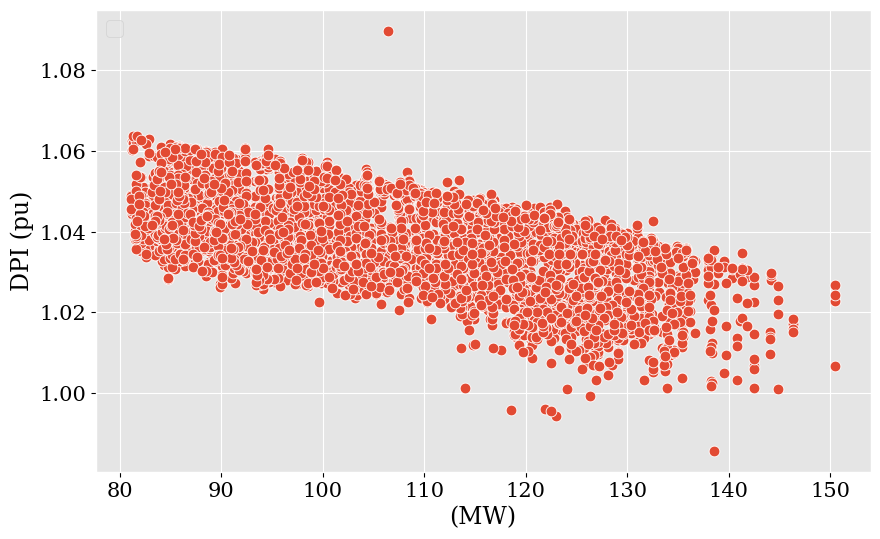

C:\Users\David\AppData\Local\Temp\ipykernel_41356\417925670.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


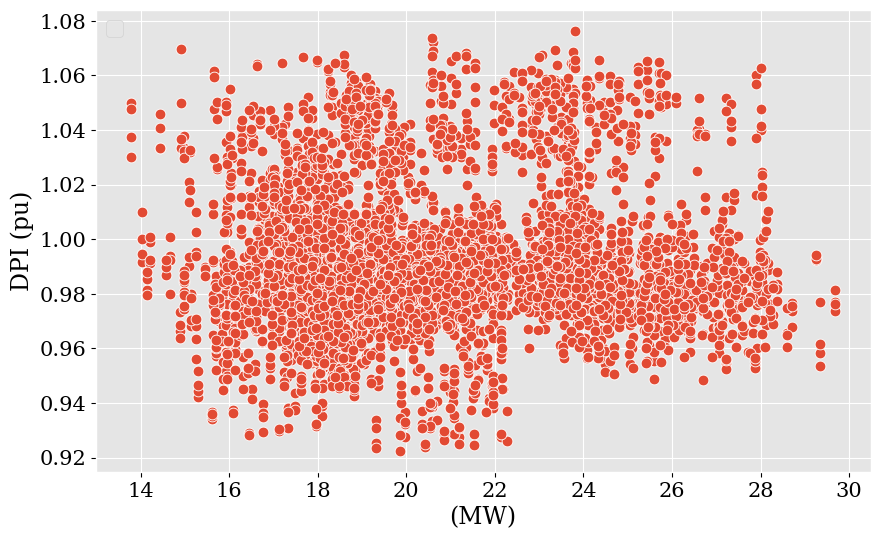

In [46]:
scatterplot_2(df11[~(df11['PL_MW_x'].isna()) & (df11['BUS_ID']== 1494.0)], 'PL_MW_x', 'MODV_PU')
scatterplot_2(df11[~(df11['PL_MW_x'].isna()) & (df11['BUS_ID']== 41876.0)], 'PL_MW_x', 'MODV_PU')

In [47]:
col1 = ['Dia','Hora','REG', 'Cenario','MODV_PU','IndiceInf', 'IndiceSup','Gen_Type','ReservaIND','ReservaCAP', 'PG_MW', 'QG_MVAR']
col2 = ['PL_MW', 'QL_MVAR']
df2 = df_filt_ger[col1].merge(Df_data_completo_reg[col2], on=['Dia','Hora','REG', 'Cenario'], how='left')
df22= df2[(df2['REG']=='SE-CW') & (df2['Gen_Type']=='UHE')]

In [48]:
col1 = ['Dia','Hora','REG', 'Cenario','MODV_PU','IndiceInf', 'IndiceSup','VBASEKV', 'ReservaINDshunt', 'ReservaCAPshunt']
df3 = df_filt_nt[col1].merge(dfqind2, on=['Dia','Hora','REG', 'Cenario', 'VBASEKV'], how='left')
df33 = df3[(df3['REG']=='SE-CW') & (df3['VBASEKV']==500)]

### Avaliação INDICE e Inestaveis por Tensão

In [49]:
# Vinst = pd.read_csv('C:/Users/david/OneDrive/Documents/FERV_documentos/critical_code4_10.csv').rename(columns={'OP':'key_AC-RO'})
# dpidecompints = dfanalise.loc[:,:,'V2A2F2 2026'].merge(Vinst, on='key_AC-RO', how='inner').sort_values('count', ascending = False).iloc[:,5:-2]
# max_columns = dpidecompints.iloc[:, :].idxmax(axis=1)
# # Getting the maximum values themselves
# max_values = dpidecompints.iloc[:, :].max(axis=1)
# print("Columns with maximum values:")
# print(max_columns)
# print("Maximum values:")
# print(max_values)

# # Getting the column names with the maximum values
# max_columns = dfinstensao.iloc[:, 1:-1].idxmax(axis=1)
# # Getting the maximum values themselves
# max_values = dfinstensao.iloc[:, 1:-1].max(axis=1)
# print("Columns with maximum values:")
# print(max_columns)
# print("Maximum values:")
# print(max_values)

### Otros PLOTS

In [50]:
# plot_potencia_perfil_2(df_mask, dfanalise.reset_index()[dfanalise.reset_index()['Cenario']=='V2A2F2 2026'], ['Fluxo_N-S'], ['PG_MW_North'],'(MW)', ylabelrigth='(MW)', markers=False)
# # plot_potencia_perfil_2(df_mask, dfanalise.reset_index()[dfanalise.reset_index()['Cenario']=='V2A2F2 2026'], ['Fluxo_N-S'], ['Fluxo_NE-SE'],'(MW)', ylabelrigth='(MW)', markers=False)
# plot_potencia_perfil_2(df_mask, dfanalise.reset_index()[dfanalise.reset_index()['Cenario']=='V2A2F2 2026'], ['Fluxo_N-S'], ['% L1_500down_SE-CW'],'(MW)', ylabelrigth='(MW)', markers=False)

In [51]:
# plot_potencia_perfil_2(df_mask, dfanalise, ['OV DPI_PV_AC-RO'], ['QG_MVAR_AC-RO'], markers=False, ylim=[0,2])
# plot_potencia_perfil_2(df_mask, dfanalise, ['OV DPI_PV_AC-RO'], ['JARAR-PCH138'], markers=False, ylim=[0,2])
# plot_potencia_perfil_2(df_mask, dfanalise, ['OV DPI_PV_North'], ['% L1 | SLUIS2-MA230 | SLUIS4-MA230'], markers=False, ylim=[0,2])

In [52]:
# DFF6 = DF_complete_PO.merge(DATA['df_indice_grop'], on=['Dia', 'Hora', 'Cenario'], how='left').reset_index()
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['S_Antonio_MW'],'DPI_PO_final', markers=False)
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['Tucurui_MW'],'DPI_PO_final', markers=False)
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['B_Monte_MW'],'DPI_PO_final', markers=False)
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['I_Solt_MW'],'DPI_PO_final', markers=False)
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['Jirau_MW'],'DPI_PO_final', markers=False)

# plot_potencia_perfil(df_mask, DFF6, 'Jirau_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'S_Antonio_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'B_Monte_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'Tucurui_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'I_Solt_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'Itaipu_50_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'Itaipu_60_MW', markers=False)

In [53]:
# df_aux_sup = DATA['features_sup_pv_df'].merge(DATA['features_sup_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
# datapd_ov = DFF6.merge(df_aux_sup, on=['Dia','Hora','Cenario'], how='left').reset_index()
# df_aux_inf = DATA['features_inf_pv_df'].merge(DATA['features_inf_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
# datapd_uv = DFF6.merge(df_aux_inf, on=['Dia','Hora','Cenario'], how='left').reset_index()

# plot_potencia_perfil_2(df_mask, datapd_uv[datapd_uv['Cenario']==target_scenario], ['DPI_PO_final'], ['BUGRESPCH006'], markers=False)
# plot_potencia_perfil_2(df_mask, datapd_uv[datapd_uv['Cenario']==target_scenario], ['DPI_PO_final'], ['LECHUG-AM500'], markers=False)

## Analise Correlação e Distribução Intercambios e Linhas

In [54]:
# def scatterplot(df, v1, v2,v3 = None, xlimites = None, ylimites = None, namedir = None):

#     cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
#     plt.figure(figsize=(10, 6))
#     if v3 == None:
#         scatter = sns.scatterplot(data=df, x=v1, y=v2, s=60, legend=None)
#     else:
#         scatter = sns.scatterplot(data=df, x=v1, y=v2, palette=cmap, hue=v3, s=60, legend=None)
#         norm = mcolors.Normalize(vmin=df[v3].min(), vmax=df[v3].max())
#         sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#         sm.set_array([])
#         cbar = plt.colorbar(sm, ax=scatter, orientation='vertical', label=v3)

#     # plt.grid(True, which="both", linestyle='--', linewidth=0.5)
#     # nometitulo = f'{namedir} Scatter plot of {v2} vs {v1}'.replace(':',' ')
#     # nometitulo = f'Scatter plot of {v2} vs {v1}'.replace(':',' ')
#     nometitulo = ''
#     plt.title(nometitulo, fontsize = 15)
#     plt.xlabel(v1, fontsize = 17)
#     plt.ylabel(v2, fontsize = 17)
#     plt.tick_params(axis='both', labelsize=15)
#     # plt.axhline(0, color='red', linestyle='--', alpha=0.9)
#     if xlimites != None:
#         plt.xlim(xlimites)
#     if ylimites != None:
#         plt.ylim(ylimites)
        
#     # if namedir != None:
#         # nome = folderimg+'Correlações/' + namedir + nometitulo + '.svg'
#         # # plt.savefig(nome)
#         # nome = folderimg+'Correlações/' + namedir + nometitulo + '.png'
#         # # plt.savefig(nome)
#     plt.show()

#     correlation = df[v1].corr(df[v2])
#     print(f"Indice de Correlación: {correlation}")


In [55]:
# scatterplot(Df_data_completo_reg.loc[:,:,'South',:], 'PL_MW', '% L1_500down', 'PG_MW')
# scatterplot(Df_data_completo_reg.loc[:,:,'South',:], 'PL_MW', '% L1_500down', 'Mvar:Losses_500down')

# scatterplot(Df_data_completo_reg.loc[:,:,'AC-RO',:], 'PL_MW', '% L1_500down', 'PG_MW', ylimites=[-10,200])
# scatterplot(Df_data_completo_reg.loc[:,:,'AC-RO',:], 'PL_MW', '% L1_500down', 'Mvar:Losses_500down', ylimites=[-10,200])

In [56]:
# scatterplot(dfanalise, 'B_Monte_MW' , 'Fluxo_N-S', 'Mvar:Losses_500up_SE-CW')
# scatterplot(Df_data_completo_reg.loc[:,:,'AC-RO',:], 'PL_MW', 'Mvar:Losses_500down', 'PG_MW')
# scatterplot(Df_data_completo_reg.loc[:,:,'South',:], 'PL_MW', '% L1_500down', 'Mvar:Losses_500down')

In [57]:
# df_linhas_500up = DATA['df_linhas'][DATA['df_linhas']['VBASEKV'].isin([500, 525, 765])]
# df_linhas_500down = DATA['df_linhas'][DATA['df_linhas']['VBASEKV'].isin([230, 345, 440])]
# df_linhas_500up_grouped = df_linhas_500up.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500up', 'Mvar:Losses': 'Mvar:Losses_500up'})
# df_linhas_500down_grouped = df_linhas_500down.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500down', 'Mvar:Losses': 'Mvar:Losses_500down'})
# df_linhas_grouped_REG = pd.concat([df_linhas_500up_grouped, df_linhas_500down_grouped], axis=1)
# dfff_lines = DATA['df_linhas'].drop_duplicates(subset=['From#', 'To#']).groupby(by=['Dia', 'Hora', 'Cenario','REG','VBASEKV']).count()
# dfff_lines.loc[1,'00-00','V2A2F2 2026',dfff_lines.index.get_level_values('VBASEKV').isin([230,345,440,500,525])]

# Analise Intercambios e Linhas

In [58]:
DATA['df_linhas'].columns

Index(['key', 'From#', 'To#', 'From Name', 'To Name', '% L1', 'L1(MVA)',
       'Mvar:Losses', 'Dia', 'Hora', 'REG', 'VBASEKV', 'MVA', 'MW:From-To',
       'MW:To-From', 'Power Factor:From-To', 'Power Factor:To-From', 'Cenario',
       'MW:Losses', 'MW_Flow', 'PI_mva'],
      dtype='object')

In [59]:
df_linhas_500up = DATA['df_linhas'][DATA['df_linhas']['VBASEKV'].isin([500, 525, 765])]
df_linhas_500down = DATA['df_linhas'][DATA['df_linhas']['VBASEKV'].isin([230, 345, 440])]
df_linhas_500up_grouped = df_linhas_500up.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'MW_Flow': 'sum','% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'MW_Flow': 'MW_Flow_over500','% L1': '% L1_over500', 'Mvar:Losses': 'Mvar:Losses_over500'})
df_linhas_500down_grouped = df_linhas_500down.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'MW_Flow': 'sum','% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'MW_Flow': 'MW_Flow_under500','% L1': '% L1_under500', 'Mvar:Losses': 'Mvar:Losses_under500'})
df_linhas_grouped_REG = pd.concat([df_linhas_500up_grouped, df_linhas_500down_grouped], axis=1)
df_linhas_grouped_REG = df_linhas_grouped_REG.rename(index=regionmap, level='REG')

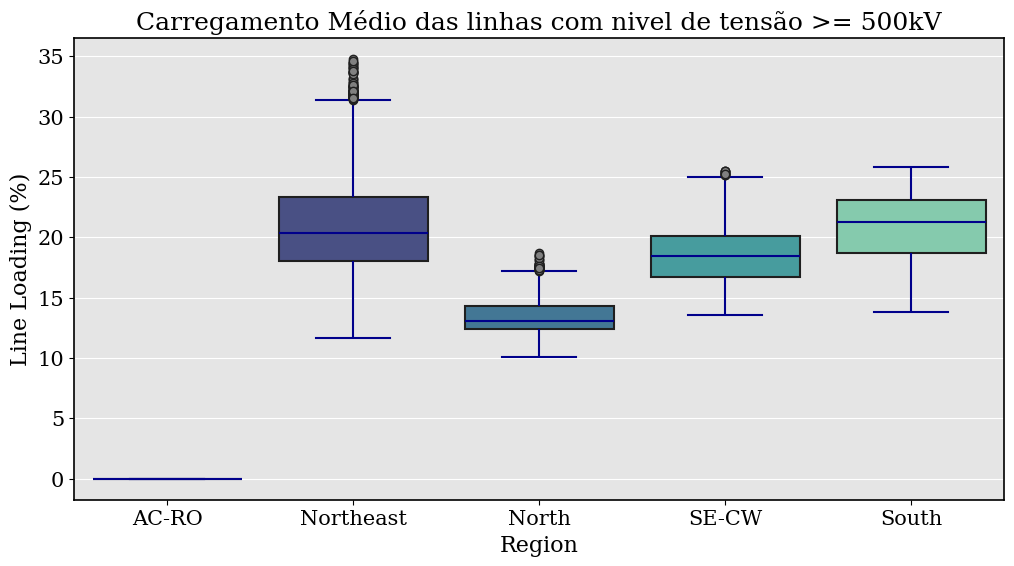

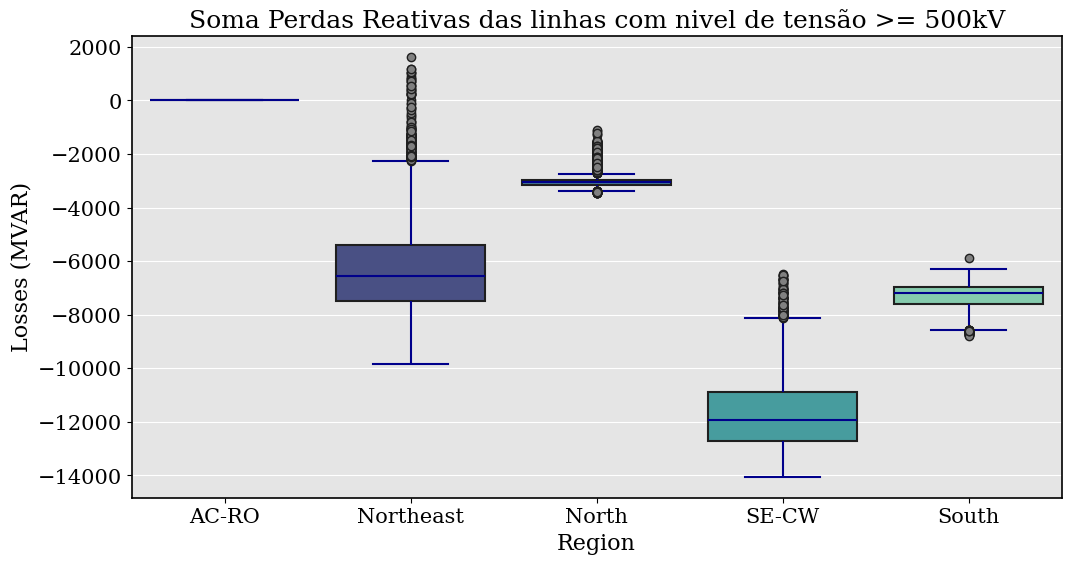

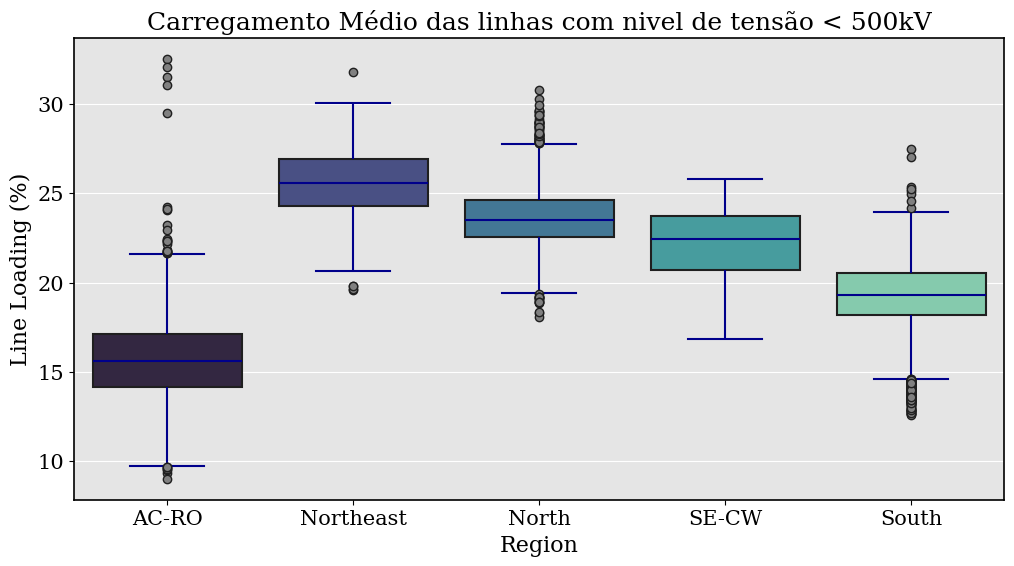

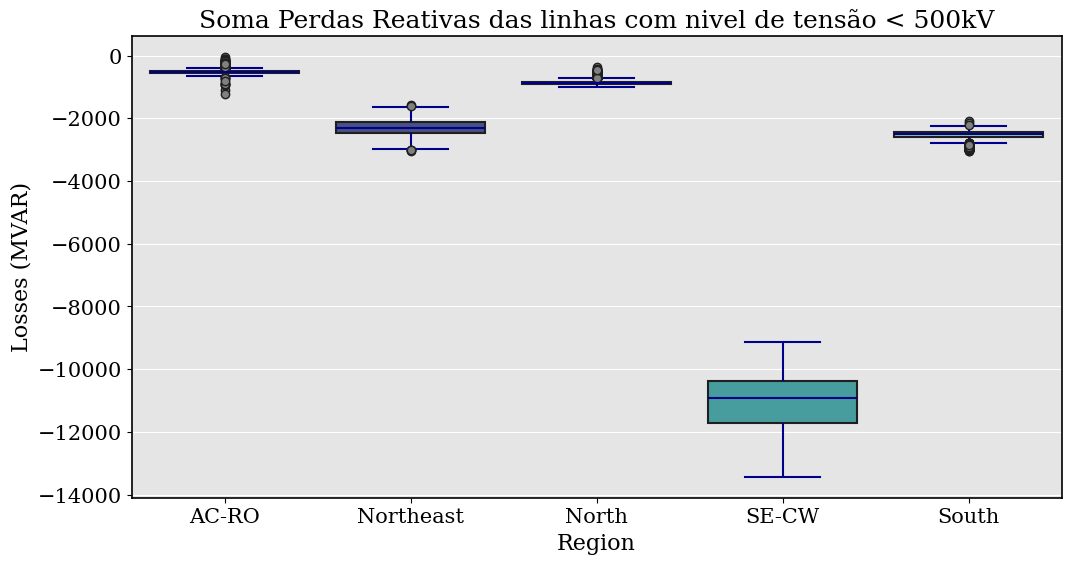

In [60]:
def boxplot_linhas(df, clase, yvalue, titulo, xlbl, ylbl, ylim = None):
    df = df.reset_index()
    plt.figure(figsize=(12, 6))

    # ax = sns.boxplot(data=df, x=clase, y=yvalue, hue="Cenario", width=0.8, linewidth=1.5, palette="mako",flierprops={'markerfacecolor': 'gray', 'marker': 'o'})
    ax = sns.boxplot(data=df, x=clase, y=yvalue, hue=clase, width=0.8, linewidth=1.5, palette="mako",flierprops={'markerfacecolor': 'gray', 'marker': 'o'})
    # Customize axes spines
    border_color = 'black'
    linewidth = 1.2
    ax.spines['top'].set_color(border_color)
    ax.spines['bottom'].set_color(border_color)
    ax.spines['left'].set_color(border_color)
    ax.spines['right'].set_color(border_color)
    ax.spines['top'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['right'].set_linewidth(linewidth)

    # Customize the boxplot elements
    for cap in ax.artists:
        cap.set_edgecolor(border_color)
        cap.set_facecolor('white')

    for median in ax.lines:
        median.set_color('darkblue')
        median.set_linewidth(1.5)

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=16, color='black')
    plt.ylabel(ylbl, fontsize=16, color='black')
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')
    # plt.legend(title='Scenarios', loc='best', fontsize=13)
    #labels
    plt.tick_params(axis='x', colors='black')  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    if ylim !=  None:
        plt.ylim(ylim)
    plt.show()
    
if Analise_Linhas:
    filtrolinh = set(df_linhas_500down[(df_linhas_500down['REG']=='AC-RO') & (df_linhas_500down['% L1']>50)][['Dia','Hora']].apply(tuple, axis=1).values)
    filter_outliers = Df_data_completo_reg.index.to_frame()[['Dia', 'Hora']].apply(tuple, axis=1).isin(filtrolinh)
    # Df_data_completo_reg_ = Df_data_completo_reg[~filter_outliers].loc[:,:,:,['V1A1F2 2026','V1A1F2 2026']]
    Df_data_completo_reg_ = Df_data_completo_reg[~filter_outliers]

    boxplot_linhas(Df_data_completo_reg_, 'REG', '% L1_500up' , 'Carregamento Médio das linhas com nivel de tensão >= 500kV', 'Region', 'Line Loading (%)', ylim = None)
    boxplot_linhas(Df_data_completo_reg_, 'REG', 'Mvar:Losses_500up' , 'Soma Perdas Reativas das linhas com nivel de tensão >= 500kV', 'Region', 'Losses (MVAR)', ylim = None)
    boxplot_linhas(Df_data_completo_reg_, 'REG', '% L1_500down' , 'Carregamento Médio das linhas com nivel de tensão < 500kV', 'Region', 'Line Loading (%)', ylim = None)
    boxplot_linhas(Df_data_completo_reg_, 'REG', 'Mvar:Losses_500down' , 'Soma Perdas Reativas das linhas com nivel de tensão < 500kV', 'Region', 'Losses (MVAR)', ylim = None)

In [61]:
def scatterplot(df, v1, v2, v3=None, xlimites=None, ylimites=None, namedir=None):
    cmap = plt.cm.get_cmap("rainbow_r")  # '_r' suffix to reverse the colormap
    plt.figure(figsize=(10, 6))
    
    if v3 is None:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, s=60, legend=None)
    else:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, palette=cmap, hue=v3, s=60, legend=None)
        norm = mcolors.Normalize(vmin=df[v3].min(), vmax=df[v3].max())
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=scatter, orientation='vertical', label='% FERV',)
        # Set color bar tick labels to black
        cbar.ax.yaxis.set_tick_params(color='black',labelsize=12)
        plt.setp(cbar.ax.get_yticklabels(), color='black')
        # Set the color and size of the color bar legend label
        cbar.set_label('% FERV', fontsize=15, color='black')

    nometitulo = ''
    plt.title(nometitulo, fontsize=15)
    plt.xlabel('Loading %', fontsize=16, color='black')
    plt.ylabel('(MVAR)', fontsize=16, color='black')
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')  # Set the color for the tick labels
    plt.tick_params(axis='x', colors='black')  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks

    if xlimites is not None:
        plt.xlim(xlimites)
    if ylimites is not None:
        plt.ylim(ylimites)

    plt.show()

    correlation = df[v1].corr(df[v2])
    print(f"Indice de Correlación: {correlation}")

In [62]:
df_linhas_grouped_REG_ = df_linhas_grouped_REG.reset_index().merge(DF_complete_PO, on=['Dia','Hora', 'Cenario']).reset_index().set_index(['Dia', 'Hora', 'REG', 'Cenario'])

C:\Users\David\AppData\Local\Temp\ipykernel_41356\3290495462.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow_r")  # '_r' suffix to reverse the colormap


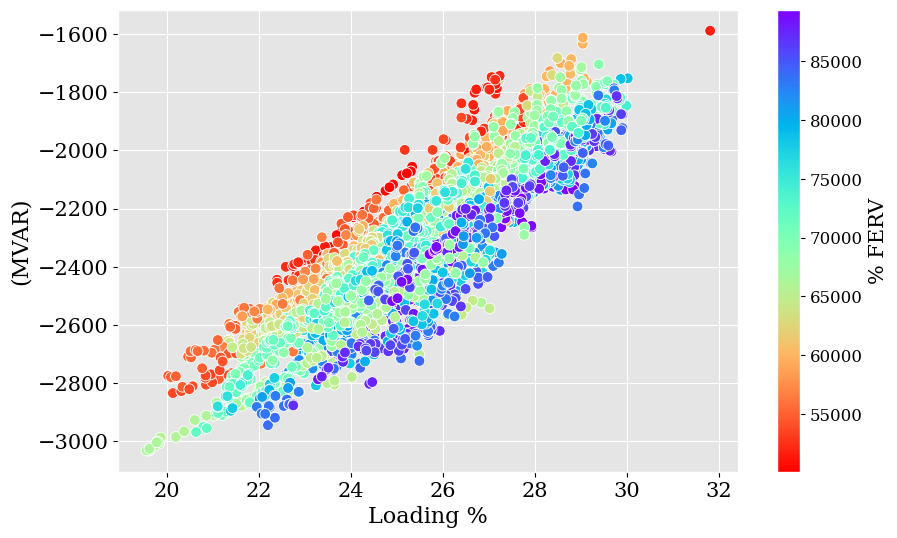

Indice de Correlación: 0.8874979227121547


C:\Users\David\AppData\Local\Temp\ipykernel_41356\3290495462.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow_r")  # '_r' suffix to reverse the colormap


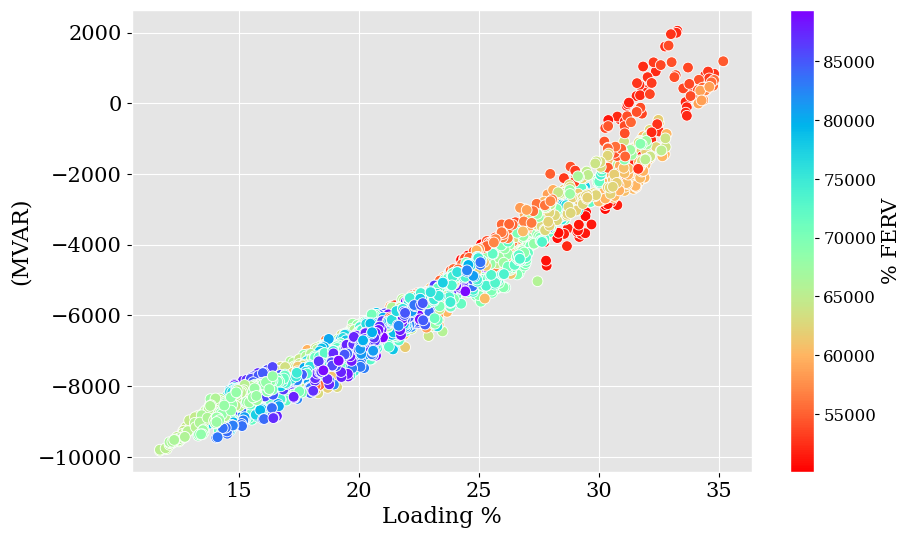

Indice de Correlación: 0.9789768286739166


In [63]:
reg = 'Northeast'
# scatterplot(Df_data_completo_reg.loc[:,:,'SE-CW',:], 'PL_MW', '% L1_500down', 'PG_MW', ylimites=[-10,200])
# scatterplot(df_linhas_grouped_REG.loc[:,:,reg,:],'MW_Flow_under500', '% L1_under500', 'Mvar:Losses_under500')
# scatterplot(df_linhas_grouped_REG.loc[:,:,reg,:],'MW_Flow_over500', '% L1_over500', 'Mvar:Losses_over500')

# scatterplot(df_linhas_grouped_REG_.loc[:,:,reg,:],'% L1_over500', 'Mvar:Losses_over500', 'PG_FERV')
# scatterplot(df_linhas_grouped_REG_.loc[:,:,reg,:],'% L1_under500', 'Mvar:Losses_under500','PG_FERV')

scatterplot(df_linhas_grouped_REG_.loc[:,:,reg,:],'% L1_under500', 'Mvar:Losses_under500','PG_MW')
scatterplot(df_linhas_grouped_REG_.loc[:,:,reg,:],'% L1_over500', 'Mvar:Losses_over500', 'PG_MW')

In [64]:
# boxplot_linhas(df_linhas_grouped_REG.loc[:,:,:,['V2A2F2 2026','V2A2F5 2026']], 'REG', 'MW_Flow_under500' , 'Soma do Fluxo das linhas com nivel de tensão < 500kV', 'Region', '(MW)', ylim = None)

In [65]:
df_1 = DATA['df_Inter_AC_DC'].reset_index().melt(id_vars=['key','Dia', 'Hora', 'Cenario'], var_name='Intercambio', value_name='Value')
df_fluxos_AC = df_1[df_1['Intercambio'].isin(['Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO'])]
df_fluxos_DC = df_1[df_1['Intercambio'].isin(['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE'])]
# Paso 1: Filtrar los valores negativos
negativos = df_1[df_1['Value'] < 0]
# Paso 2: Contar cuántos valores negativos hay para cada 'Intercambio'
conteo_negativos = negativos.groupby('Intercambio').size()
# Paso 3: Contar el número total de entradas para cada 'Intercambio'
conteo_total = df_1.groupby('Intercambio').size()
# Paso 4: Calcular el porcentaje
porcentaje_negativos = (conteo_negativos / conteo_total) * 100
# Mostrar el resultado
print(porcentaje_negativos)

Intercambio
EXP_NE             0.613839
Elo_FOZ-IBIUNA          NaN
Elo_PVEL-ARARQ          NaN
Elo_XINGU-SE            NaN
Fluxo_N-S         11.179315
Fluxo_NE-N         1.897321
Fluxo_NE-SE        0.558036
Fluxo_SUL-SECO     1.581101
dtype: float64


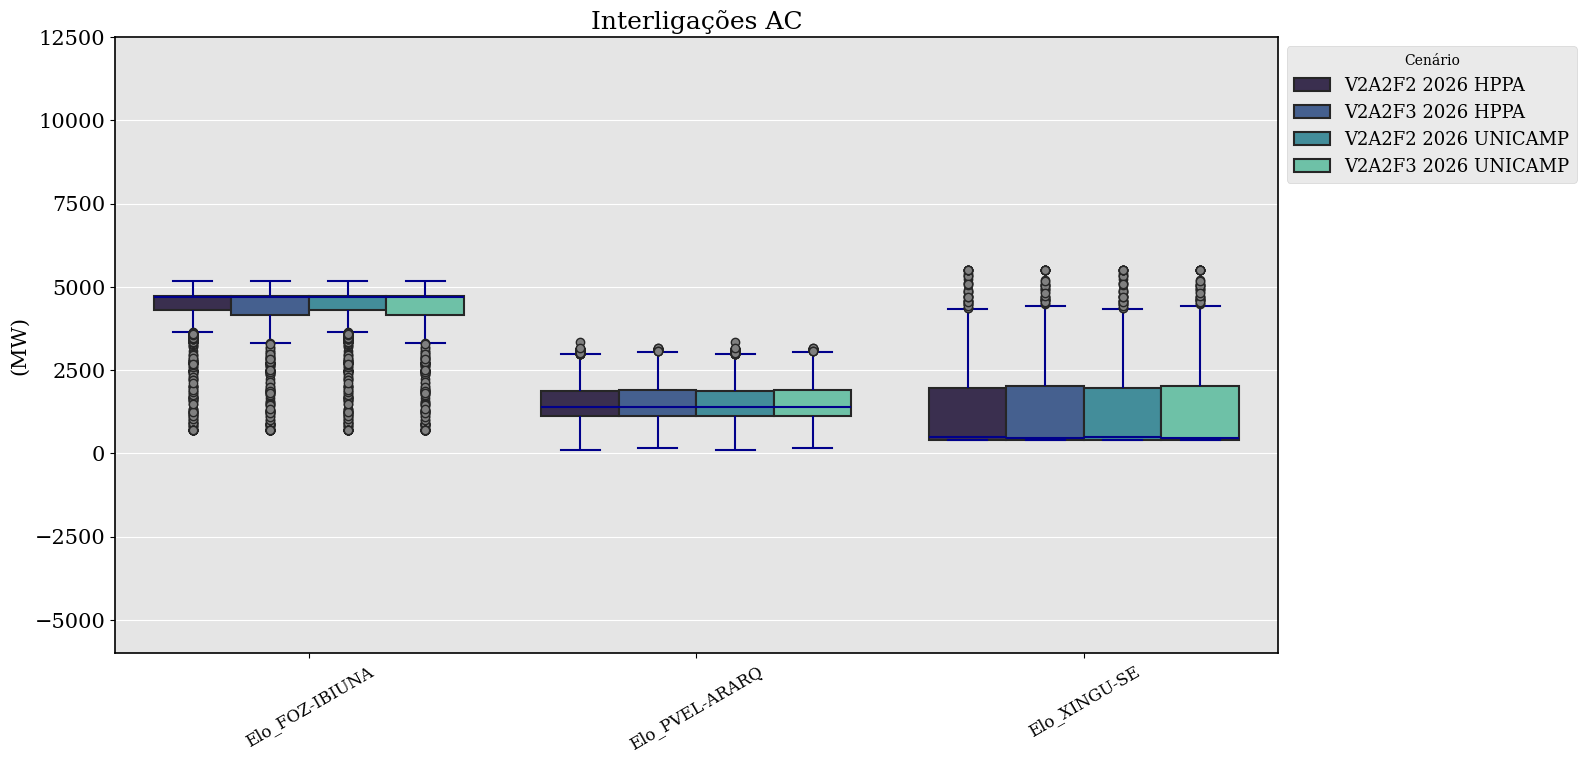

In [66]:
# boxplot_(df_1[df_1['Cenario'].isin(['V2A2F2 2026','V2A2F5 2026'])],'Value', clase = "Intercambio", hue='Cenario', titulo = 'Interligações AC/HVDC', xlbl = '',ylbl ='(MW)')
boxplot_(df_fluxos_DC,'Value', clase = "Intercambio", hue='Cenario', titulo = 'Interligações AC', xlbl = '',ylbl ='(MW)', ylim=[-6000,12500])

In [67]:
# def plot_potencia_perfil(df_resultado, df_data, column, ylim = None, markers=True,):

#     df = df_resultado.merge(df_data,on=['Dia','Hora', 'Cenario'], how='left')
#     plt.figure(figsize=(20, 7))
#     sns.lineplot(data=df, x='Dia_Hora', y=column, hue='Cenario', markers=markers, lw = 2)
#     plt.xlabel('(Dia, Hora)', fontsize = 15)
#     plt.ylabel('(MW)', fontsize = 15)
#     if column == 'DemandaLiquida':
#         plt.title(f'Demanda Liquida Total do Sistema', fontsize = 15)
#     else:
#         plt.title(f'Perfil de Potencia de {column}', fontsize = 15)

#     value = int(df['Dia_Hora'].unique().shape[0] / 28)
#     selected_ticks = df[df['Cenario'] == df['Cenario'].unique()[0]].iloc[::value]['Dia_Hora']
#     plt.xticks(selected_ticks, rotation=45, fontsize=12)
#     plt.tick_params(axis='y', labelsize=12)
#     plt.legend(title='Cenarios', fontsize = 12)
#     if ylim != None:
#         plt.ylim(ylim)
#     plt.tight_layout()
#     plt.grid()
#     plt.show()

# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Elo_FOZ-IBIUNA', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Elo_PVEL-ARARQ', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Elo_XINGU-SE', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Elo_CPVBTB-PVEL', markers=False)

In [68]:
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Fluxo_N-S', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Fluxo_NE-N', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Fluxo_NE-SE', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Fluxo_SUL-SECO', markers=False)

In [69]:
# # fluxoONS = pd.read_csv("C:/Users/David/OneDrive/Documents/FERV_documentos/DATA NORUS/fluxo_intercambio_NORUS_2022/fluxo_intercambio/fluxo_intercambio_FNS.csv", sep=';')
# fluxoONS = pd.read_csv("C:/Users/David/OneDrive/Documents/FERV_documentos/DATA NORUS/fluxo_intercambio_NORUS_2026_V1A1F2_FNS_lim/fluxo_intercambio_FNS.csv", sep=';')
# # fluxoONS = pd.read_csv('C:/Users/David/OneDrive/Documents/FERV_documentos/DATA NORUS/fluxo_intercambio_NORUS_2026_V1A1F2_FNS_lim_REV2/fluxo_intercambio_FNS.csv', sep=';')


# cenario = 'V2A2F2 Scenario 2026'

# fluxoONS = fluxoONS.drop(fluxoONS.columns[0], axis=1)
# fluxoONS = fluxoONS.drop(fluxoONS.columns[0], axis=1)
# fluxoONS = fluxoONS.rename(columns={'periodo': 'Dia', 'hora': 'Hora', 'MW':'Fluxo_N-S_DESSEM'})
# fluxoONS['Hora'] = fluxoONS['Hora'].str.replace(':','-')
# fluxoONS['Dia'] = fluxoONS['Dia'].str.slice(0, 2)
# fluxoONS = fluxoONS.melt(id_vars=['Dia','Hora'], value_vars='Fluxo_N-S_DESSEM', var_name='Intercambio', value_name='Value').set_index(['Dia','Hora','Intercambio'])

# df_2 = df_1[df_1['Cenario']==cenario].copy()
# df_2['Dia'] = df_2['Dia'].astype(str)
# df_2['Dia'] = df_2['Dia'].str.zfill(2)
# intercambio_previsto = df_2.set_index(['Dia', 'Hora','Intercambio']).drop(columns='Cenario')
# # intercambio_previsto = df_1.set_index(['Dia', 'Hora','Intercambio', 'Cenario'])
# # intercambio_previsto = intercambio_previsto.loc[:,:,:,'V1A1F2 Scenario 2022']

# df_compare_fluxs = pd.concat([fluxoONS,intercambio_previsto],axis = 0).reset_index()
# df_compare_fluxs['Dia'] = df_compare_fluxs['Dia'].astype(str)
# df_compare_fluxs['Dia_Hora'] = '(' + df_compare_fluxs['Dia'] + ', ' + df_compare_fluxs['Hora'] + ')'

In [70]:
# # Assuming df_compare_fluxs is already defined
# df = df_compare_fluxs
# condition = df['Intercambio'].isin(['Fluxo_N-S','Fluxo_N-S_DESSEM'])

# # Plotting
# plt.figure(figsize=(20, 7))
# plot = sns.lineplot(data=df[condition], x='Dia_Hora', y='Value', hue='Intercambio', style=None, markers=False)
# plt.xlabel('(Dia, Hora)', fontsize=15)
# plt.ylabel('(MW)', fontsize=15)
# plt.title(f'Power Flow Profile of {cenario}', fontsize=15)
# value = int(df['Dia_Hora'].unique().shape[0] / 28)
# selected_ticks = df[df['Intercambio'] == df['Intercambio'].unique()[0]].iloc[::value]['Dia_Hora']
# plt.xticks(selected_ticks, rotation=45, fontsize=12)
# plt.tick_params(axis='y', labelsize=12)

# # Get the current handles and labels
# handles, labels = plot.get_legend_handles_labels()
# new_labels = ['Fluxo_N-S_DESSEM', 'Fluxo_N-S_HPPA']  # Update these with your desired legend names

# # Set the legend with the new labels
# plt.legend(handles, new_labels, title='Fluxos', fontsize=12)
# # Add horizontal lines
# plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
# plt.axhline(-1000, color='red', linestyle='--', alpha=0.9)

# plt.tight_layout()
# plt.grid()
# plt.show()